# Import libraries and data

In [1]:
#import libraries
import pandas as pd
import pyarrow
import glob
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from math import pi
import random
import base64
from PIL import Image
from io import BytesIO
from IPython.display import HTML
from skimage.io import imread
from math import pi
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
#display only 2 decimal numbers for all float data for all notebook
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#display maximum 500 columns for all notebook
pd.set_option('display.max_columns', None)

In [3]:
#import data
pokemon_data = pd.read_csv("C:/Users/Anaïs WERNLE/Desktop/Pokemon_data.csv")

In [4]:
#display first 5 rows
pokemon_data.head(5)

pokedex_number           name  generation   classfication  \
0               1      Bulbasaur           1    Seed Pokemon   
1               2        Ivysaur           1    Seed Pokemon   
2               3       Venusaur           1    Seed Pokemon   
3               3  Mega Venusaur           1    Seed Pokemon   
4               4     Charmander           1  Lizard Pokemon   

                     abilities  height_m  weight_kg  type1   type2  \
0  ['Overgrow', 'Chlorophyll']      0.70       6.90  Grass  Poison   
1  ['Overgrow', 'Chlorophyll']      1.00      13.00  Grass  Poison   
2  ['Overgrow', 'Chlorophyll']      2.00     100.00  Grass  Poison   
3                ['Thick Fat']      2.40     155.50  Grass  Poison   
4     ['Blaze', 'Solar Power']      0.60       8.50   Fire    None   

   base_total  hp  attack  defense  sp_attack  sp_defense  speed  against_bug  \
0         318  45      49       49         65          65     45         1.00   
1         405  60      62       63         80          80     60         1.00   
2         525  80      82       83        100         100     80         1.00   
3         625  80     100      123        122         120     80         1.00   
4         309  39      52       43         60          50     65         0.50   

   against_dark  against_dragon  against_electric  against_fairy  \
0          1.00            1.00              0.50           0.50   
1          1.00            1.00              0.50           0.50   
2          1.00            1.00              0.50           0.50   
3          1.00            1.00              0.50           0.50   
4          1.00            1.00              1.00           0.50   

   against_fighting  against_fire  against_flying  against_ghost  \
0              0.50          2.00            2.00           1.00   
1              0.50          2.00            2.00           1.00   
2              0.50          2.00            2.00           1.00   
3              0.50          1.00            2.00           1.00   
4              1.00          0.50            1.00           1.00   

   against_grass  against_ground  against_ice  against_normal  against_poison  \
0           0.25            1.00         2.00            1.00            1.00   
1           0.25            1.00         2.00            1.00            1.00   
2           0.25            1.00         2.00            1.00            1.00   
3           0.25            1.00         1.00            1.00            1.00   
4           0.50            2.00         0.50            1.00            1.00   

   against_psychic  against_rock  against_steel  against_water capture_rate  \
0             2.00          1.00           1.00           0.50           45   
1             2.00          1.00           1.00           0.50           45   
2             2.00          1.00           1.00           0.50           45   
3             2.00          1.00           1.00           0.50           45   
4             1.00          2.00           0.50           2.00           45   

  base_egg_steps  base_happiness  is_legendary  is_mythical  is_mega  
0          5,140           70.00             0            0        0  
1          5,140           70.00             0            0        0  
2          5,140           70.00             0            0        0  
3          5,140           70.00             0            0        1  
4          5,140           70.00             0            0        0

## Data standardization and data cleaning

In [5]:
#display columns
pokemon_data.columns

Index(['pokedex_number', 'name', 'generation', 'classfication', 'abilities',
       'height_m', 'weight_kg', 'type1', 'type2', 'base_total', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'against_bug',
       'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
       'against_fighting', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water', 'capture_rate', 'base_egg_steps', 'base_happiness',
       'is_legendary', 'is_mythical', 'is_mega'],
      dtype='object')

In [6]:
#check data types. We can see that "capture_rate" and "base_egg_steps" are set as str columns instead of float or int.
pokemon_data.dtypes

pokedex_number        int64
name                 object
generation            int64
classfication        object
abilities            object
height_m            float64
weight_kg           float64
type1                object
type2                object
base_total            int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
against_bug         float64
against_dark        float64
against_dragon      float64
against_electric    float64
against_fairy       float64
against_fighting    float64
against_fire        float64
against_flying      float64
against_ghost       float64
against_grass       float64
against_ground      float64
against_ice         float64
against_normal      float64
against_poison      float64
against_psychic     float64
against_rock        float64
against_steel       float64
against_water       float64
capture_rate         object
base_egg_steps      

In [7]:
#check what kind of strings are stored in capture_rate. It seems that the wrong data type was cause by empty string
pokemon_data['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '5', '145', '130', '140', ' ',
       '15', '220', '160', '80', '55', '10', nan], dtype=object)

In [8]:
#replace np.nan by 0
pokemon_data.capture_rate.replace(np.nan, 0, regex=True, inplace = True)
#replace empty strings by 0
pokemon_data.capture_rate.replace(' ', 0, regex=True, inplace = True)
#now we can no longer see them
pokemon_data['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '5', '145', '130', '140', 0, '15',
       '220', '160', '80', '55', '10'], dtype=object)

In [9]:
#let's do the same for base_egg_steps
pokemon_data['base_egg_steps'].unique()

array(['5,140', '3,855', '2,570', '6,425', '10,280', '1,285', '8,995',
       '7,710', '20,560', '30,840', '5140', nan], dtype=object)

In [10]:
#Here they are cause by "," instead of "." as a decimal separator
pokemon_data.base_egg_steps = pokemon_data.base_egg_steps.str.replace(',','.')
pokemon_data.base_egg_steps.replace(np.nan, 0, regex=True, inplace = True)
pokemon_data.base_egg_steps.replace(' ', 0, regex=True, inplace = True)
pokemon_data['base_egg_steps'].unique()

array(['5.140', '3.855', '2.570', '6.425', '10.280', '1.285', '8.995',
       '7.710', '20.560', '30.840', '5140', 0], dtype=object)

In [11]:
#change data types 
pokemon_data["capture_rate"] = pokemon_data["capture_rate"].astype(int)
pokemon_data["base_egg_steps"] = pokemon_data["base_egg_steps"].astype(float)
pokemon_data["pokedex_number"] = pokemon_data["pokedex_number"].astype(str)

In [12]:
#the pokedex is always stored with 3 numbers min, which means the first pokemon stored in the pokedex is store this way : 001. Let's change our pokedex_number column
pokemon_data['pokedex_number']= pokemon_data['pokedex_number'].apply(lambda x: '{0:0>3}'.format(x))

In [13]:
#check for anomalies
pokemon_data.describe(include='all').T

count unique            top freq   mean    std    min  \
pokedex_number      1033    905            479    6    NaN    NaN    NaN   
name                1033   1033      Bulbasaur    1    NaN    NaN    NaN   
generation       1033.00    NaN            NaN  NaN   4.10   2.28   1.00   
classfication       1033    654  Mouse Pokemon   11    NaN    NaN    NaN   
abilities           1033    603   ['Levitate']   35    NaN    NaN    NaN   
height_m         1033.00    NaN            NaN  NaN   1.29   1.39   0.10   
weight_kg        1033.00    NaN            NaN  NaN  78.75 280.94   0.10   
type1               1033     18          Water  135    NaN    NaN    NaN   
type2               1033     19           None  487    NaN    NaN    NaN   
base_total       1033.00    NaN            NaN  NaN 439.35 120.39 175.00   
hp               1033.00    NaN            NaN  NaN  70.17  26.24   1.00   
attack           1033.00    NaN            NaN  NaN  80.72  32.67   5.00   
defense          1033.00    NaN            NaN  NaN  74.46  30.84   5.00   
sp_attack        1033.00    NaN            NaN  NaN  73.05  32.80  10.00   
sp_defense       1033.00    NaN            NaN  NaN  72.09  27.55  20.00   
speed            1033.00    NaN            NaN  NaN  68.84  30.12   5.00   
against_bug      1033.00    NaN            NaN  NaN   1.00   0.61   0.00   
against_dark     1033.00    NaN            NaN  NaN   1.07   0.46   0.25   
against_dragon   1033.00    NaN            NaN  NaN   0.97   0.38   0.00   
against_electric 1033.00    NaN            NaN  NaN   1.04   0.64   0.00   
against_fairy    1033.00    NaN            NaN  NaN   1.09   0.53   0.00   
against_fighting 1033.00    NaN            NaN  NaN   1.08   0.75   0.00   
against_fire     1033.00    NaN            NaN  NaN   1.12   0.70   0.00   
against_flying   1033.00    NaN            NaN  NaN   1.16   0.58   0.25   
against_ghost    1033.00    NaN            NaN  NaN   1.01   0.57   0.00   
against_grass    1033.00    NaN            NaN  NaN   1.01   0.75   0.00   
against_ground   1033.00    NaN            NaN  NaN   1.08   0.78   0.00   
against_ice      1033.00    NaN            NaN  NaN   1.19   0.76   0.00   
against_normal   1033.00    NaN            NaN  NaN   0.87   0.28   0.00   
against_poison   1033.00    NaN            NaN  NaN   0.96   0.55   0.00   
against_psychic  1033.00    NaN            NaN  NaN   0.98   0.51   0.00   
against_rock     1033.00    NaN            NaN  NaN   1.24   0.70   0.25   
against_steel    1033.00    NaN            NaN  NaN   0.99   0.52   0.00   
against_water    1033.00    NaN            NaN  NaN   1.05   0.61   0.00   
capture_rate     1033.00    NaN            NaN  NaN  92.24  76.29   0.00   
base_egg_steps   1033.00    NaN            NaN  NaN  12.95 159.86   0.00   
base_happiness   1024.00    NaN            NaN  NaN  62.63  21.90   0.00   
is_legendary     1033.00    NaN            NaN  NaN   0.08   0.27   0.00   
is_mythical      1033.00    NaN            NaN  NaN   0.03   0.17   0.00   
is_mega          1033.00    NaN            NaN  NaN   0.04   0.21   0.00   

                    25%    50%    75%     max  
pokedex_number      NaN    NaN    NaN     NaN  
name                NaN    NaN    NaN     NaN  
generation         2.00   4.00   6.00    8.00  
classfication       NaN    NaN    NaN     NaN  
abilities           NaN    NaN    NaN     NaN  
height_m           0.60   1.00   1.60   20.00  
weight_kg          9.00  29.90  75.00 8091.10  
type1               NaN    NaN    NaN     NaN  
type2               NaN    NaN    NaN     NaN  
base_total       330.00 460.00 517.00  780.00  
hp                50.00  68.00  82.00  255.00  
attack            55.00  78.00 100.00  190.00  
defense           50.00  70.00  90.00  230.00  
sp_attack         50.00  65.00  95.00  194.00  
sp_defense        50.00  70.00  90.00  230.00  
speed             45.00  65.00  90.00  200.00  
against_bug        0.50   1.00   1.00    4.00  
against_dark       1.00   1.00   1.00 

# Visualisation

## Pokemon type

In [14]:
#assign right color to -the right pokemon type (for ex : yellow for electric pokemons)
dict_colours = {"Normal" : '#A8A77A', "Fire": '#EE8130', "Water": '#6390F0', 
                "Electric": '#F7D02C', "Grass": '#7AC74C', "Ice" : '#96D9D6', 
                "Fighting": '#C22E28', "Poison": '#A33EA1', "Ground": '#E2BF65',
                "Flying": '#A98FF3', "Psychic": '#F95587', "Bug": '#A6B91A', 
                "Rock": '#B6A136', "Ghost": '#735797', "Dragon": '#6F35FC',
                "Dark": '#705746', "Steel": '#B7B7CE', "Fairy": '#D685AD'}

dict_grey = {"Normal" : '#545454', "Fire": '#545454', "Water": '#545454', 
                "Electric": '#545454', "Grass": '#545454', "Ice" : '#545454', 
                "Fighting": '#545454', "Poison": '#545454', "Ground": '#545454',
                "Flying": '#545454', "Psychic": '#545454', "Bug": '#545454', 
                "Rock": '#545454', "Ghost": '#545454', "Dragon": '#545454',
                "Dark": '#545454', "Steel": '#545454', "Fairy": '#545454'}



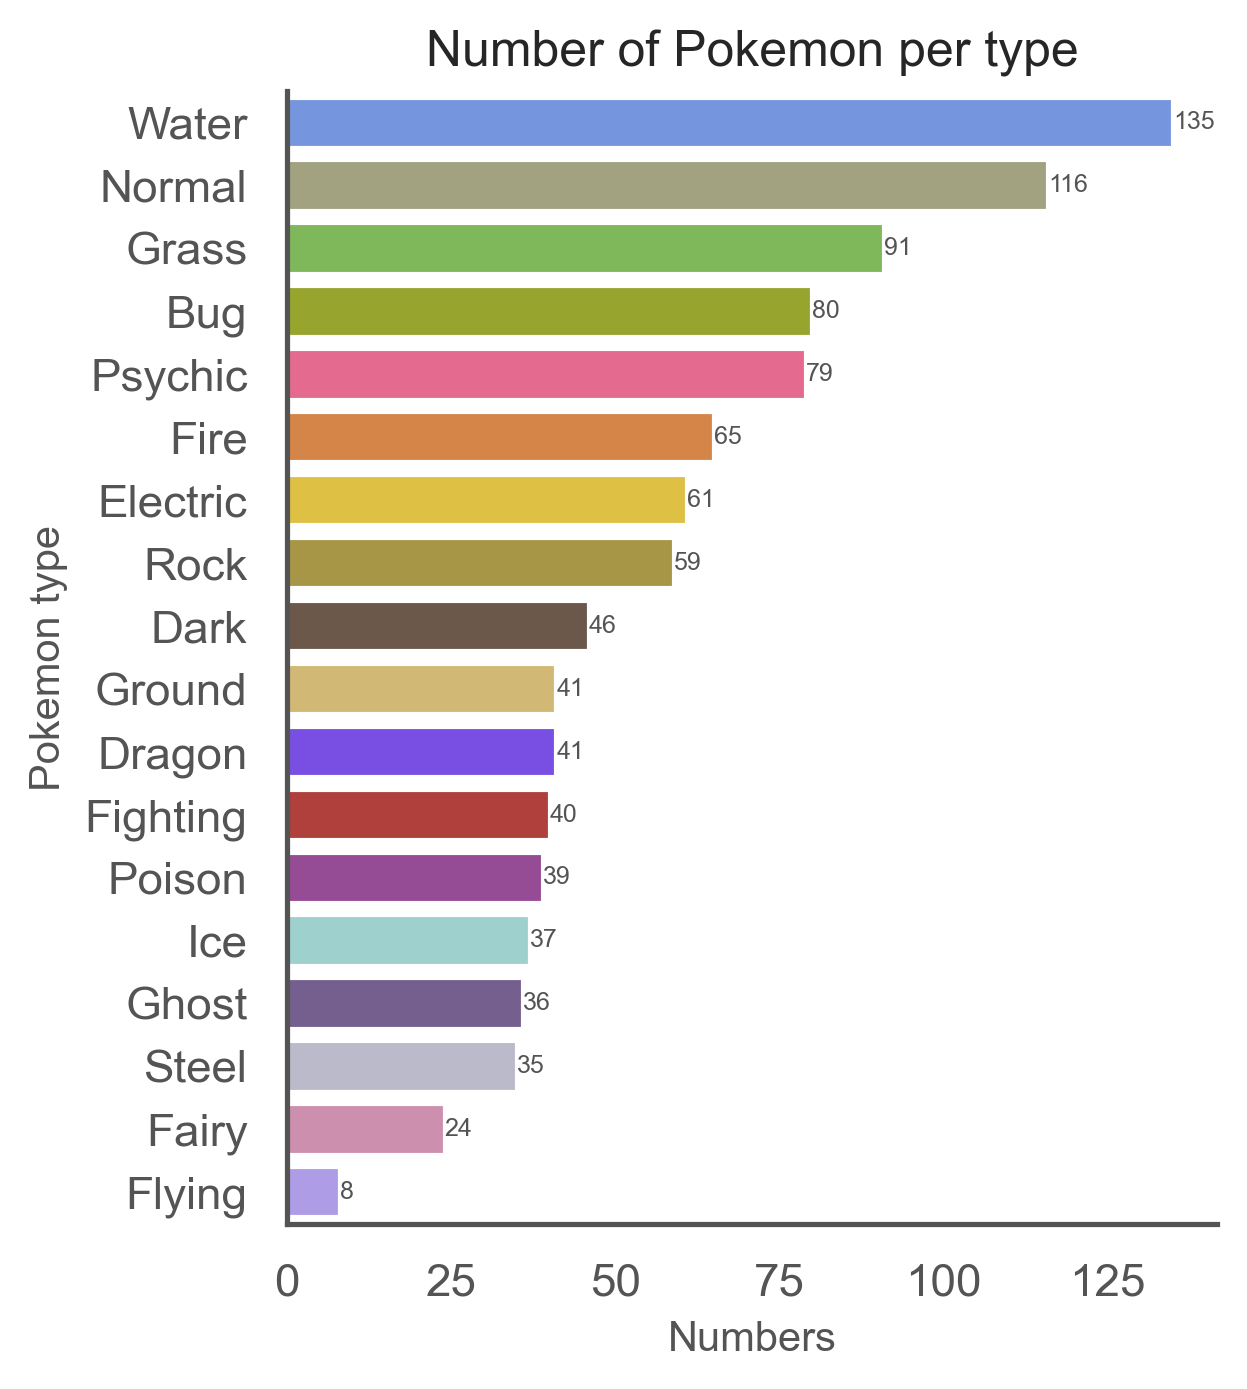

In [168]:
#assign a certain image quality for the graphs. 
sns.set(rc={"figure.dpi":300})

#assign a size for the graphs
sns.set(rc = {"figure.figsize":(4,5)})

#set background color as white
sns.set_style('white')

fig, ax = plt.subplots()

#delete top and right line of the grid
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

#set axis color to grey
ax.spines['left'].set_color('#545454')
ax.spines['bottom'].set_color('#545454')

#assign data to a countplot
pokemon_type_number = sns.countplot(y = "type1", data = pokemon_data, orient = 'h', palette = dict_colours, order=pokemon_data['type1'].value_counts().index, ax=ax)

#set axis label font to grey and size 10
pokemon_type_number.set_xlabel('Numbers', fontsize = 10, color = "#545454")
pokemon_type_number.set_ylabel('Pokemon type', fontsize  = 10, color = "#545454")

#set axis ticks to grey
pokemon_type_number.tick_params(axis='x', colors='#545454')
pokemon_type_number.tick_params(axis='y', colors='#545454')

#add data labels beside each bar
abs_values = pokemon_data['type1'].value_counts(ascending=False).values
pokemon_type_number.bar_label(container=ax.containers[0], labels=abs_values, size = 6, color = "#545454")

plt.title('Number of Pokemon per type')
ax.set_facecolor('xkcd:white')
#display results
plt.show()

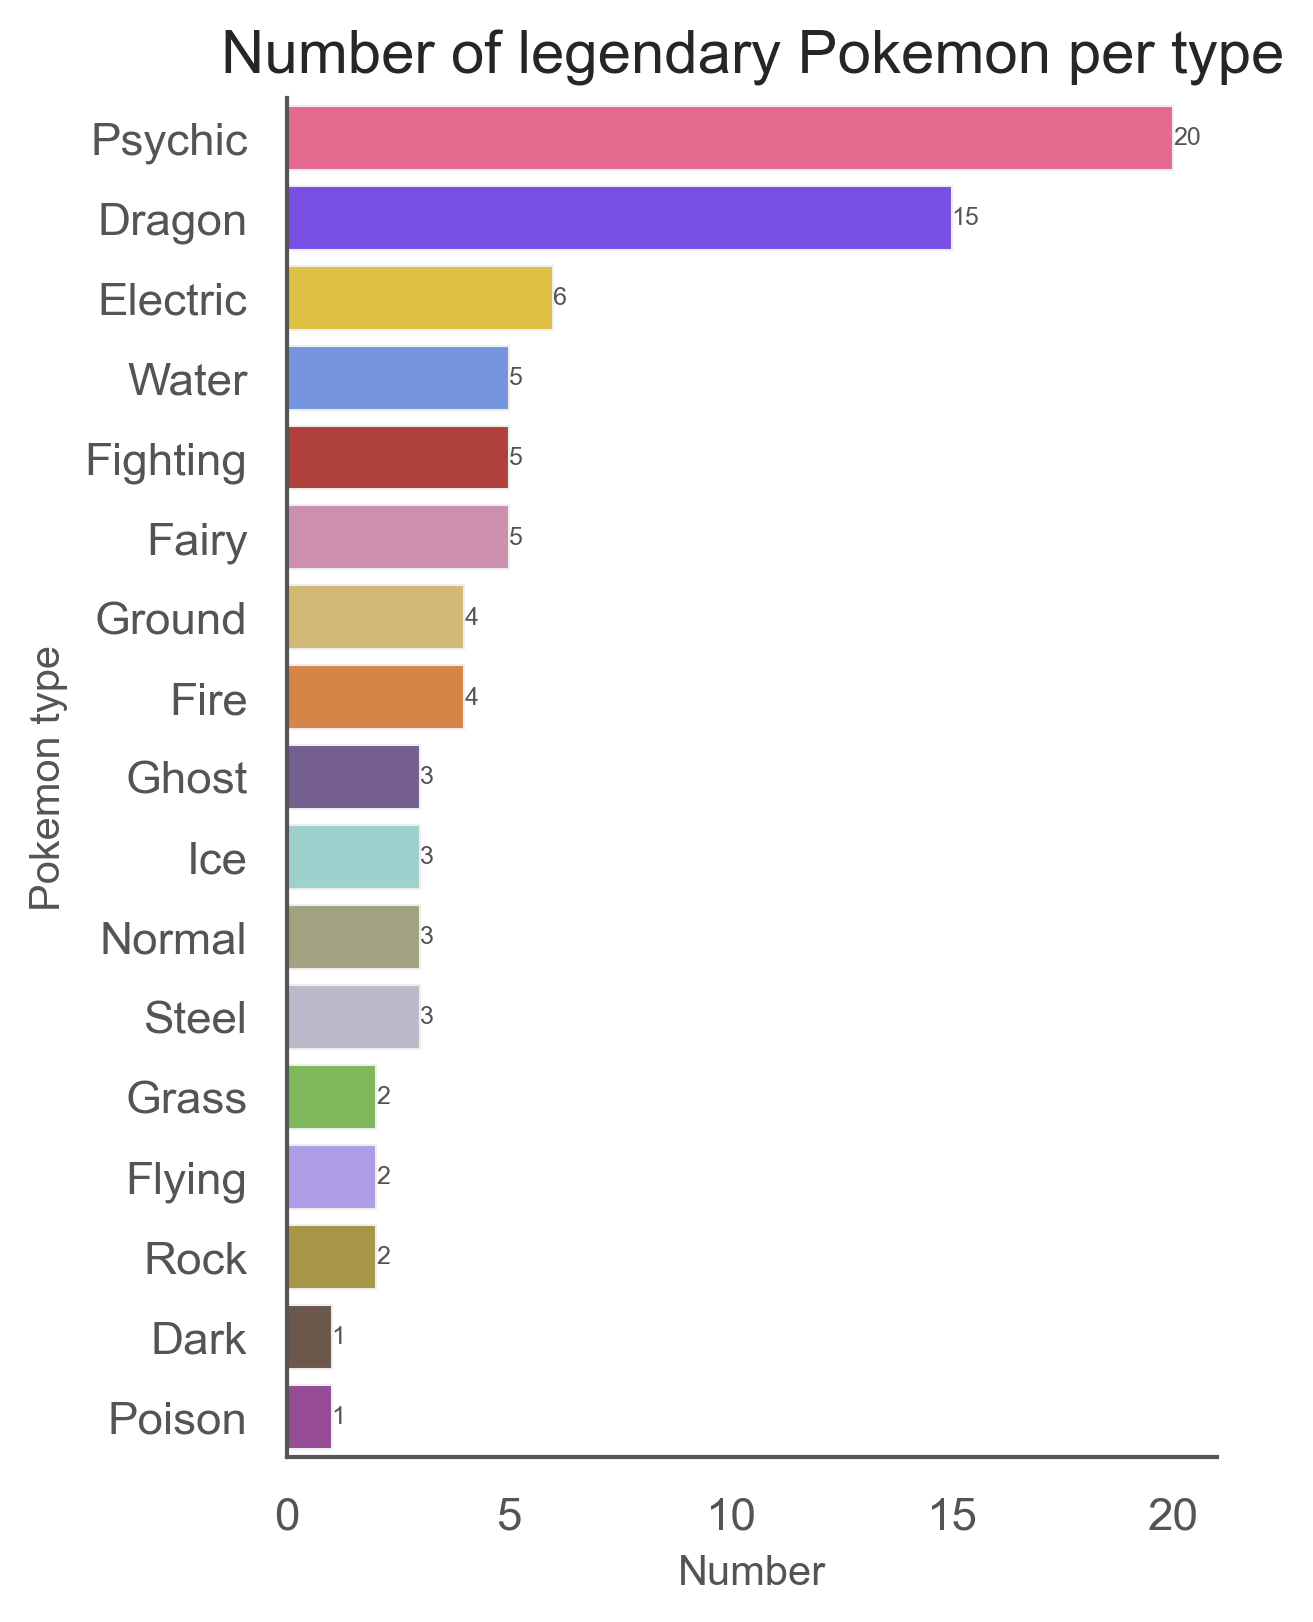

In [166]:
#let's plot the same chart but only for legendary pokemons

#first let's filter our df on legendary pokemons
legendary_df = pokemon_data[pokemon_data["is_legendary"] == 1]

fig, ax = plt.subplots()

#set axis color to grey
ax.spines['left'].set_color('#545454')
ax.spines['bottom'].set_color('#545454')

#delete top and right line of the grid
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

#assign data to a countplot
legendary_type_number = sns.countplot(y = "type1", data = legendary_df, orient = 'h', palette = dict_colours, order=legendary_df['type1'].value_counts().index, ax = ax)

#set axis label font to grey and size 10
plt.xlabel('Number', fontsize  = 10, color = "#545454")
plt.ylabel('Pokemon type', fontsize  = 10, color = "#545454")

#set axis ticks to grey
legendary_type_number.tick_params(axis='x', colors='#545454')
legendary_type_number.tick_params(axis='y', colors='#545454')

#add data labels beside each bar
abs_values = legendary_df['type1'].value_counts(ascending=False).values
legendary_type_number.bar_label(container=ax.containers[0], labels=abs_values, size = 6, color = "#545454")

plt.title('Number of legendary Pokemon per type')
ax.set_facecolor('xkcd:white')

#display results
plt.show()

## Pokemon number by generation

In [43]:
#create dataframes with count of legendary pokemons and count of non-legendary pokemons
is_legend = pokemon_data.groupby(['generation'])['is_legendary'].apply(lambda x: x[x == 1].count()).reset_index(name = 'legendary')
not_legend = pokemon_data.groupby(['generation'])['is_legendary'].apply(lambda x: x[x == 0].count()).reset_index(name = 'non_legendary')

#merge both dataframes
is_pokemon_legend = pd.merge(is_legend, not_legend, on = 'generation')

#melt merged dataframe so it could fit the shape necessary to add series label on next plot
is_pokemon_legend = is_pokemon_legend.melt("generation",var_name="is_legendary",value_name="count")

#sort values by generation
is_pokemon_legend.sort_values(by= "generation", inplace = True)

In [ ]:
palette = [

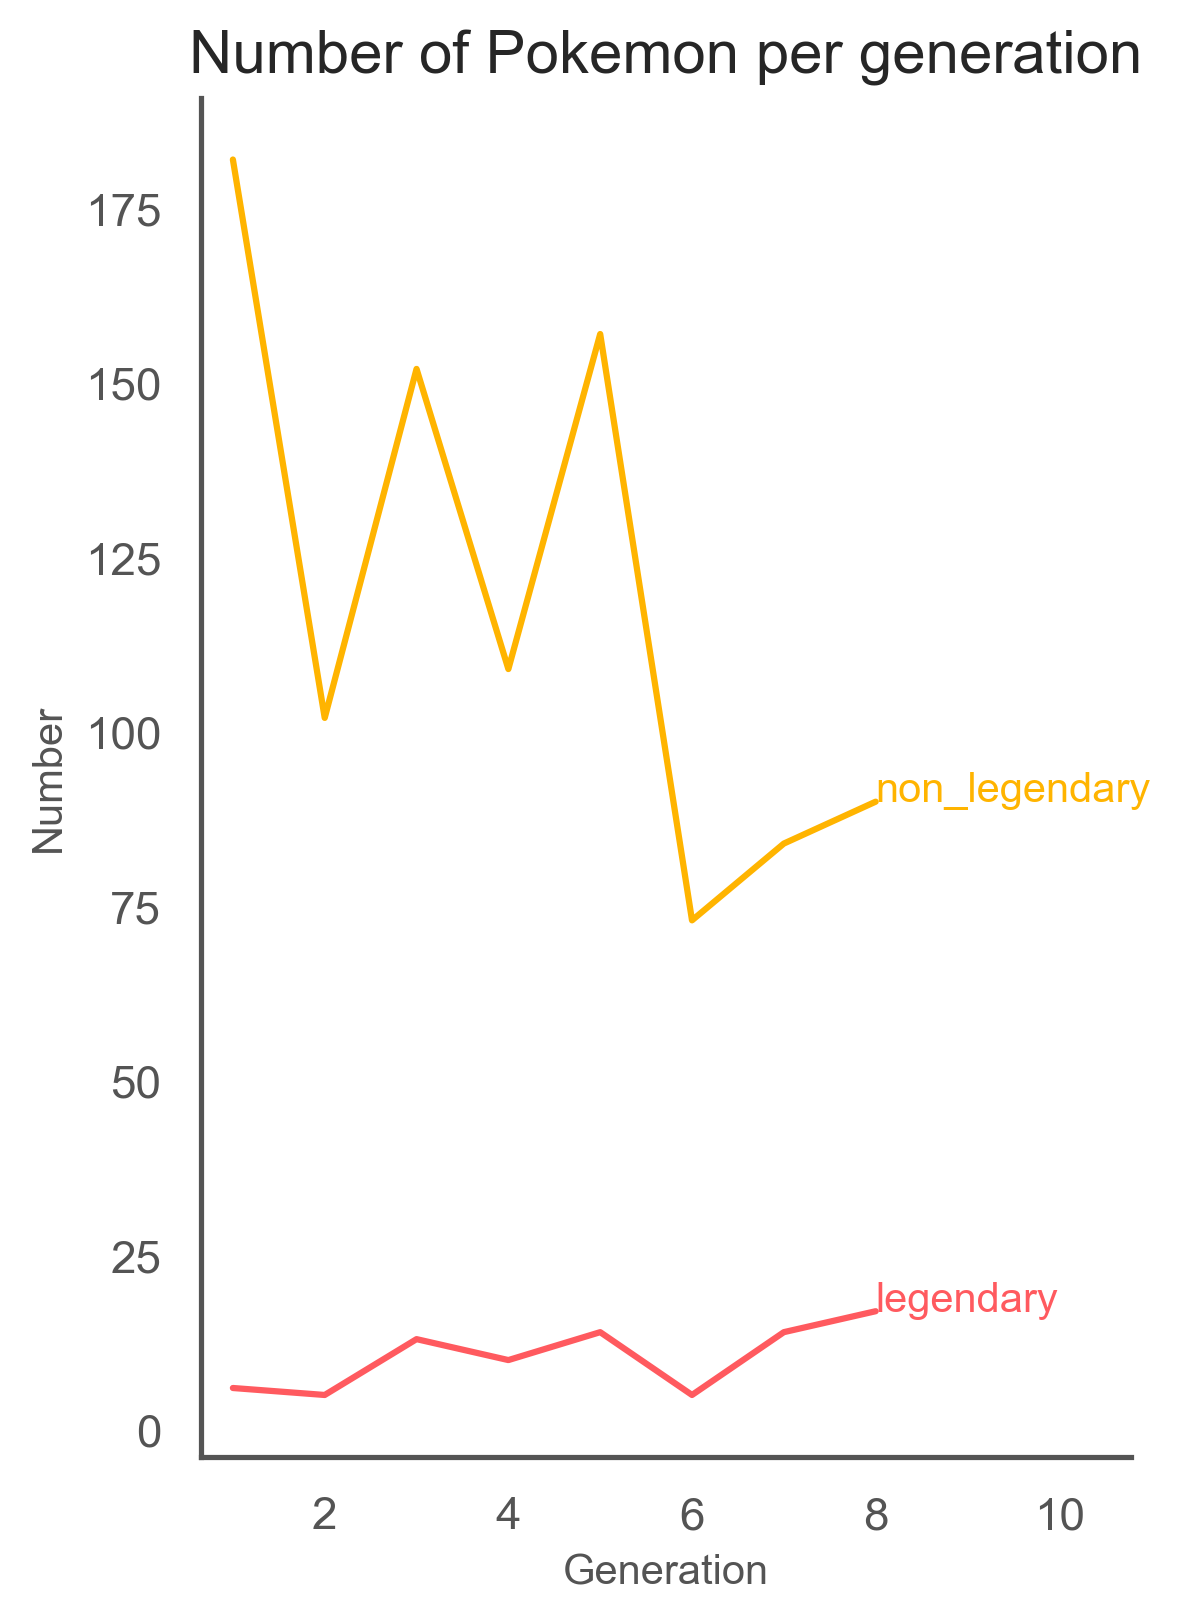

In [163]:
#set plot size
sns.set(rc = {"figure.figsize":(4,6)})

#set background to white
sns.set_style('white')

#set a style for the plot
fig, ax = plt.subplots()

#set a style for the plot
plt.style.use('ggplot')

#assign data to a countplot
legendary_vs_normal  = sns.lineplot(ax=ax, data=is_pokemon_legend, x="generation", y="count", hue="is_legendary", legend=None, palette = COLORS)

#add data labels next to lines
for line, name in zip(ax.lines, is_pokemon_legend.is_legendary.to_list()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
           xy=(x, y),
           xytext=(0, 0),
           color=line.get_color(),
           xycoords=(ax.get_xaxis_transform(),
         ax.get_yaxis_transform()),
           textcoords="offset points")
    text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

#delete grid
ax.grid(False)

#set axis label font to grey and size 10
legendary_vs_normal.set_xlabel("Generation", fontsize = 10, color="#545454")
legendary_vs_normal.set_ylabel("Number", fontsize = 10, color="#545454")

#set axis color to grey
ax.spines['bottom'].set_color('#545454')
ax.spines['left'].set_color('#545454')

#delete top and right line of the grid
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

#set a title
plt.title('Number of Pokemon per generation')

#change axis ticks to grey
legendary_vs_normal.tick_params(axis='x', colors='#545454')
legendary_vs_normal.tick_params(axis='y', colors='#545454')

## Add images

%%time
import requests
from PIL import Image
from io import BytesIO
import os

os.mkdir('pokemon_image', 777)

for i in range(905):
    r = requests.get(f"https://assets.pokemon.com/assets/cms2/img/pokedex/detail/{i+1:03}.png")
    im = Image.open(BytesIO(r.content))
    im.save(f'./pokemon_image/{i+1:03}.png')
    if i and i % 100 == 0 : 
        print(f"{i+1}th Image Save Compelete")

In [45]:
#import png file from local machine

pd.set_option('display.max_colwidth', -1)


def get_thumbnail(path):
    path = path 
    i = Image.open(path)    
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/png;base64,{image_base64(im)}">'

In [22]:
#create new columns "file" and "image" to pokemon_data
pokemon_data['file'] = ""
pokemon_data["image"] = ""

#add all image urls and store it to "file" column
pokemon_data['file'].iloc[0:905] = pokemon_data.pokedex_number.iloc[0:905].map(lambda pokedex_number : f'C:/Users/Anaïs WERNLE/Desktop/pokemon-image/{pokedex_number}.png')

#add images to df thanks to the function above
pokemon_data['image'].iloc[0:905] = pokemon_data.file.iloc[0:905].map(lambda f: get_thumbnail(f))

#set pokedex_number as index and keep it as a column as well
pokemon_data.set_index('pokedex_number', inplace = True,  drop=False)
#HTML(pokemon_data[['image', "name"]].iloc[0:905].to_html(formatters={'image': image_formatter}, escape=False))

In [23]:
print("There is", len(legendary_df.index), "legendary pokemons")

There is 84 legendary pokemons


In [24]:
#same as below but for legendary_df
legendary_df['file'] = ""
legendary_df["image"] = ""
legendary_df['file'].iloc[0:83] = legendary_df.pokedex_number.iloc[0:83].map(lambda pokedex_number : f'C:/Users/Anaïs WERNLE/Desktop/pokemon_image/{pokedex_number}.png')
legendary_df['image'].iloc[0:83] = legendary_df.file.iloc[0:83].map(lambda f: get_thumbnail(f))
legendary_df.set_index('pokedex_number', inplace = True,  drop=False)
#HTML(legendary_df[['image', "name"]].iloc[0:83].to_html(formatters={'image': image_formatter}, escape=False))

## Pokemon stats

In [57]:
#caculate the average stats for all legendary pokemons
avg_legend_df = legendary_df[["hp","attack", "defense", "sp_attack", "sp_defense", "speed"]].mean()
avg_legend_df["category"] = "Legendary"

#caculate the average stats for non-legendary pokemons
avg_not_legend_df= pokemon_data[["hp","attack", "defense", "sp_attack", "sp_defense", "speed"]].mean()
avg_not_legend_df["category"] = "Non-legendary"

#merge both dataframe
stats = pd.concat([avg_legend_df, avg_not_legend_df], axis = 1)
stats = stats.T

#set category as the first column
stats = stats[["category", 'hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]]

#set all dataframe to int
stats[['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]] = stats[['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]].astype(int)

In [130]:
CATEGORY = stats["category"].values.tolist()


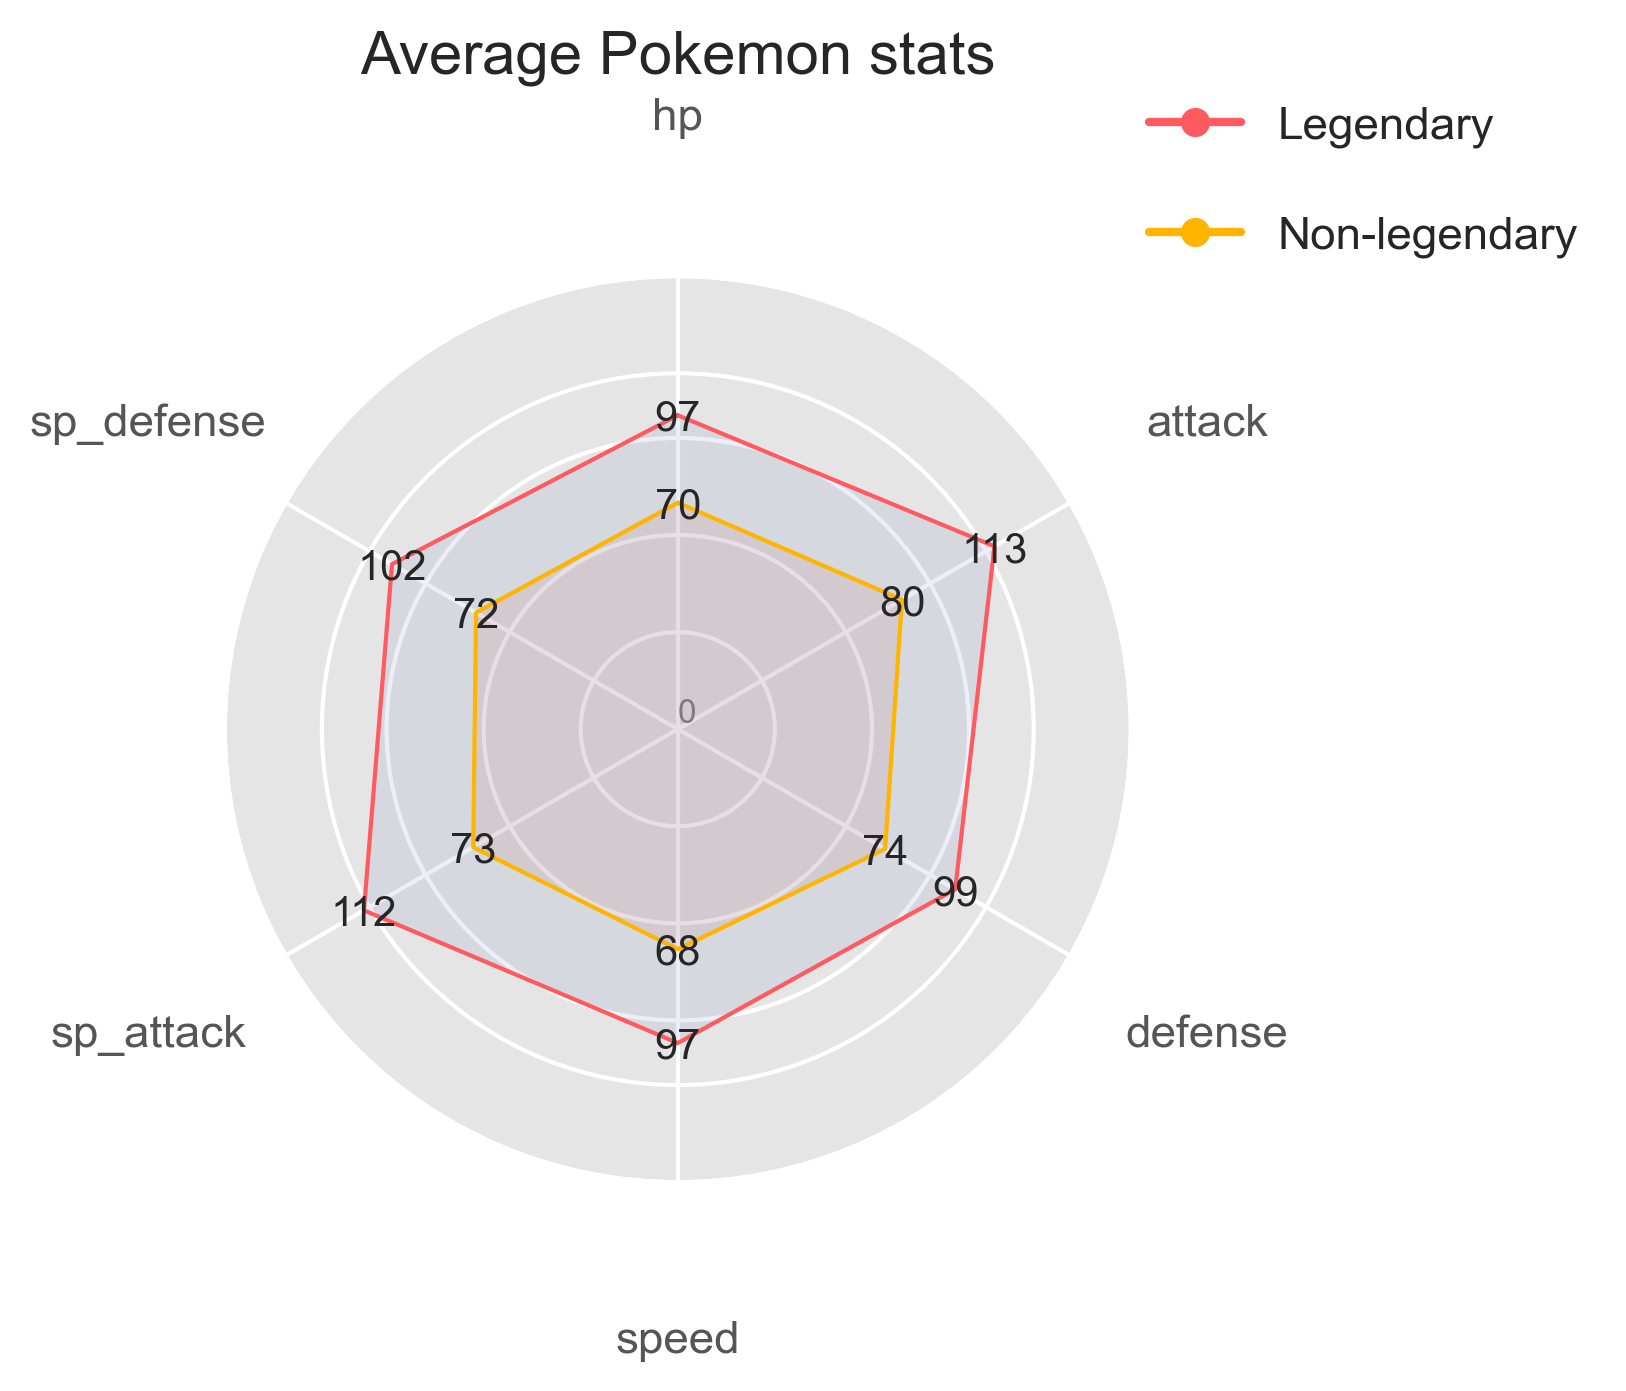

In [160]:
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D  
fig = plt.figure(figsize=(6,4))

categories=list(stats)[1:]
N = len(categories)
 
#calculate angles of each axis in the plot. (we divide the plot/number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
#initialise the spider plot
ax = plt.subplot(111, polar=True)
 
#set the first axis (hp) on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
#draw one axis per variable + add labels
plt.xticks(angles[:-1], categories)
 
#draw y labels
ax.set_rlabel_position(0)

#set scale
plt.yticks([0,50,150], ["0","50","150"], color="grey", size=7)

#start axis at 0 and end axis at 160
plt.ylim=(0,160)
 
#legendary plot

#values are from all columns except categories and are stored in a list
values_1=stats.loc[0].drop('category').values.flatten().tolist()
values_1 += values_1[:1]

#assign to a radarplot
ax.plot(angles, values_1, linewidth=1, linestyle='solid', label="Legendary", color = "#FF5A5F")
ax.fill(angles, values_1, 'b', alpha=0.1)
 
#values are from all columns except categories and are stored in a list
values_2=stats.loc[1].drop('category').values.flatten().tolist()
values_2 += values_2[:1]

#assign to the same radarplot
ax.plot(angles, values_2, linewidth=1, linestyle='solid', label="Not legendary",  color = "#FFB400")
ax.fill(angles, values_2, 'r', alpha=0.1)
 
    
#add legendary data labels to lines 
ax.annotate(values_1[0], xy=(angles[0],values_1[0]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_1[1], xy=(angles[1],values_1[1]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_1[2], xy=(angles[2],values_1[2]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_1[3], xy=(angles[3],values_1[3]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_1[4], xy=(angles[4],values_1[4]), textcoords='data',size=10, ha="center", va="center_baseline")
ax.annotate(values_1[5], xy=(angles[5],values_1[5]), textcoords='data',size=10, ha="center", va="center_baseline")    
    
#set x ticks 
plt.xticks(angles[:-1], categories)

#set y ticks (not visible)
plt.yticks([0, 30, 60, 90, 110, 140], size = 8, visible=True)
plt.ylim = (0, 140)
    
#add legendary data labels to lines 
ax.annotate(values_2[0], xy=(angles[0],values_2[0]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_2[1], xy=(angles[1],values_2[1]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_2[2], xy=(angles[2],values_2[2]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_2[3], xy=(angles[3],values_2[3]), textcoords='data',size=10,ha="center", va="center_baseline")
ax.annotate(values_2[4], xy=(angles[4],values_2[4]), textcoords='data',size=10, ha="center", va="center_baseline")
ax.annotate(values_2[5], xy=(angles[5],values_2[5]), textcoords='data',size=10, ha="center", va="center_baseline")

#add space between catgeory name and chart
ax.tick_params(axis='both', which='major', pad=25)
COLORS = ["#FF5A5F", "#FFB400"]

# yticks position
ax.set_rlabel_position(0) 
# Add legend

handles = [
    Line2D(
        [], [], 
        c=color, 
        lw=2, 
        marker="o", 
        markersize=6, 
        label=category
    )
    for category, color in zip(CATEGORY, COLORS)
]
legend = ax.legend(handles=handles, loc=(1, 1),labelspacing=1.5, frameon=False)
plt.title('Average Pokemon stats')

# Show the graph
plt.show()

In [102]:
def plot_img(idx):
    # get URL from df
    url = dataframe.file[idx]

    # read and plot image
    image = imread(url, format = 'PNG')
    import cv2
    
    #assign image to imshow
    plt.imshow(image, interpolation='none')
    
    
    # plot pokemon name
    plt.title(dataframe.name[idx], loc='left', fontsize=18)
    
    #delete axis surrounding pokemon image
    ax.axis('off')
    
def plot_radar(idx):
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    #set categories
    categories = ['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]
    N = len(categories) # get number of categories
    
    #set values
    values= dataframe_new.iloc[idx].values.tolist()
    values += values[:1] # repeat first value to close poly
    
    #calculate angle for each category
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # repeat first angle to close poly
    
    #plot radarplot 
    plt.polar(angles, values, marker='.') # lines
    plt.fill(angles, values, alpha=0.3) # area
    
    #set xticks
    plt.xticks(angles[:-1], categories)
    
 
     
    #plot data labels
    ax.annotate(values[0], xy=(angles[0],values[0]), textcoords='data',size=8,ha="center", va="center")
    ax.annotate(values[1], xy=(angles[1],values[1]), textcoords='data',size=8,ha="center", va="center")
    ax.annotate(values[2], xy=(angles[2],values[2]), textcoords='data',size=8,ha="center", va="center")
    ax.annotate(values[3], xy=(angles[3],values[3]), textcoords='data',size=8,ha="center", va="center")
    ax.annotate(values[4], xy=(angles[4],values[4]), textcoords='data',size=8, ha="center", va="center")
    ax.annotate(values[5], xy=(angles[5],values[5]), textcoords='data',size=8, ha="center", va="center")
    
    #set y ticks
    plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], size = 5, visible=False)
    
    #starts axis from 0 and ends axis to 130
    plt.ylim = (0, 220)

    #add space between catgeory name and chart
    ax.tick_params(axis='both', which='major', pad=25)
    
    ax.set_rlabel_position(90) # yticks position

In [74]:
#name a df "top_stats" with the columns below from pokemon_data
top_stats = pokemon_data[["name", "pokedex_number", "hp","attack", "defense", "sp_attack", "sp_defense", "speed"]]
#calculate the mean stat for each pokemon
top_stats["mean"] = top_stats[["hp","attack", "defense", "sp_attack", "sp_defense", "speed"]].mean(axis=1)
#keep only the ten highest mean 
top_stats = top_stats.nlargest(10, 'mean')
#add columns "file" and "name" to df
top_stats['file'] = ""
top_stats["image"] = ""

#add all image urls and store it to "file" column
top_stats['file'].iloc[0:83] = top_stats.pokedex_number.iloc[0:83].map(lambda pokedex_number : f'C:/Users/Anaïs WERNLE/Desktop/pokemon_image/{pokedex_number}.png')

#add images to df thanks to the function used before
top_stats['image'].iloc[0:83] = top_stats.file.iloc[0:83].map(lambda f: get_thumbnail(f))

#set pokedex_number as index
top_stats.set_index('pokedex_number', inplace = True, drop = False)

#HTML(top_stats[['image', "name"]].iloc[0:83].to_html(formatters={'image': image_formatter}, escape=False))

#name a df "low_stats" with the columns below from pokemon_data
low_stats = pokemon_data[["name", "pokedex_number", "hp","attack", "defense", "sp_attack", "sp_defense", "speed"]]

#calculate the mean stat for each pokemon
low_stats["mean"] = low_stats[["hp","attack", "defense", "sp_attack", "sp_defense", "speed"]].mean(axis=1)

#keep only the ten lowest mean 
low_stats = low_stats.nsmallest(10, 'mean')

#add columns "file" and "name" to df
low_stats['file'] = ""
low_stats["image"] = ""

#add all image urls and store it to "file" column
low_stats['file'].iloc[0:83] = low_stats.pokedex_number.iloc[0:83].map(lambda pokedex_number : f'C:/Users/Anaïs WERNLE/Desktop/pokemon_image/{pokedex_number}.png')

#add images to df thanks to the function used before
low_stats['image'].iloc[0:83] = low_stats.file.iloc[0:83].map(lambda f: get_thumbnail(f))

#set pokedex_number as index
low_stats.set_index('pokedex_number', inplace = True, drop = False)
#HTML(low_stats[['image', "name"]].iloc[0:83].to_html(formatters={'image': image_formatter}, escape=False))

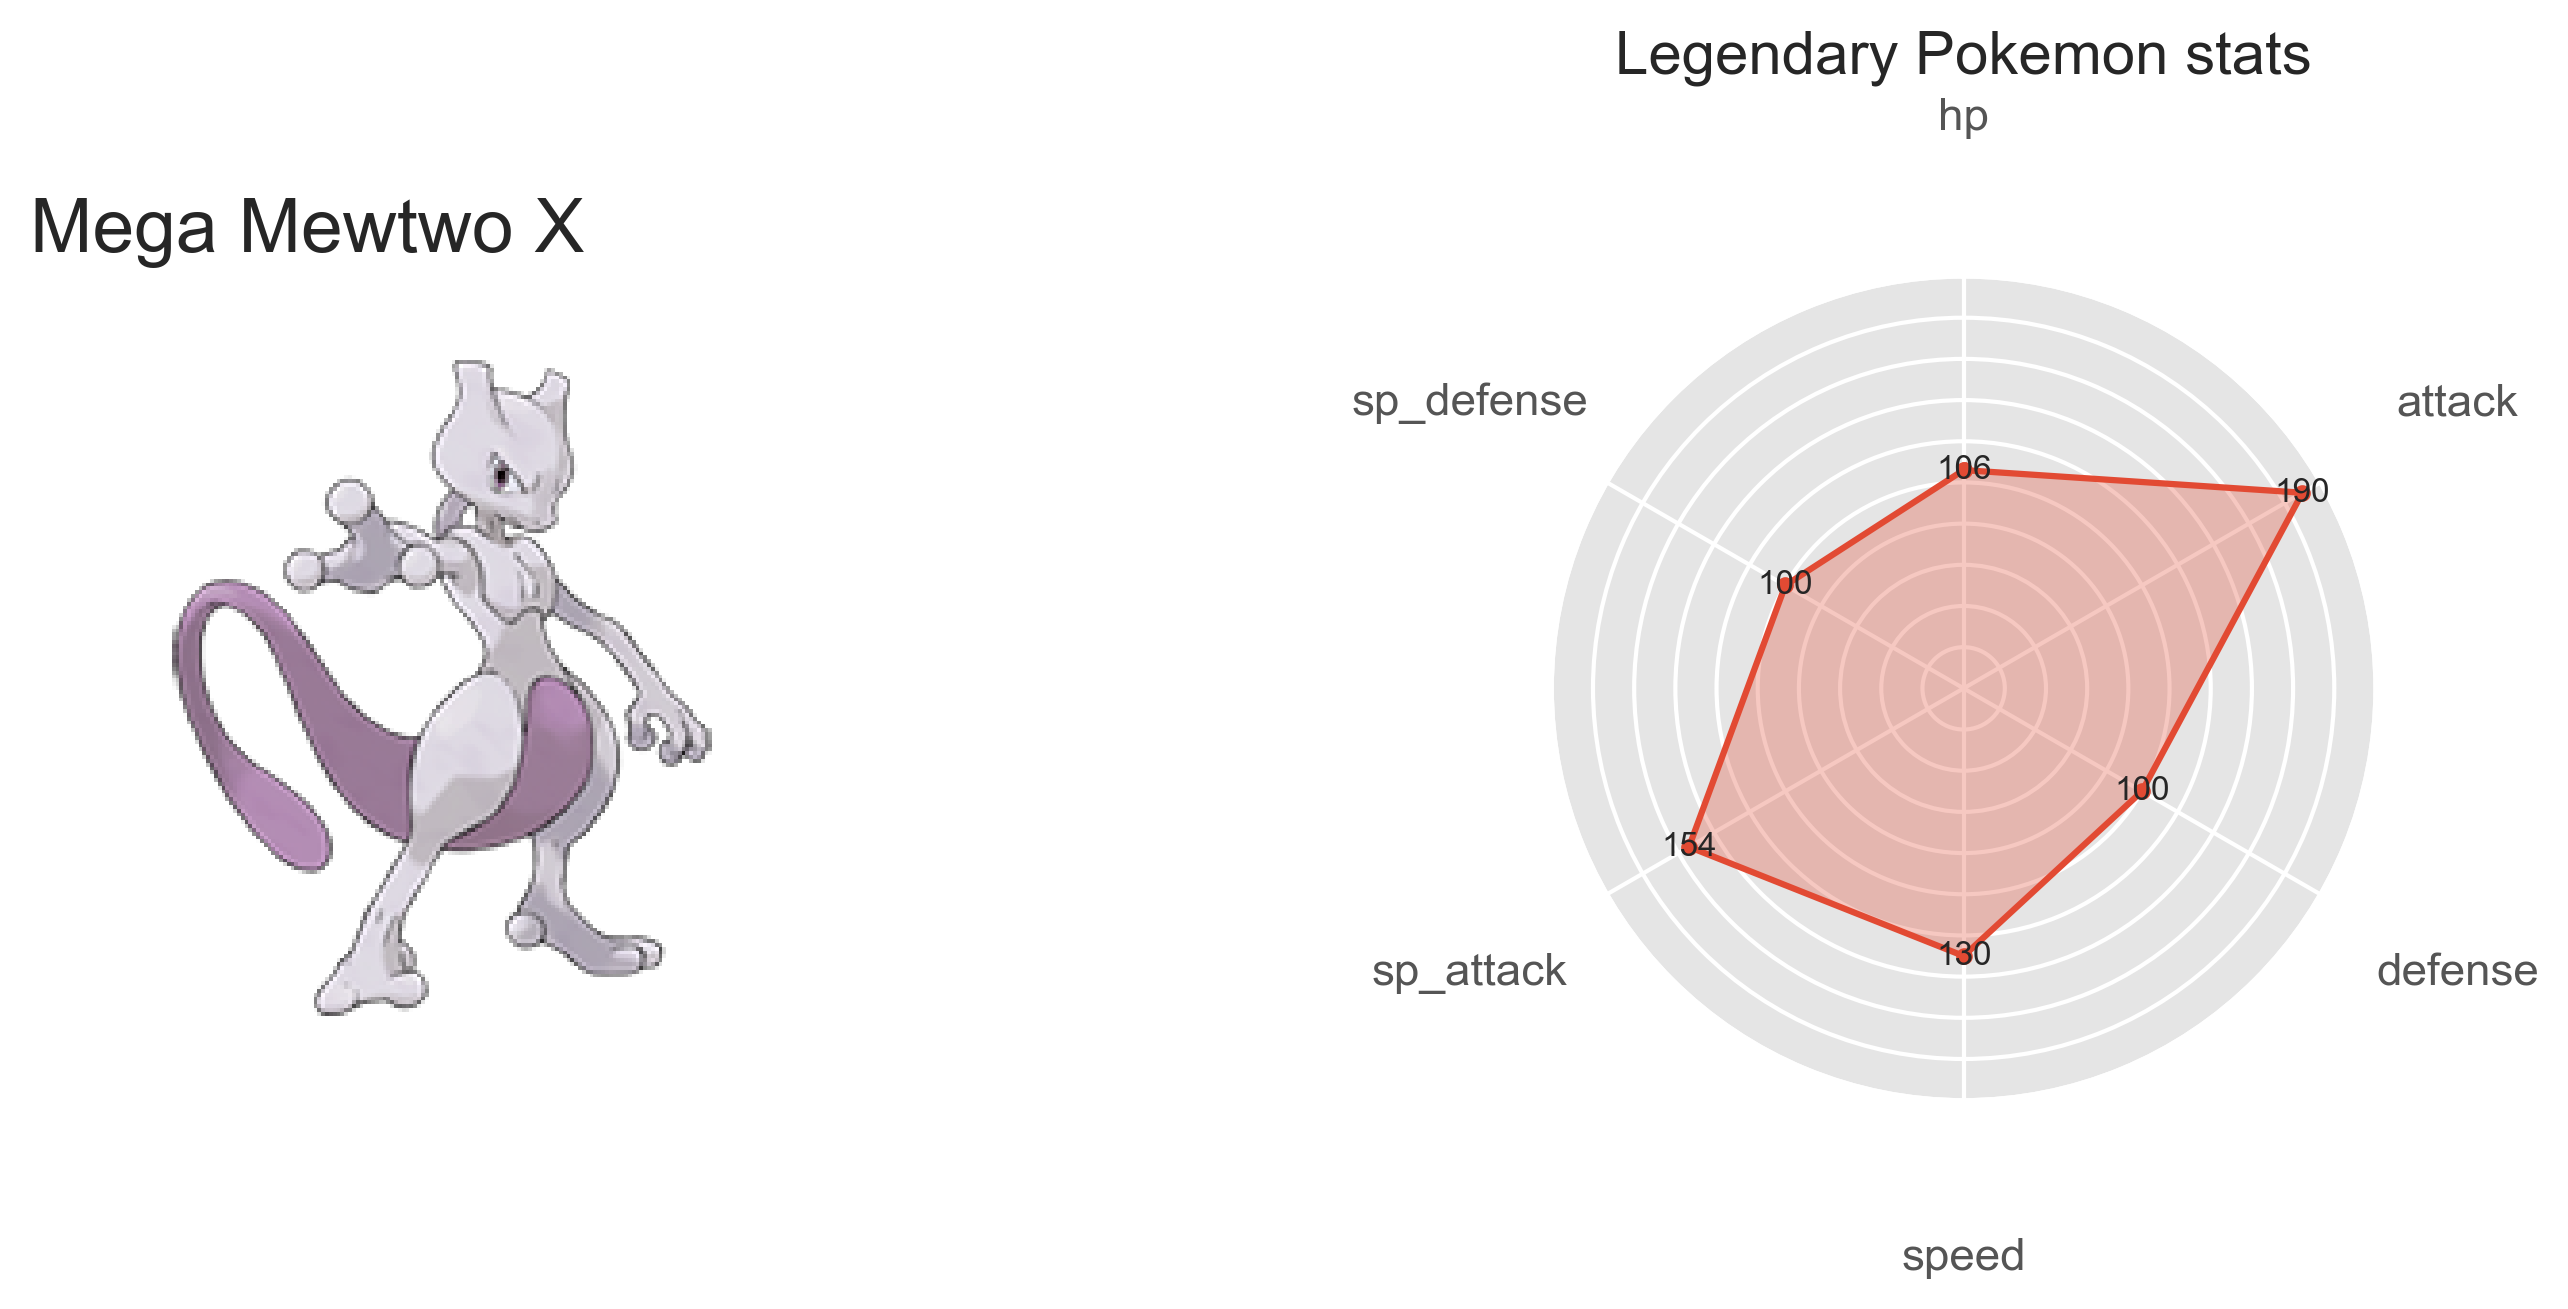

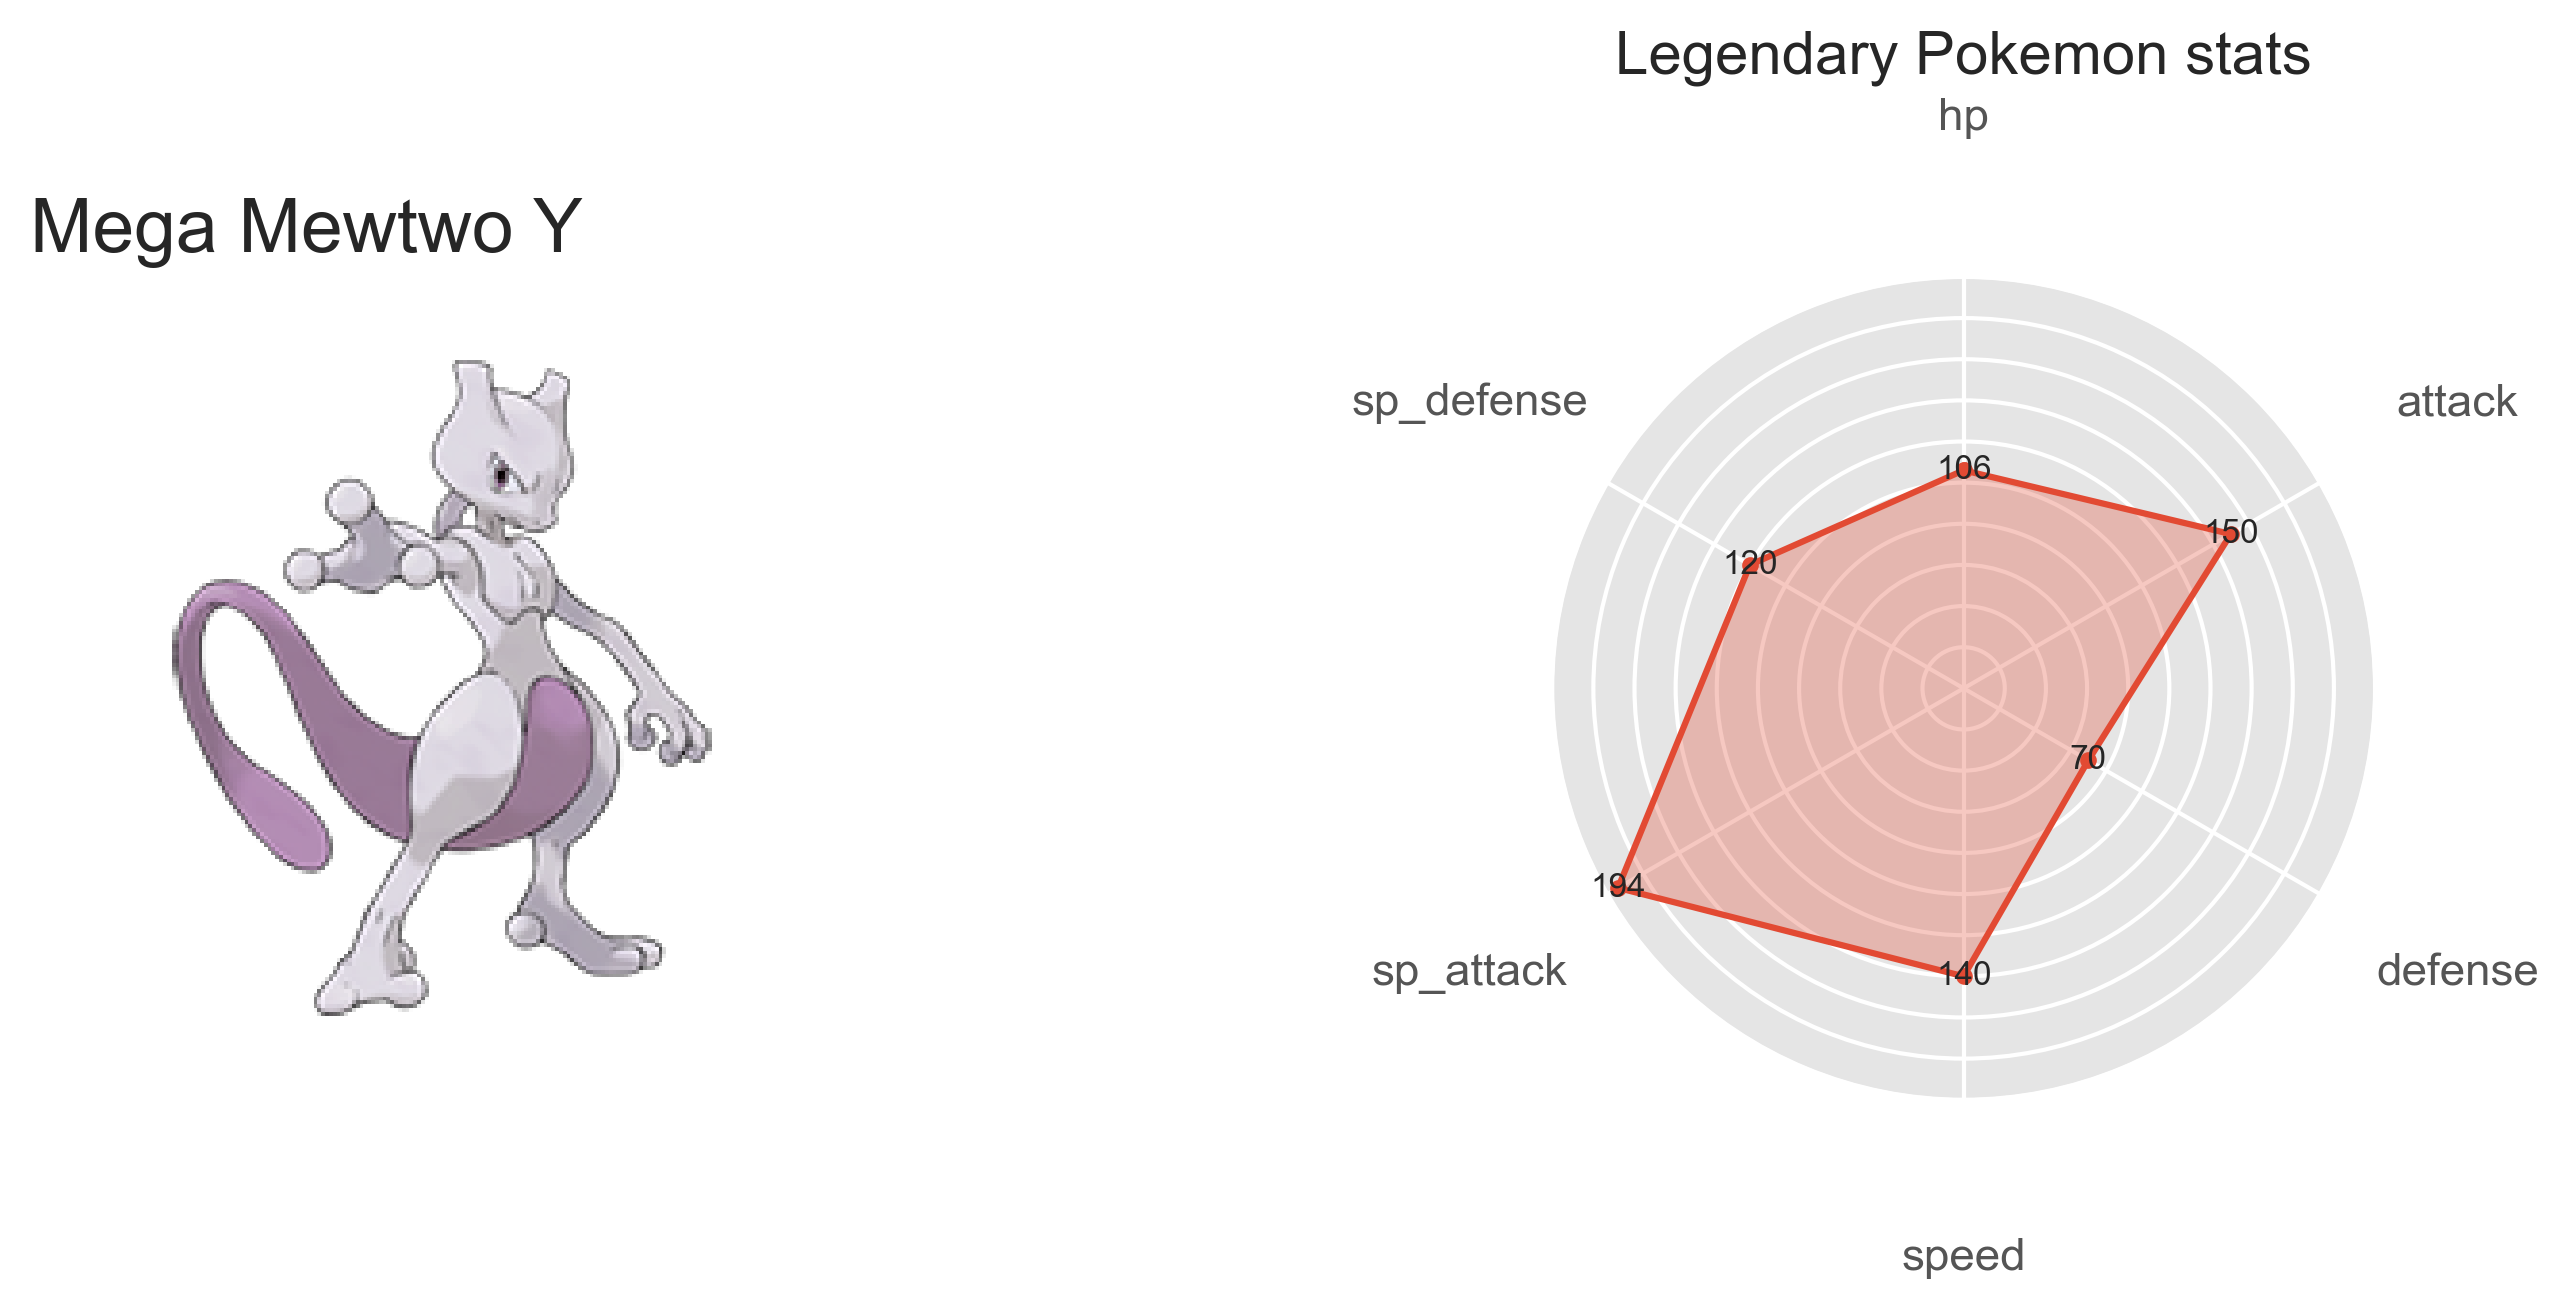

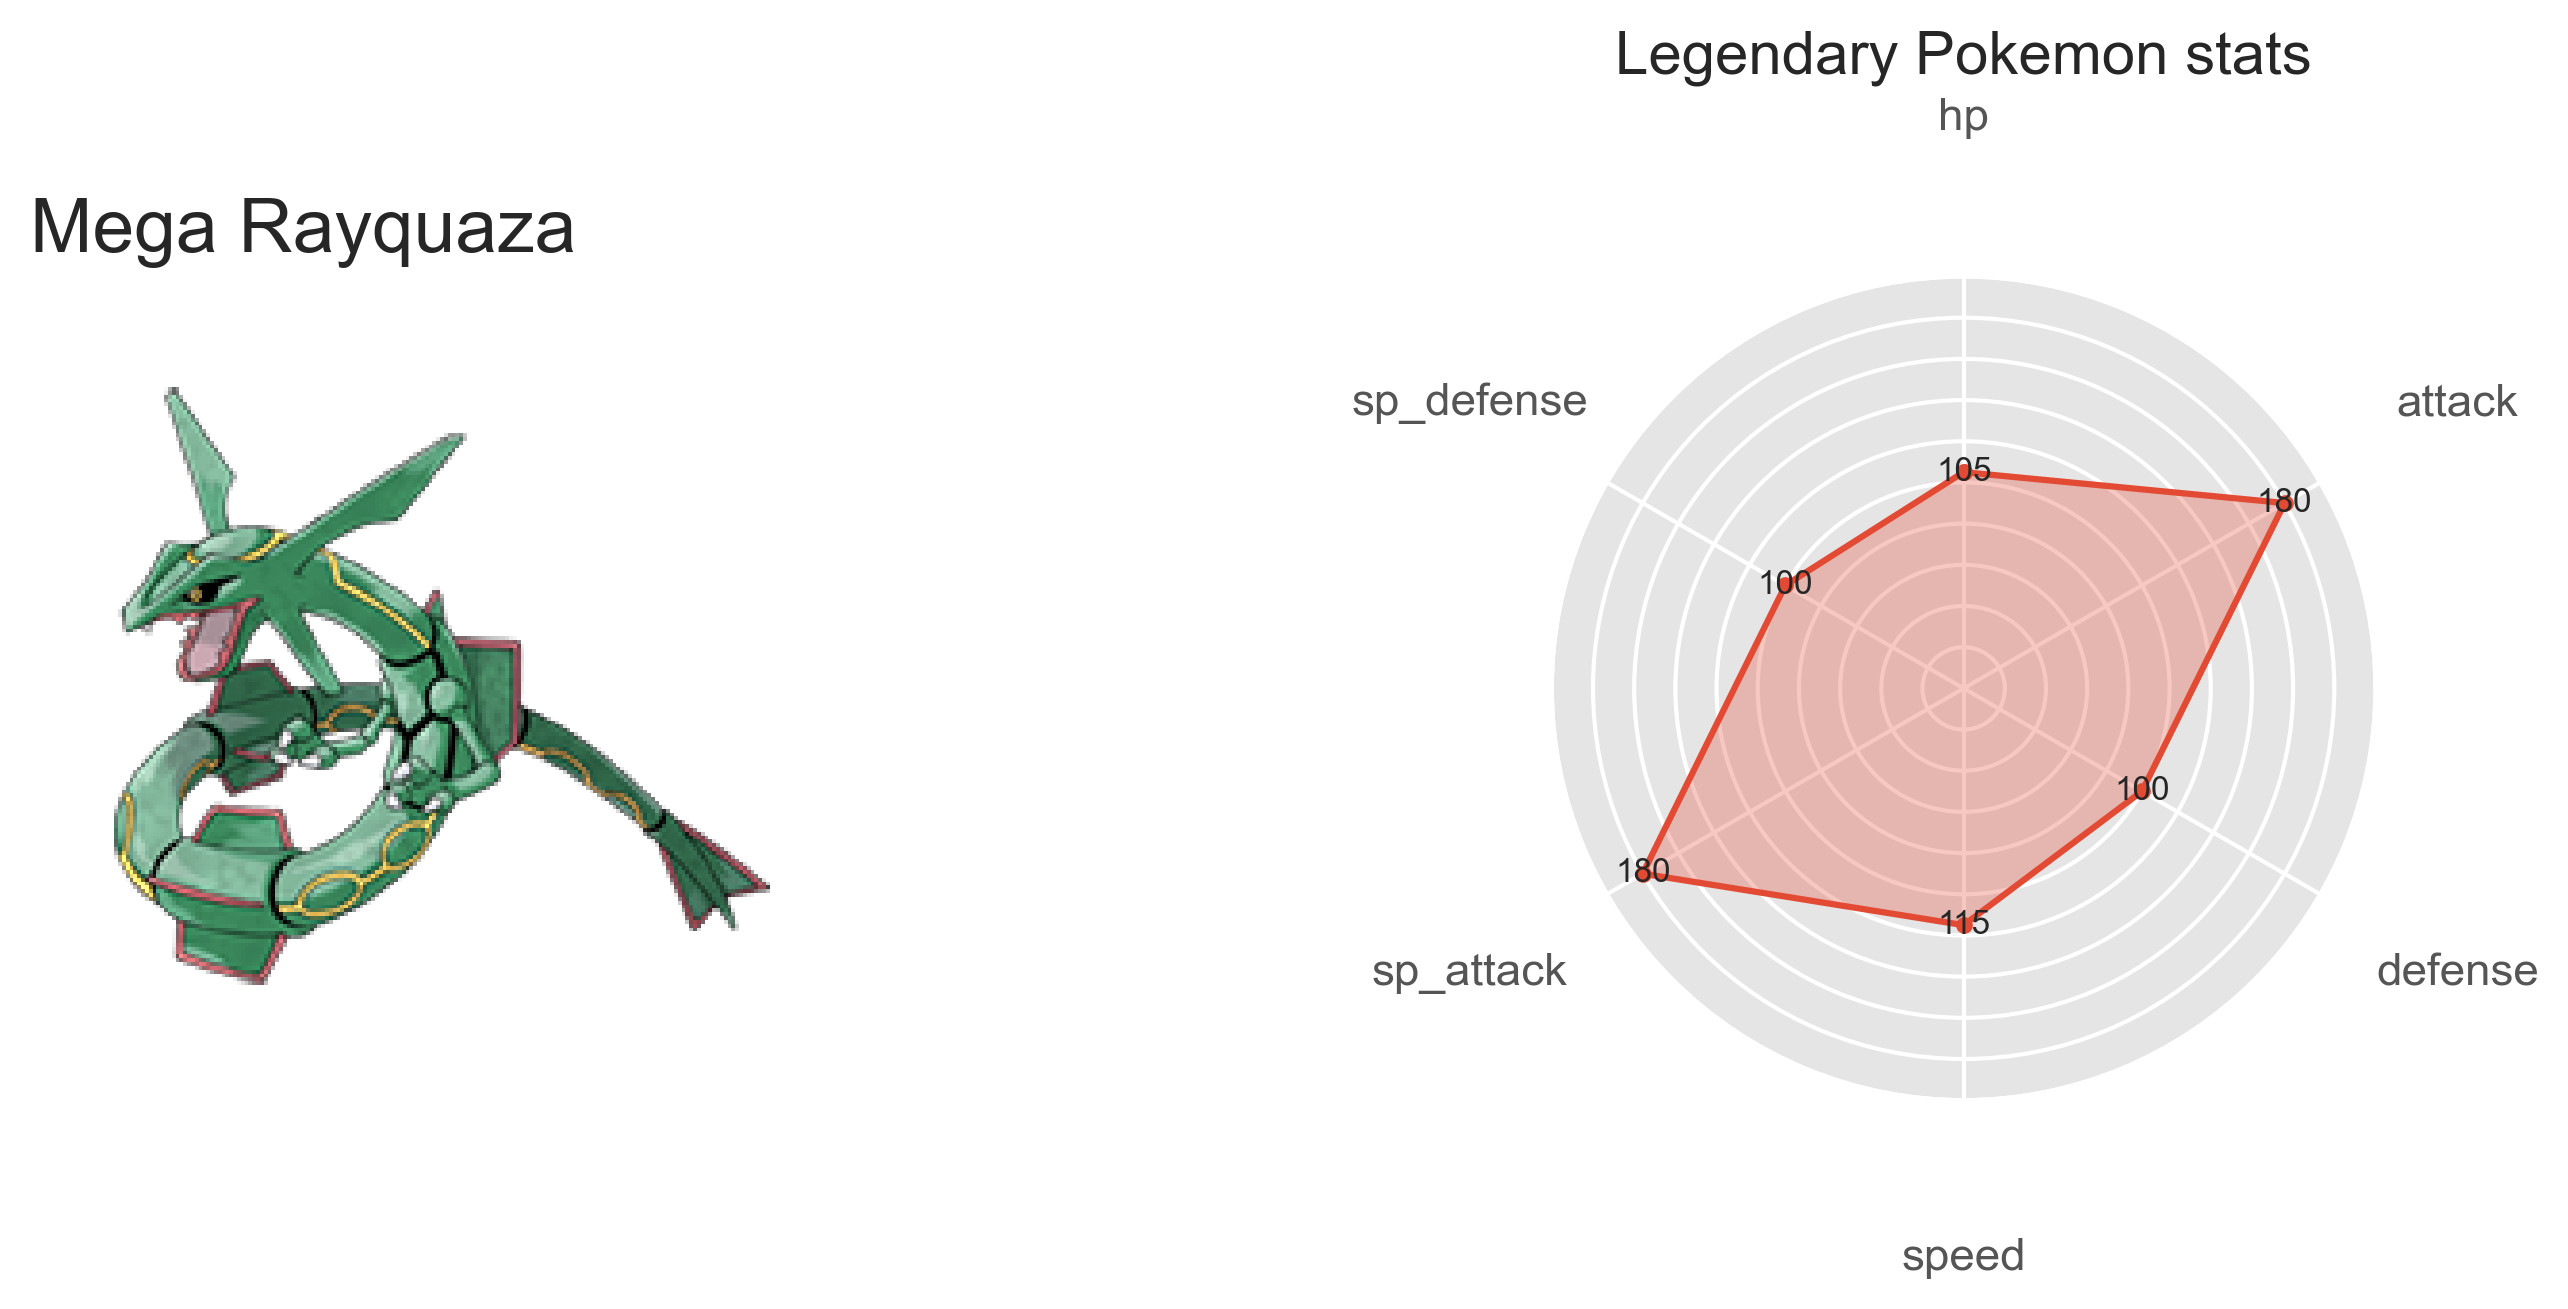

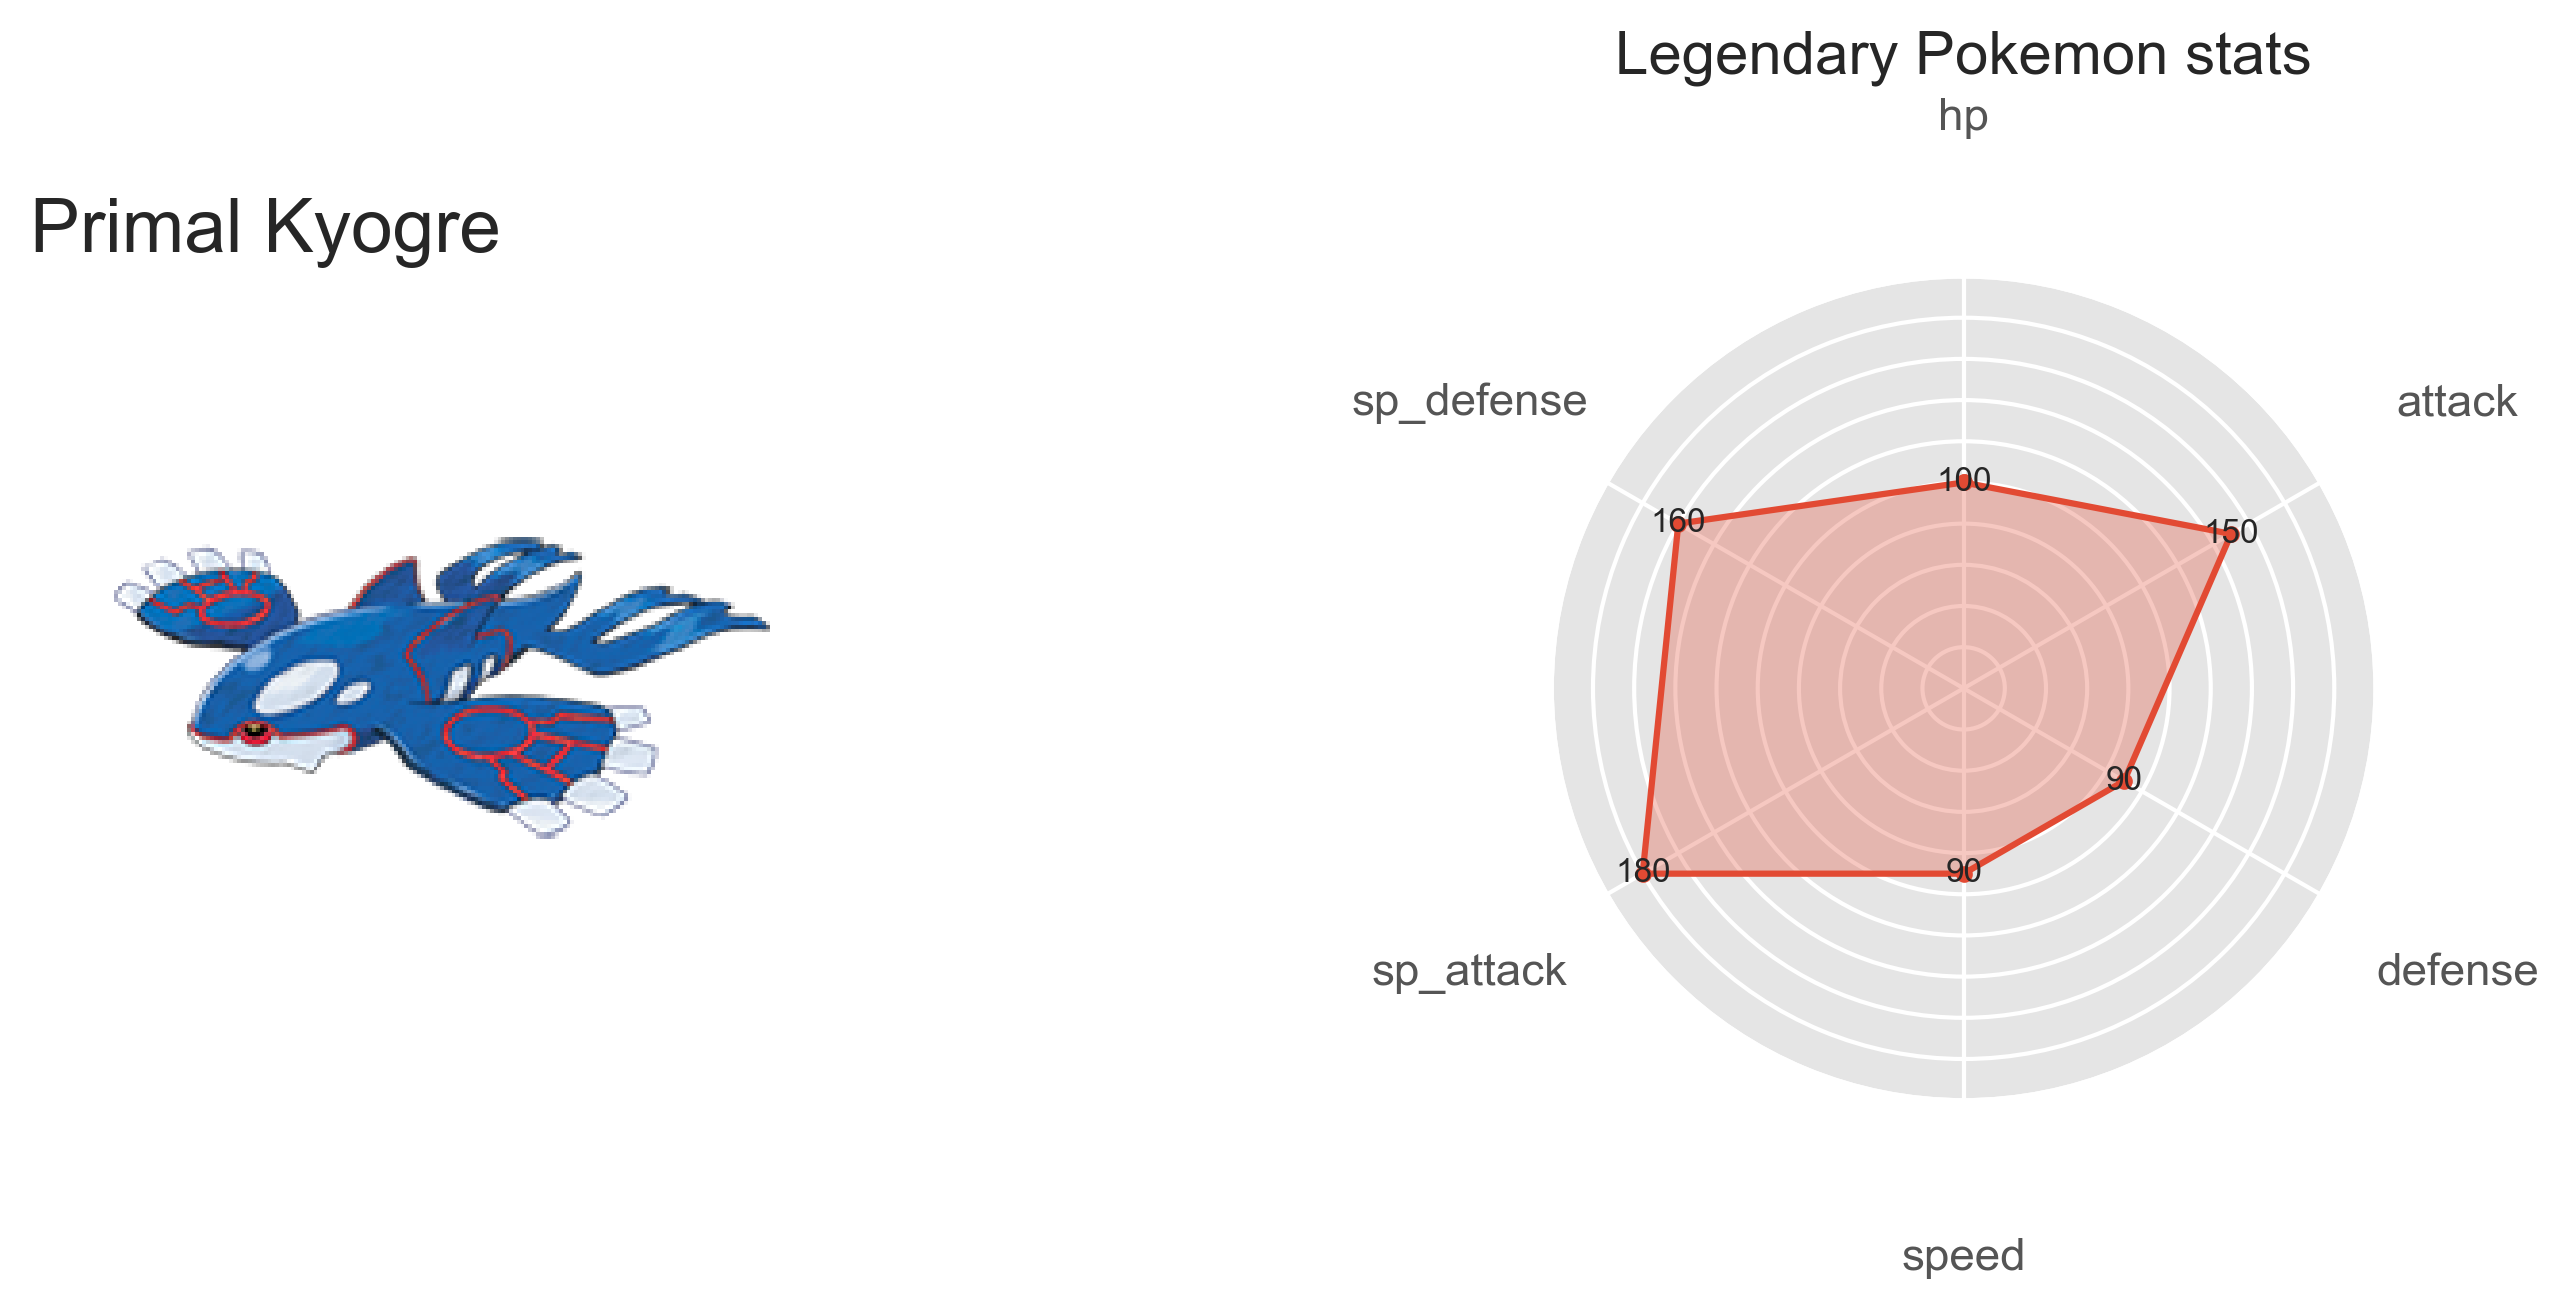

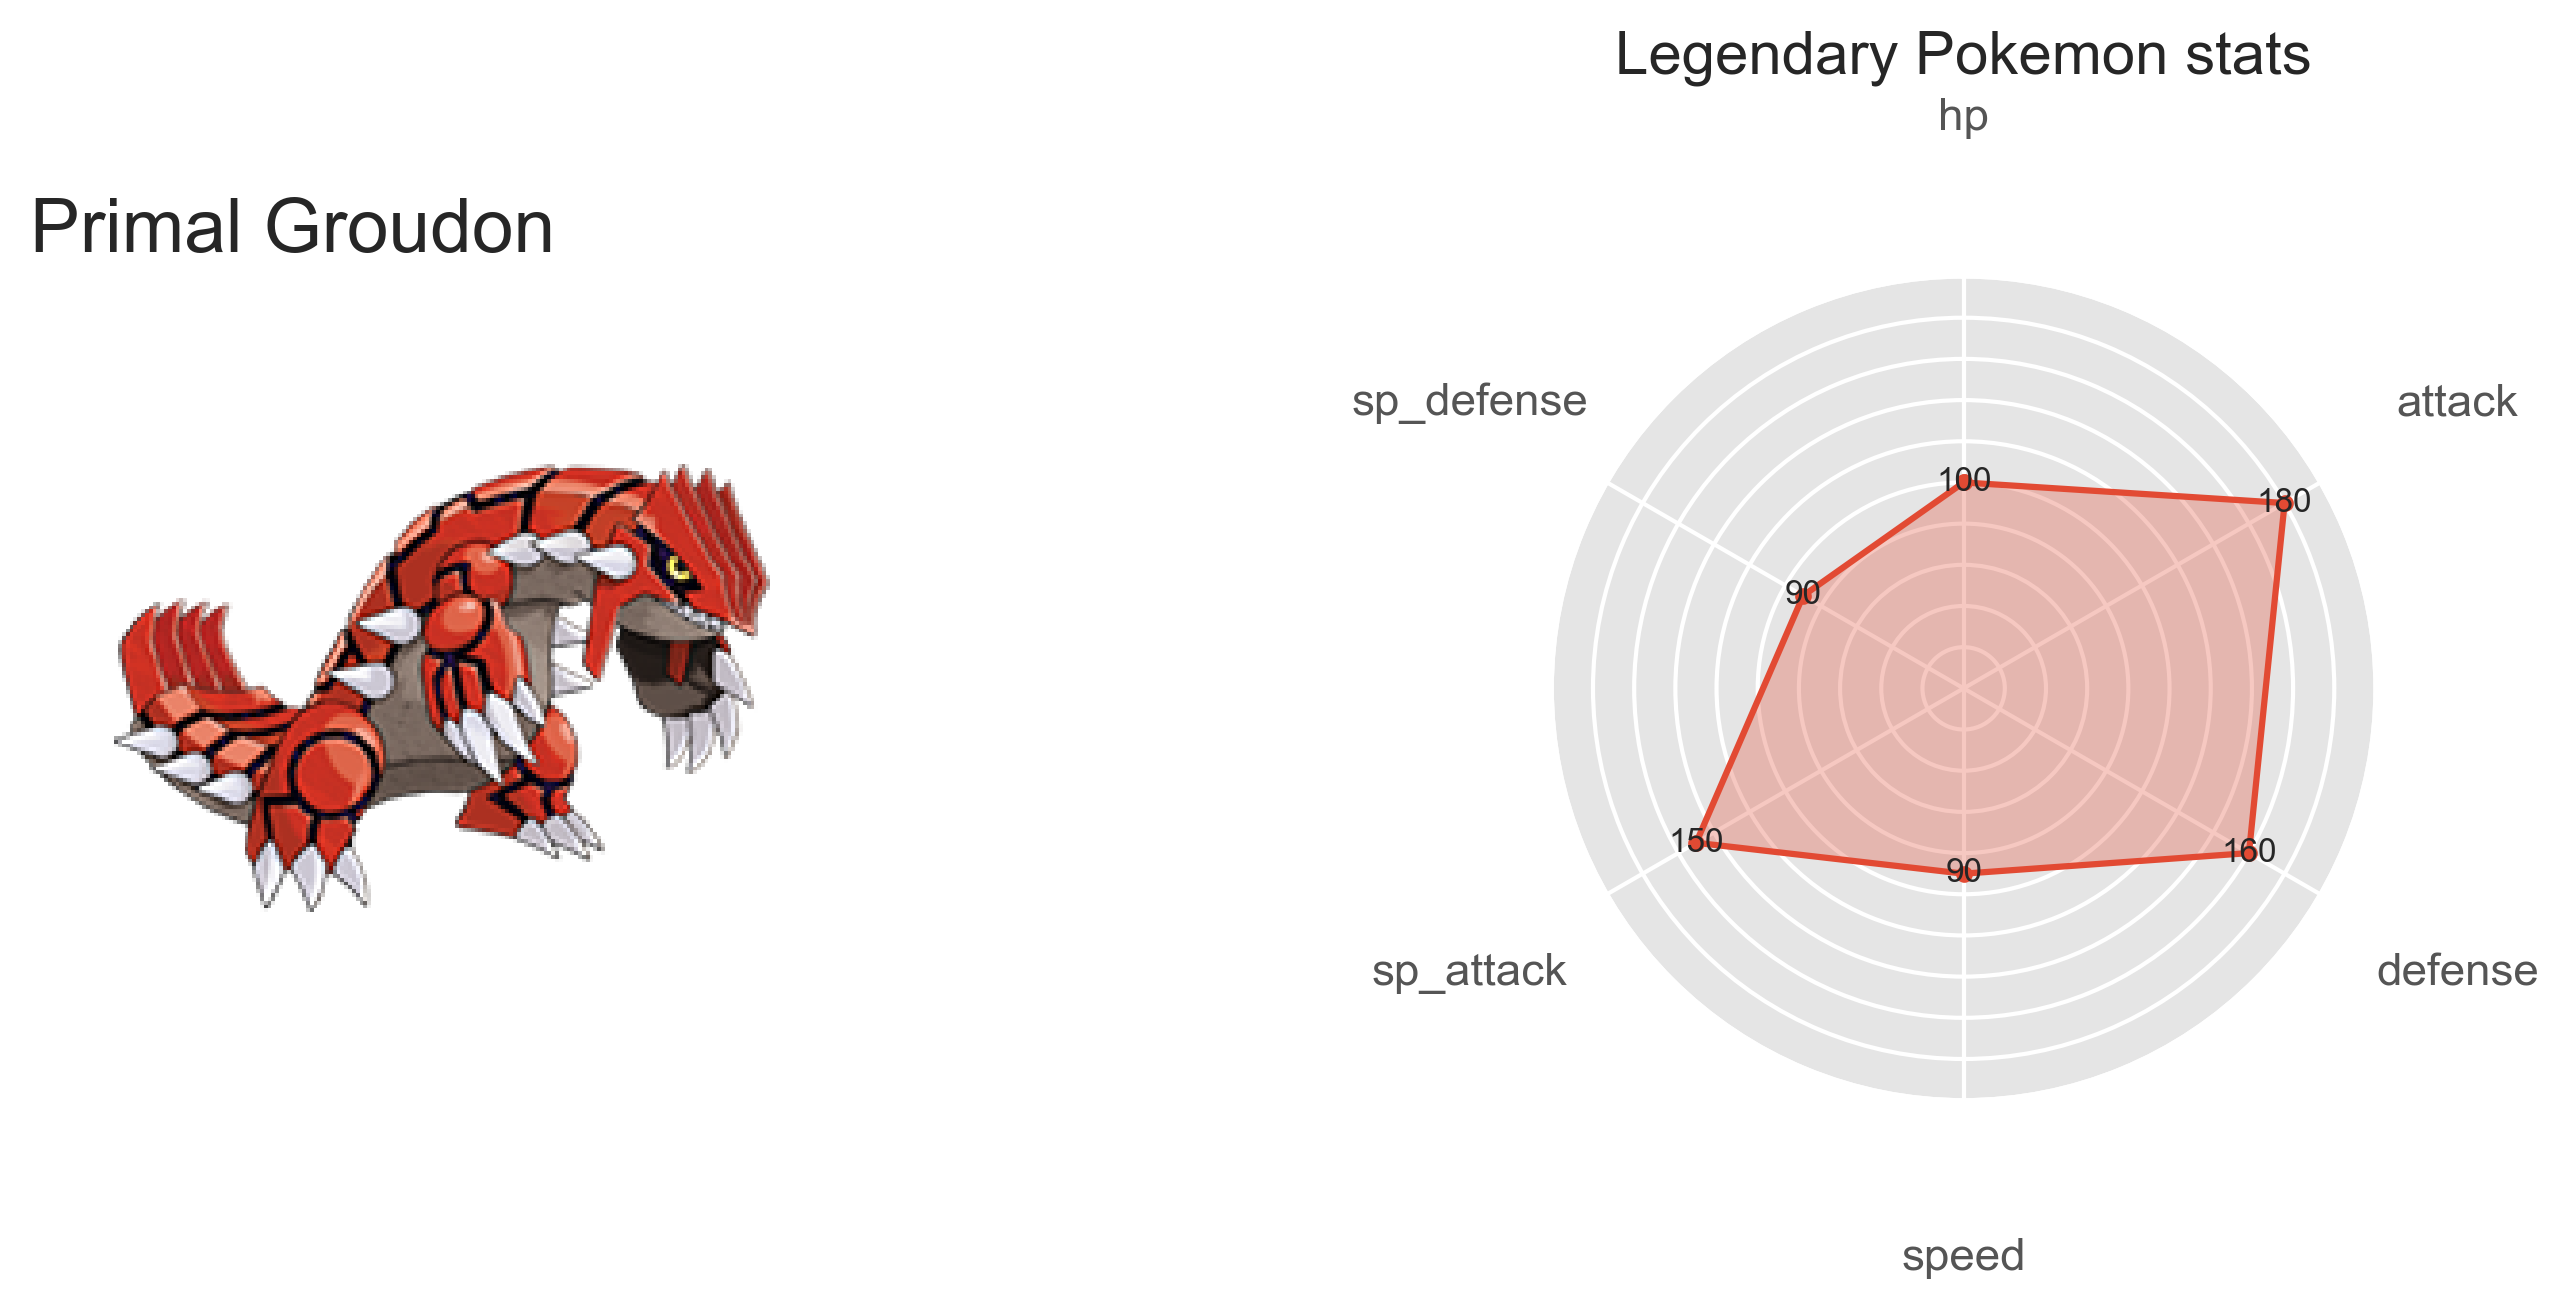

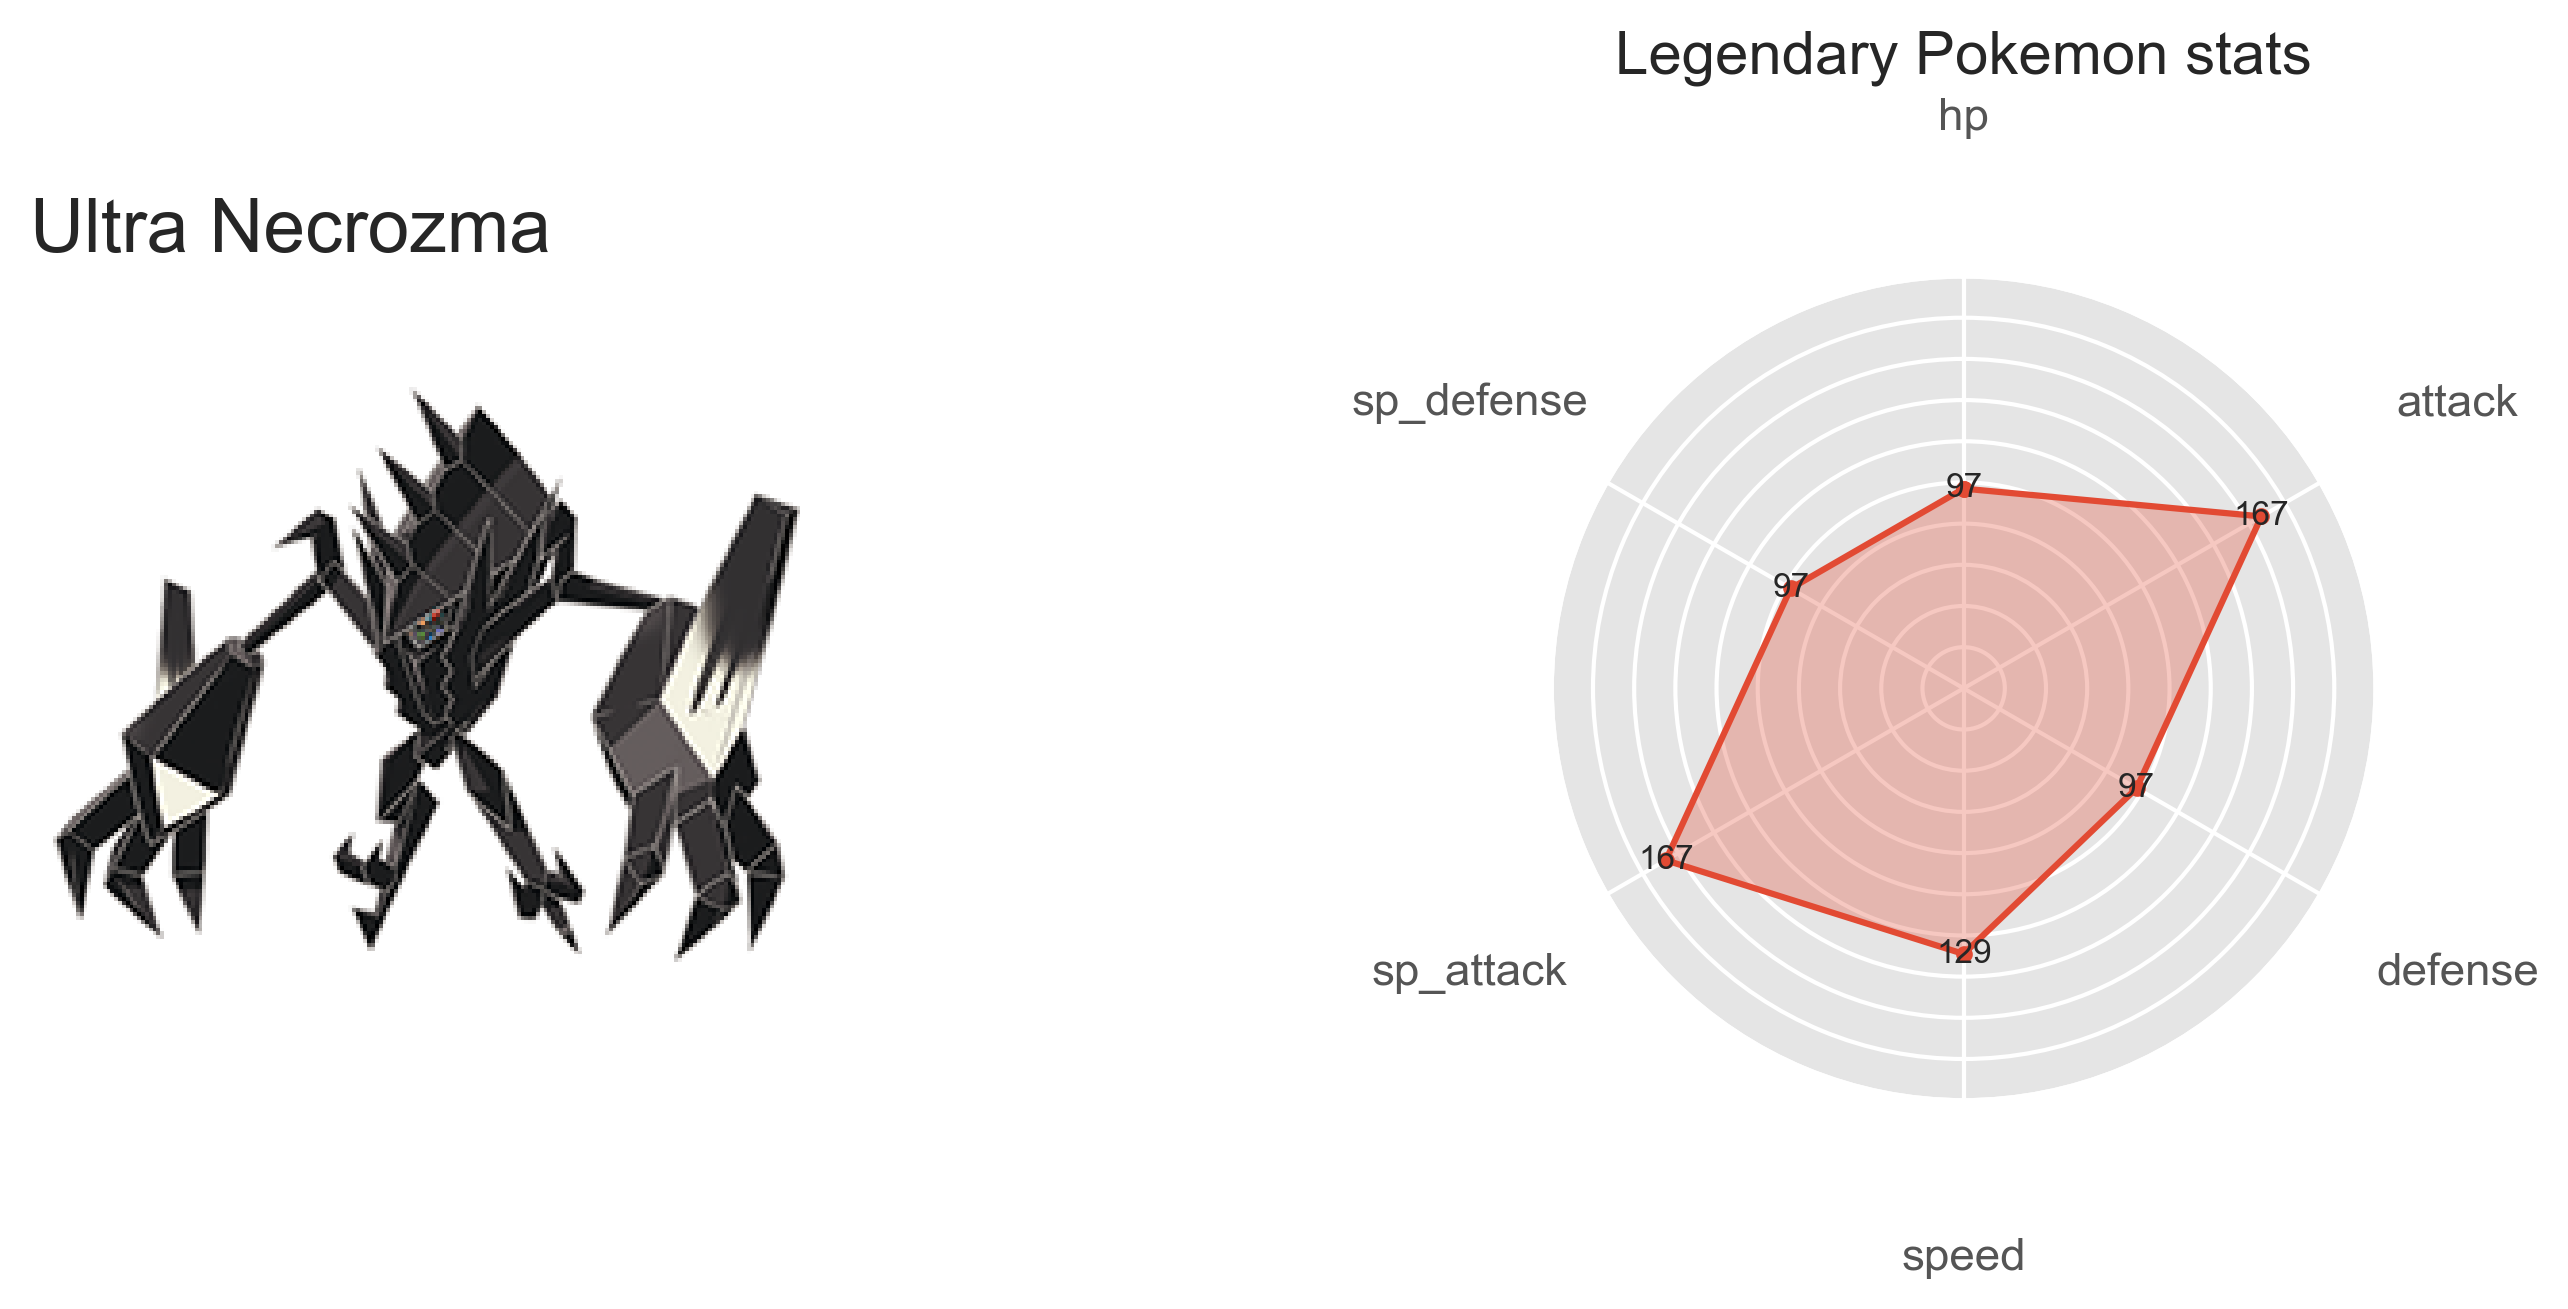

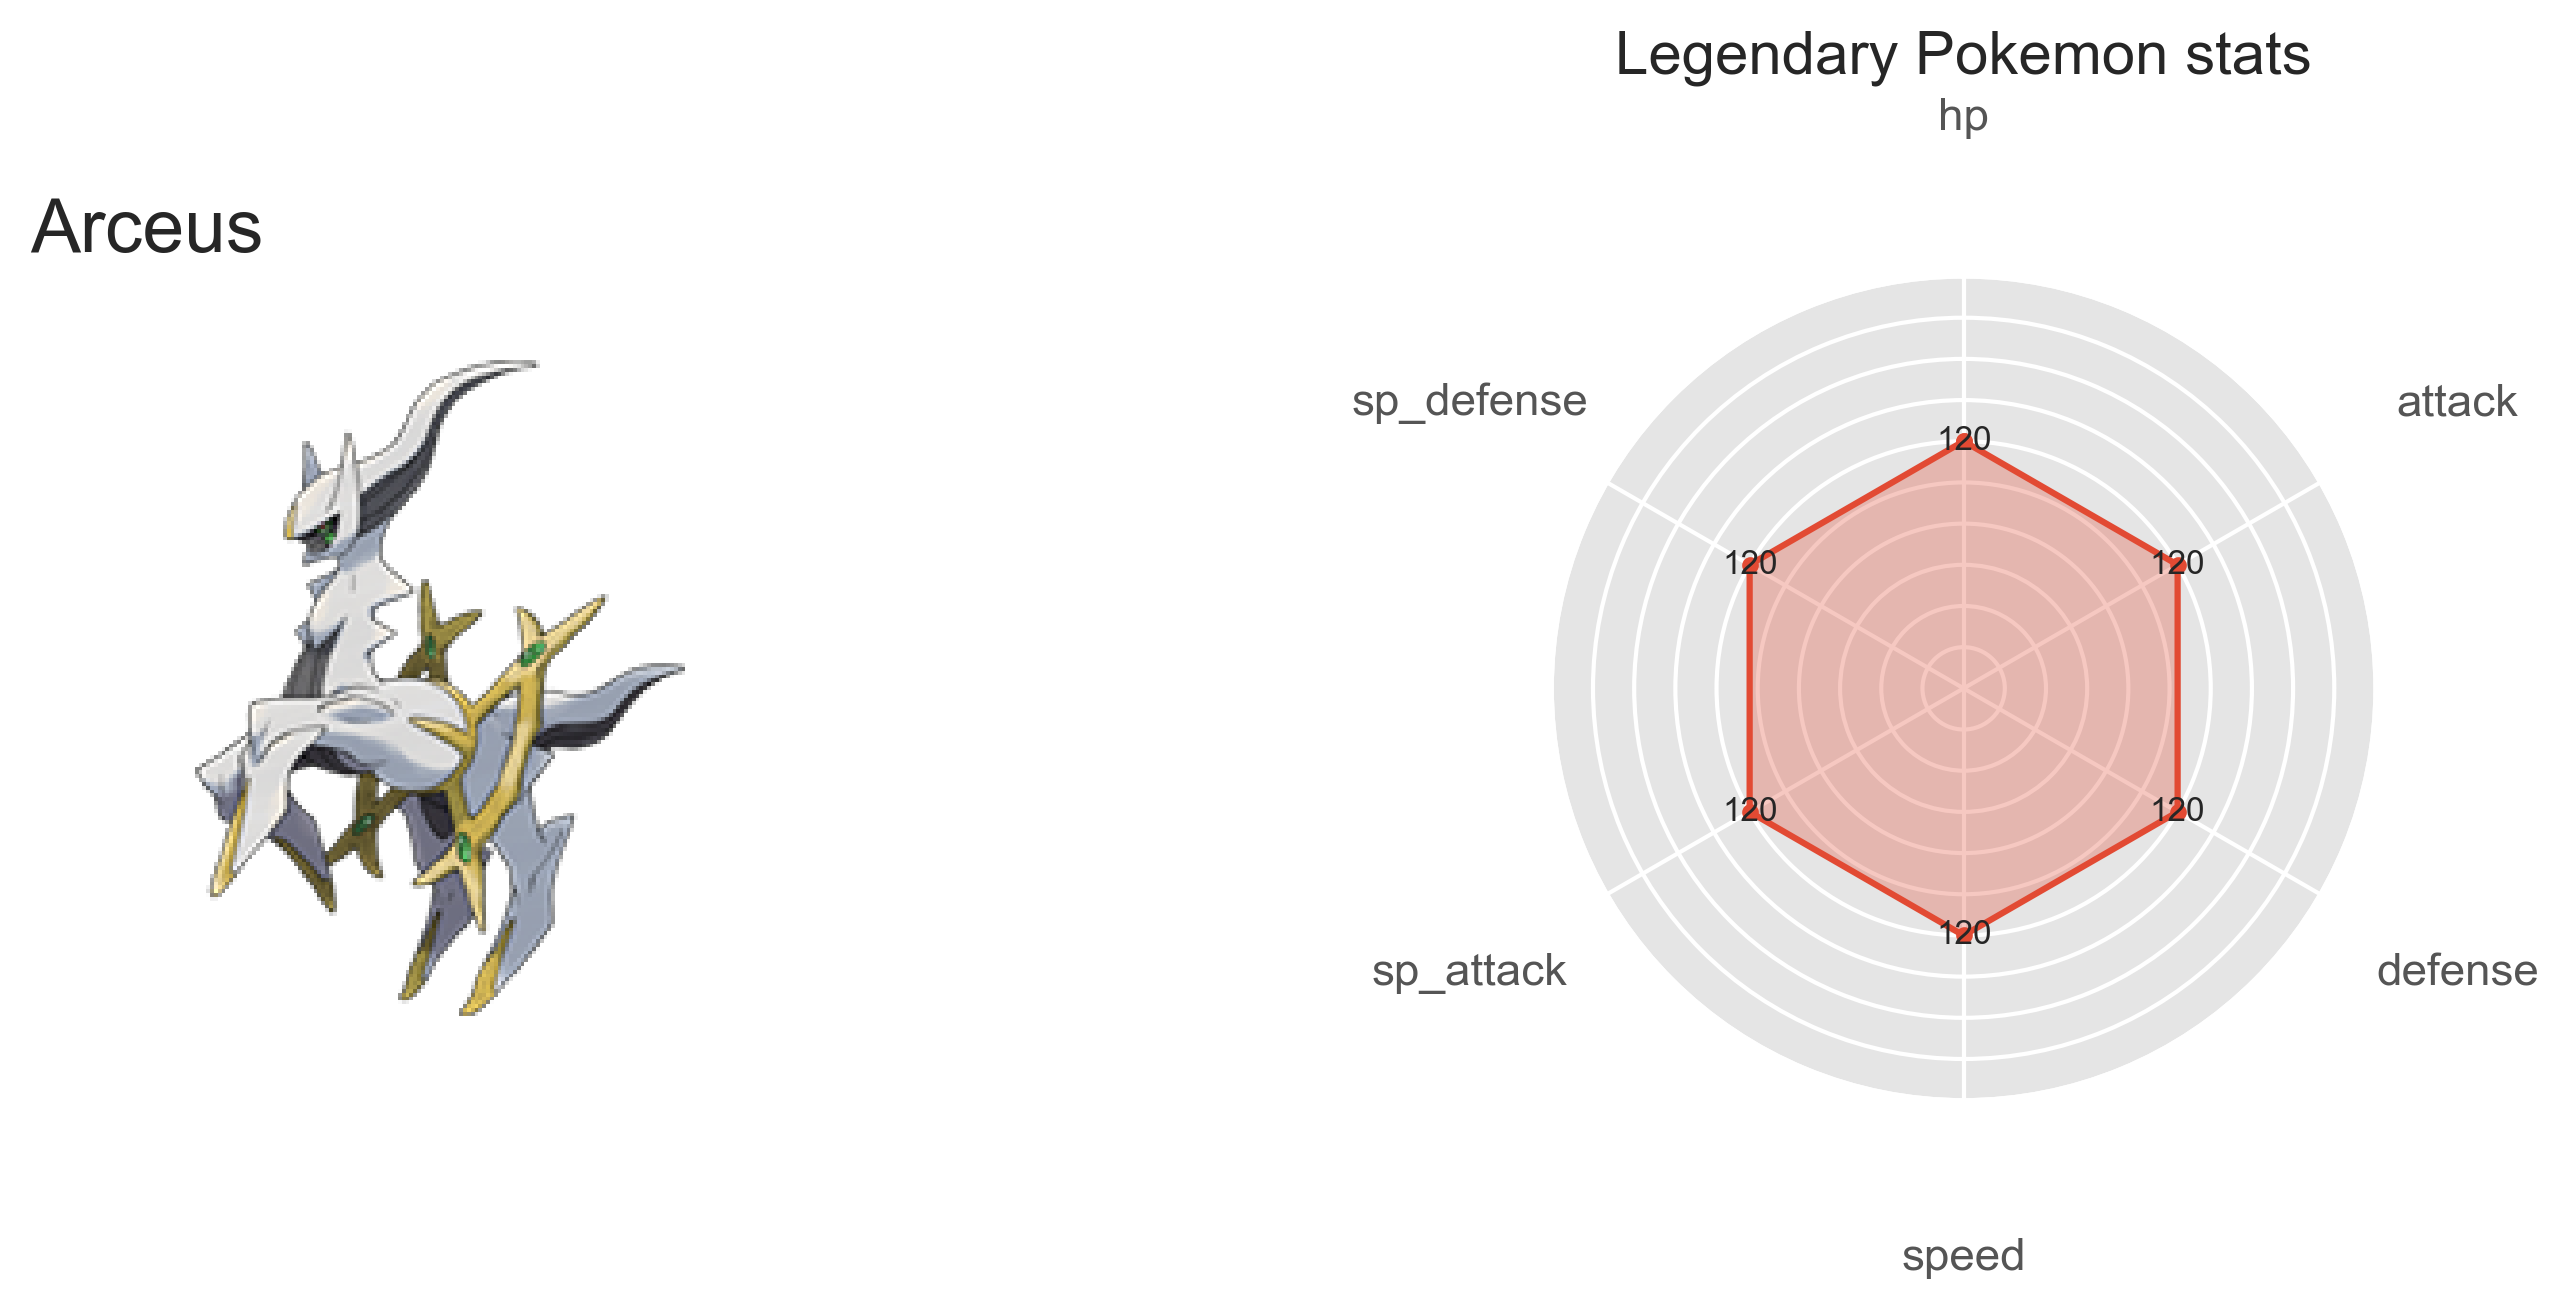

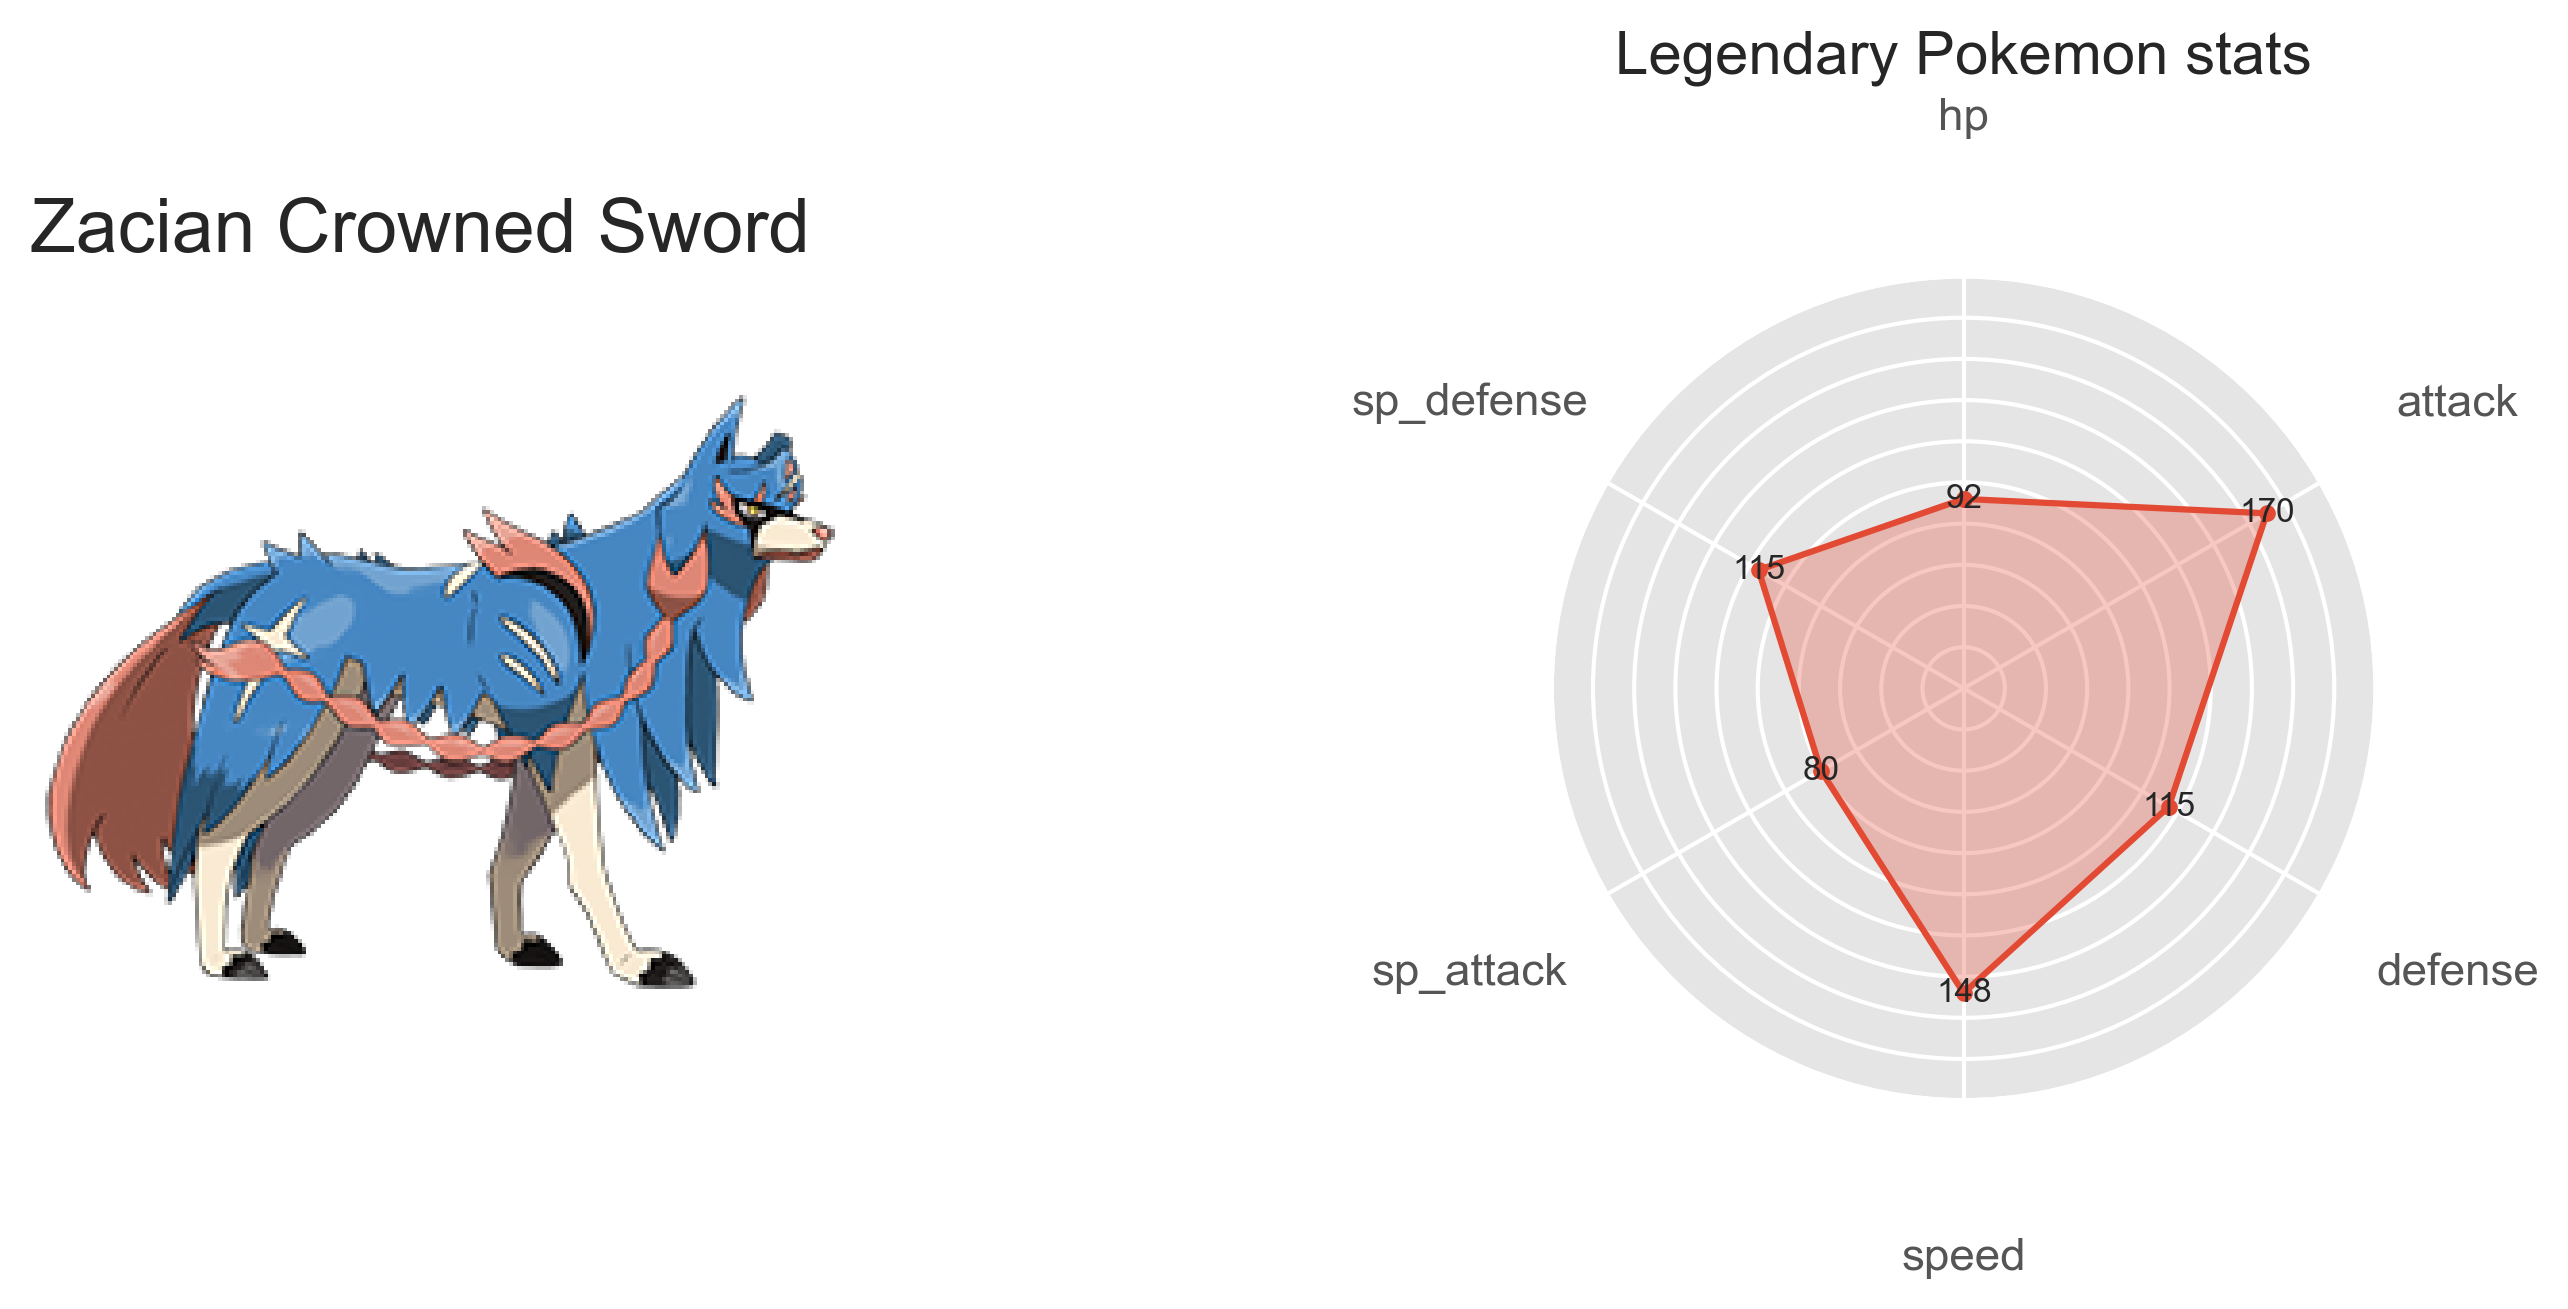

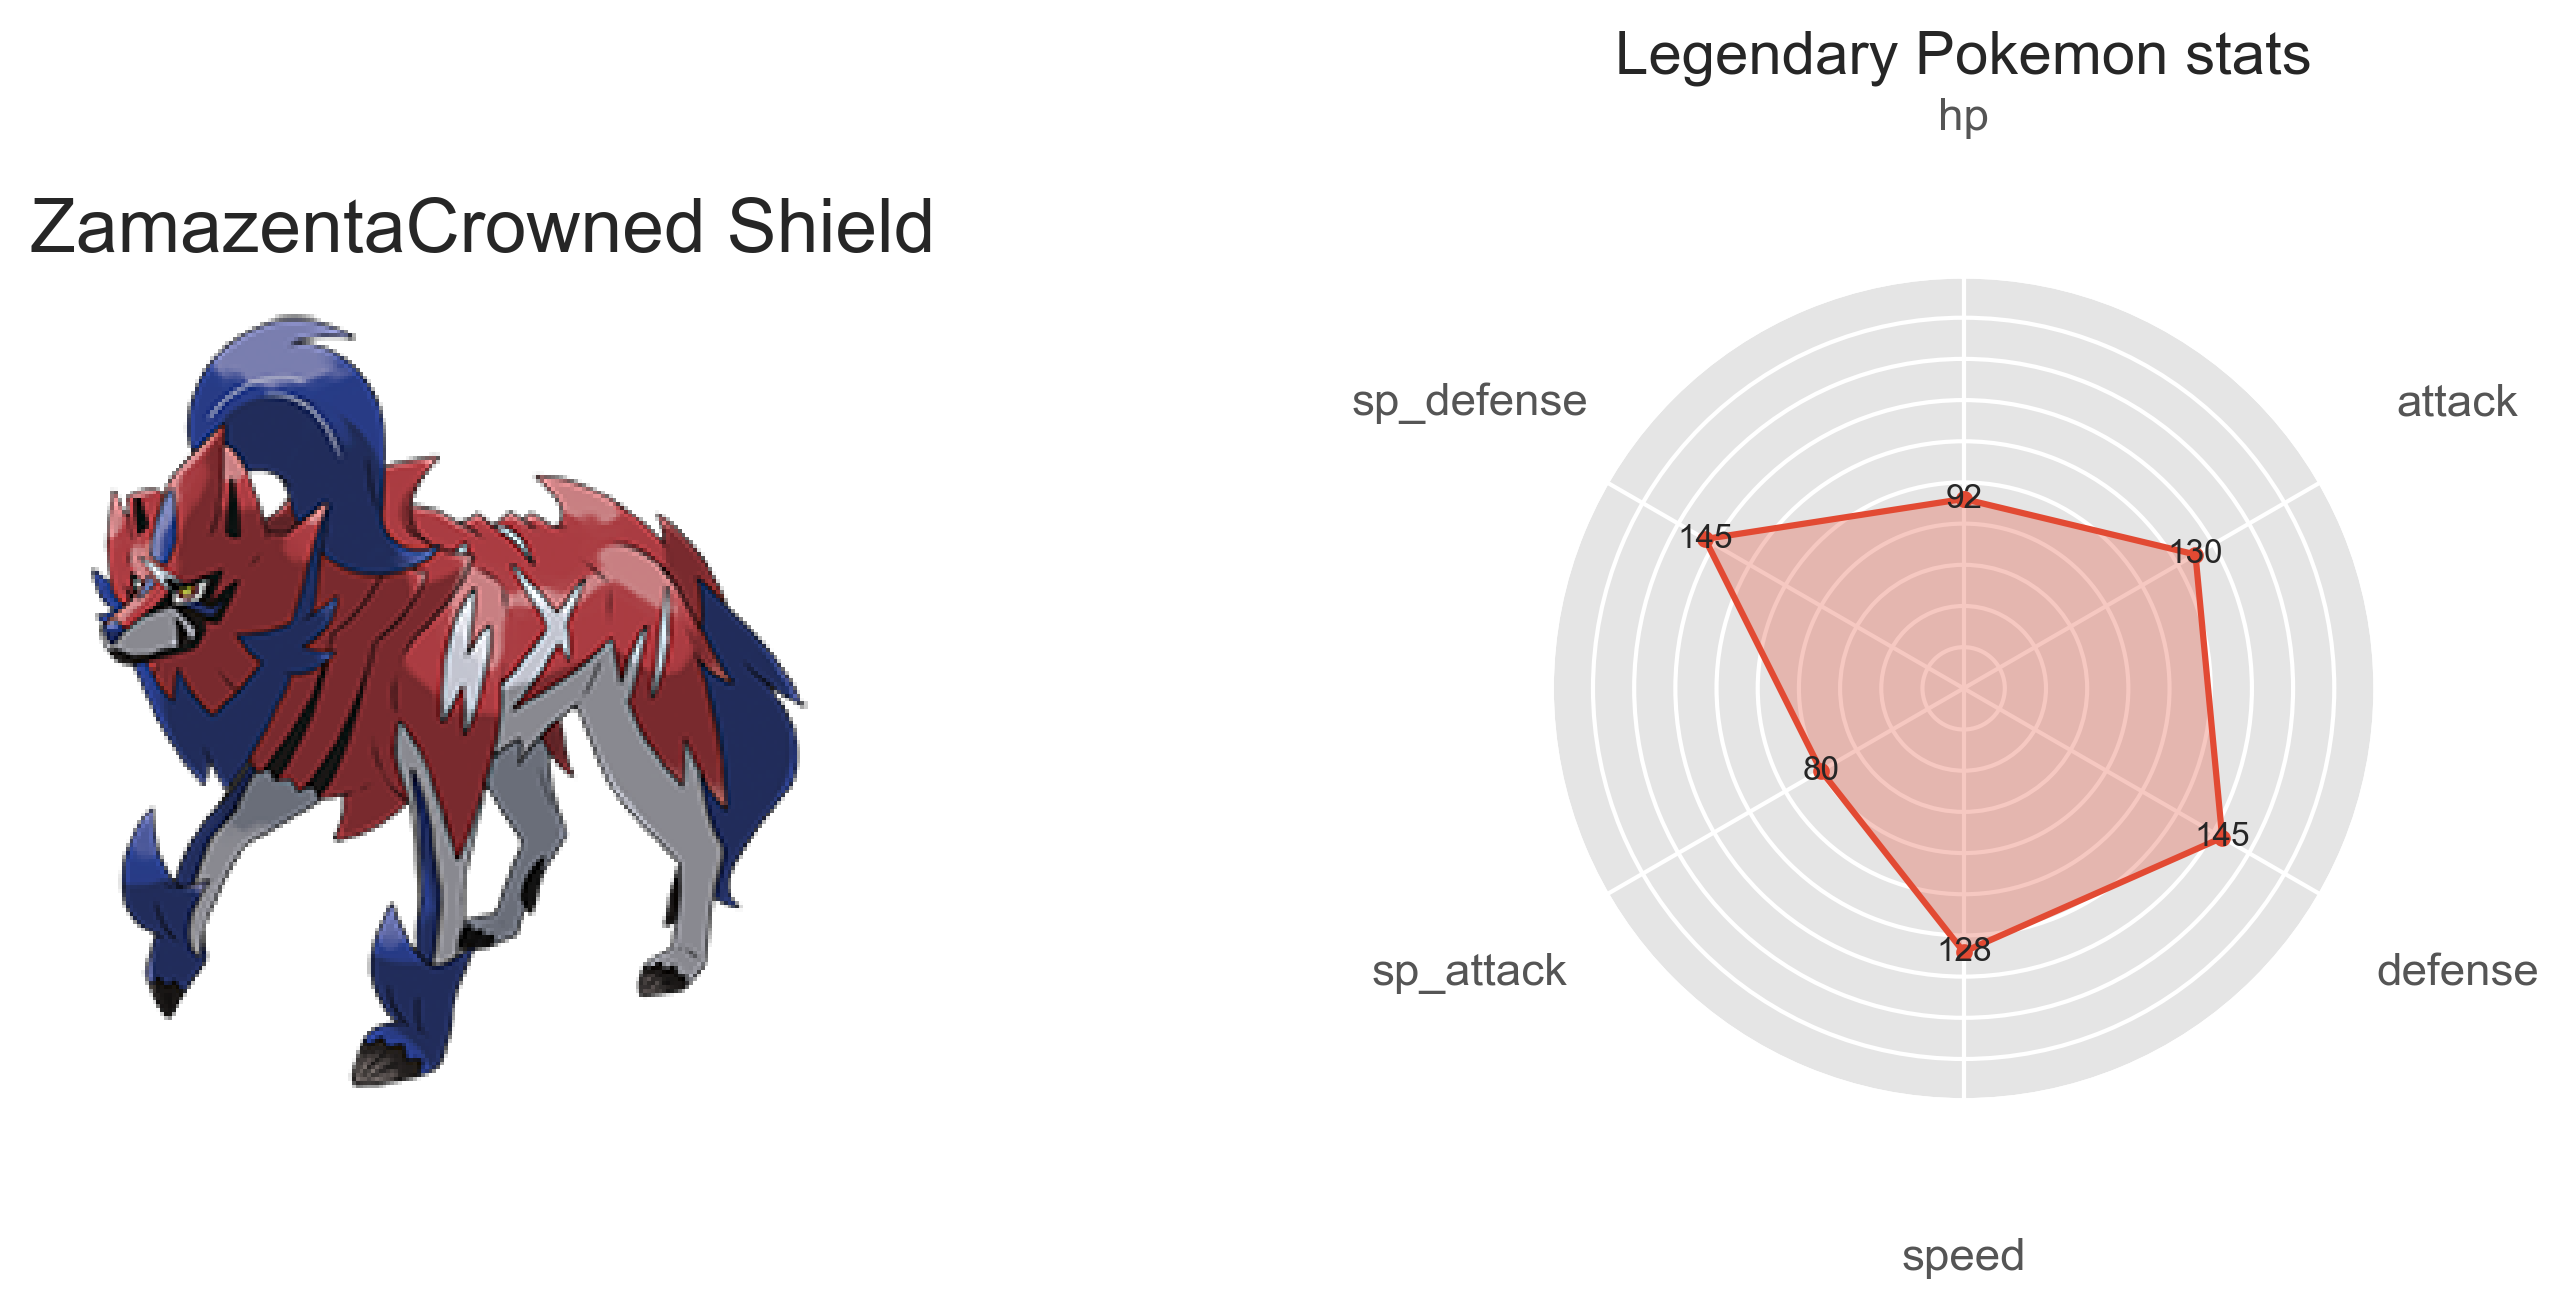

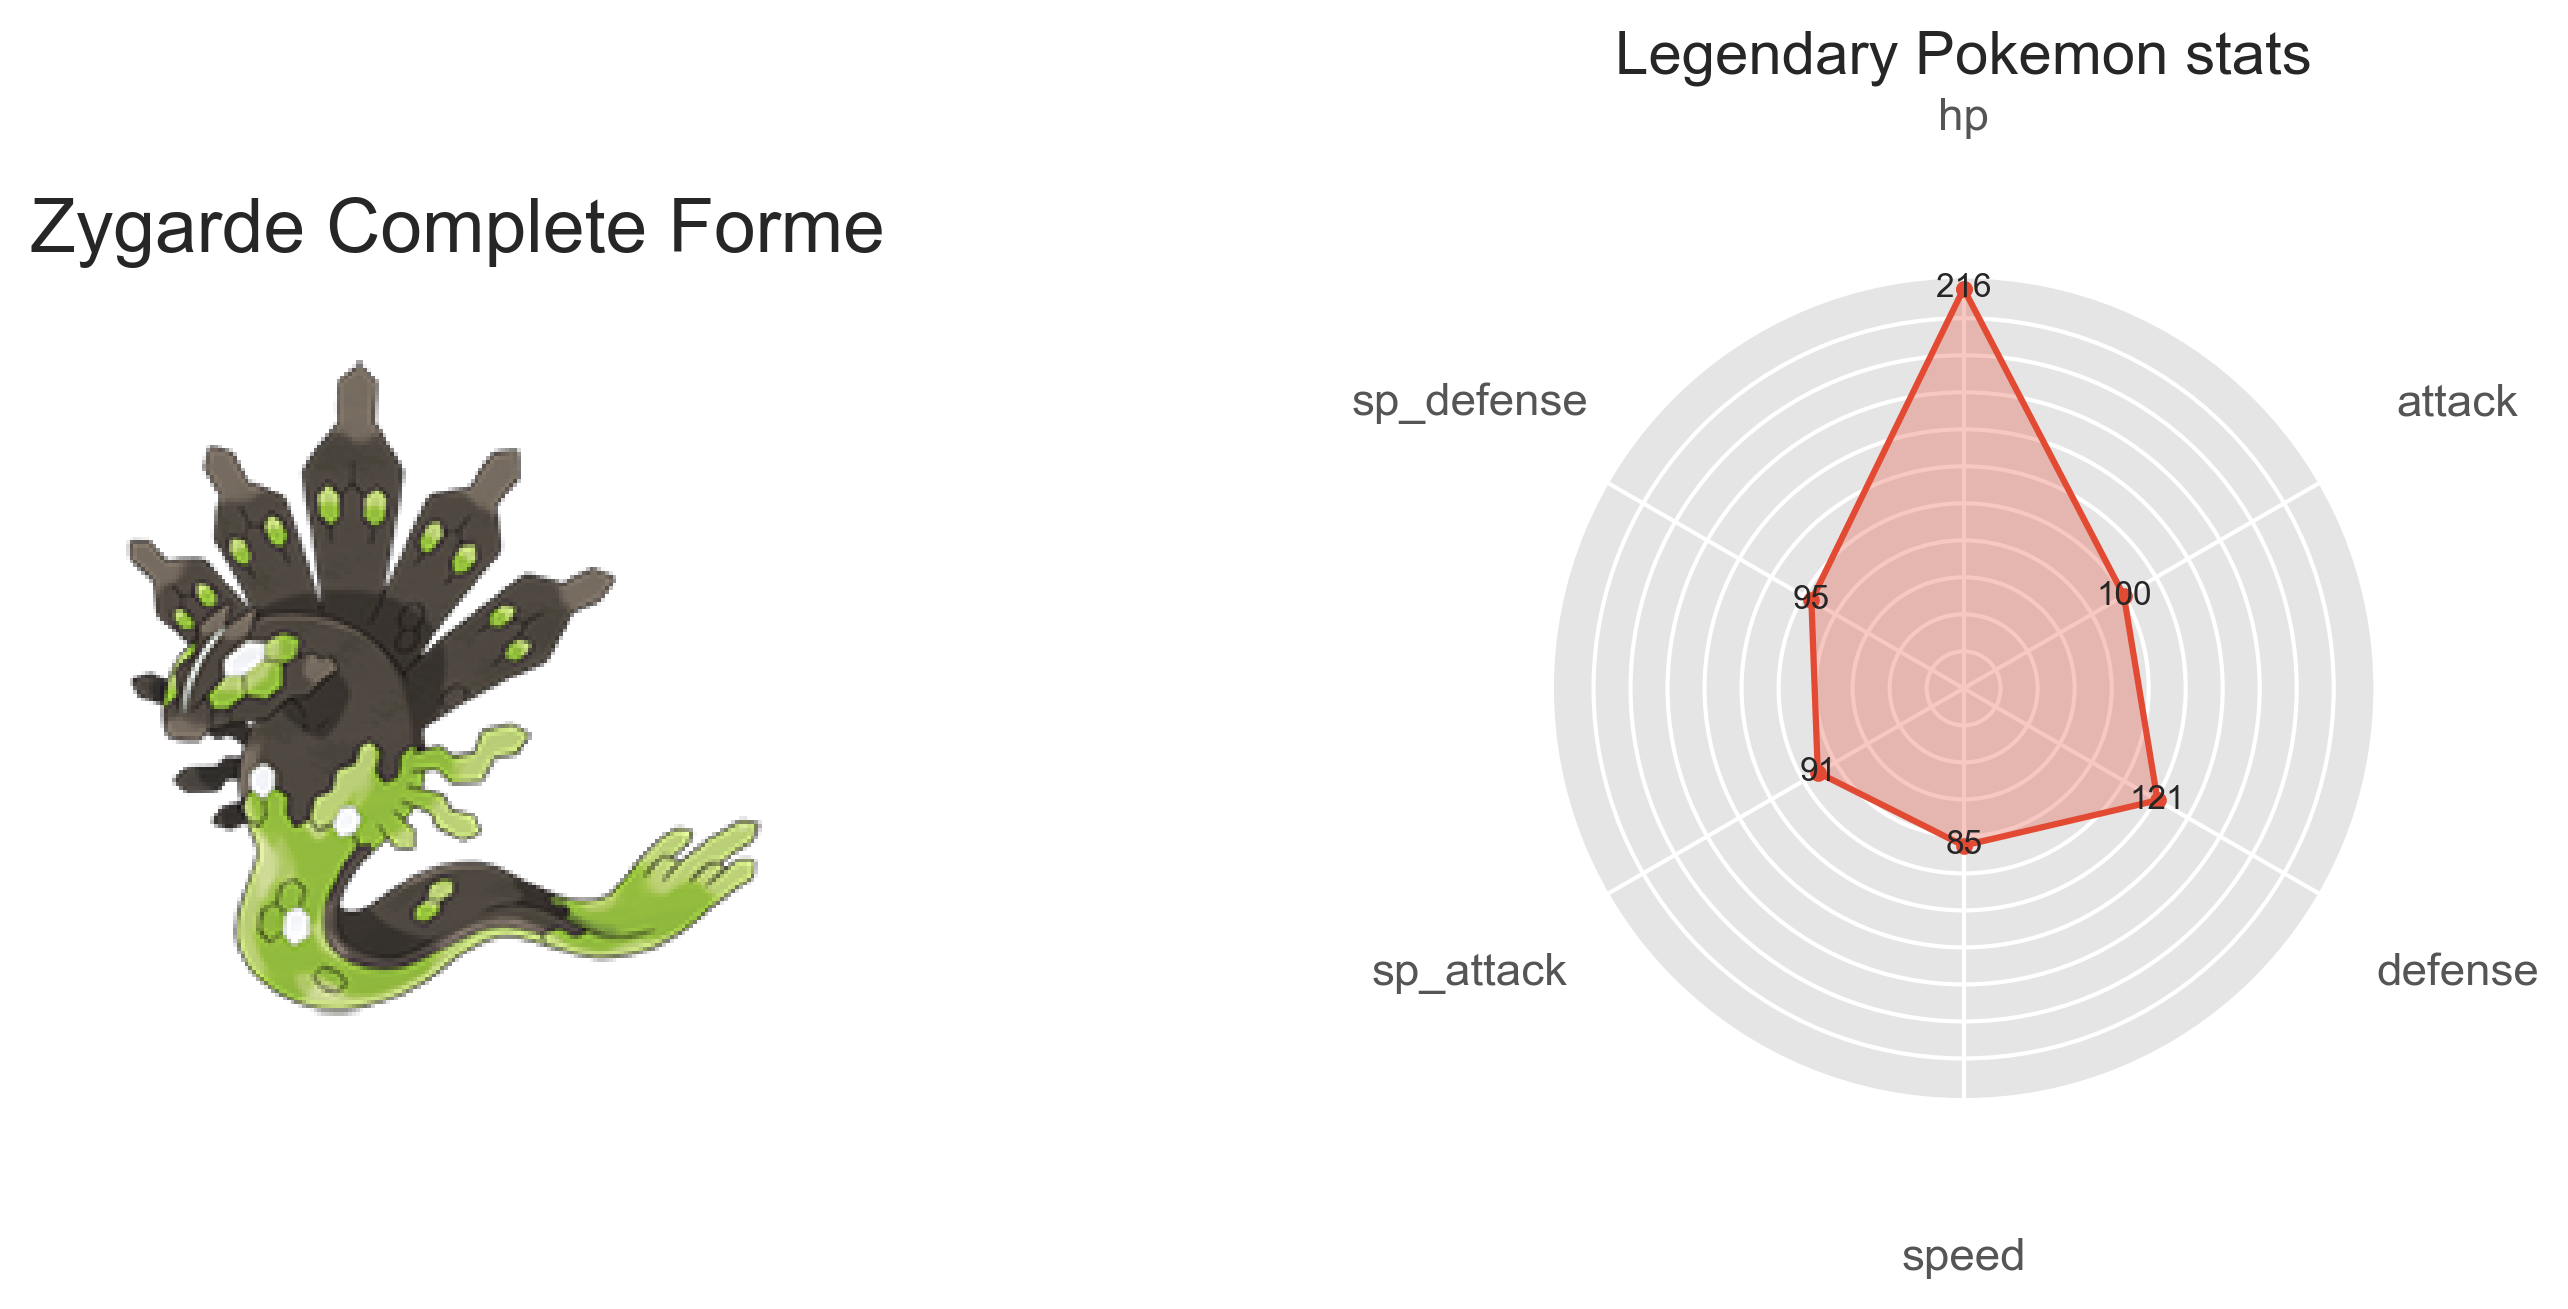

In [155]:
#set "dataframe" from function below to top_stats

dataframe = top_stats

top_stats_new = top_stats[['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]]


#set dataframe new to top_stats_new
dataframe_new = top_stats_new

#for each rows of top_stats, it will plot the corresponding image and radarplot
for idx in range(len(top_stats)):

    top_stats_new = top_stats[['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]]
    fig = plt.figure(figsize=(12,8))
#plot image 221 = left
    ax = plt.subplot(221)
    
    plot_img(idx)
#plot radar = right

    ax = plt.subplot(222, polar="True")
    plt.title('Legendary Pokemon stats')
    plot_radar(idx)

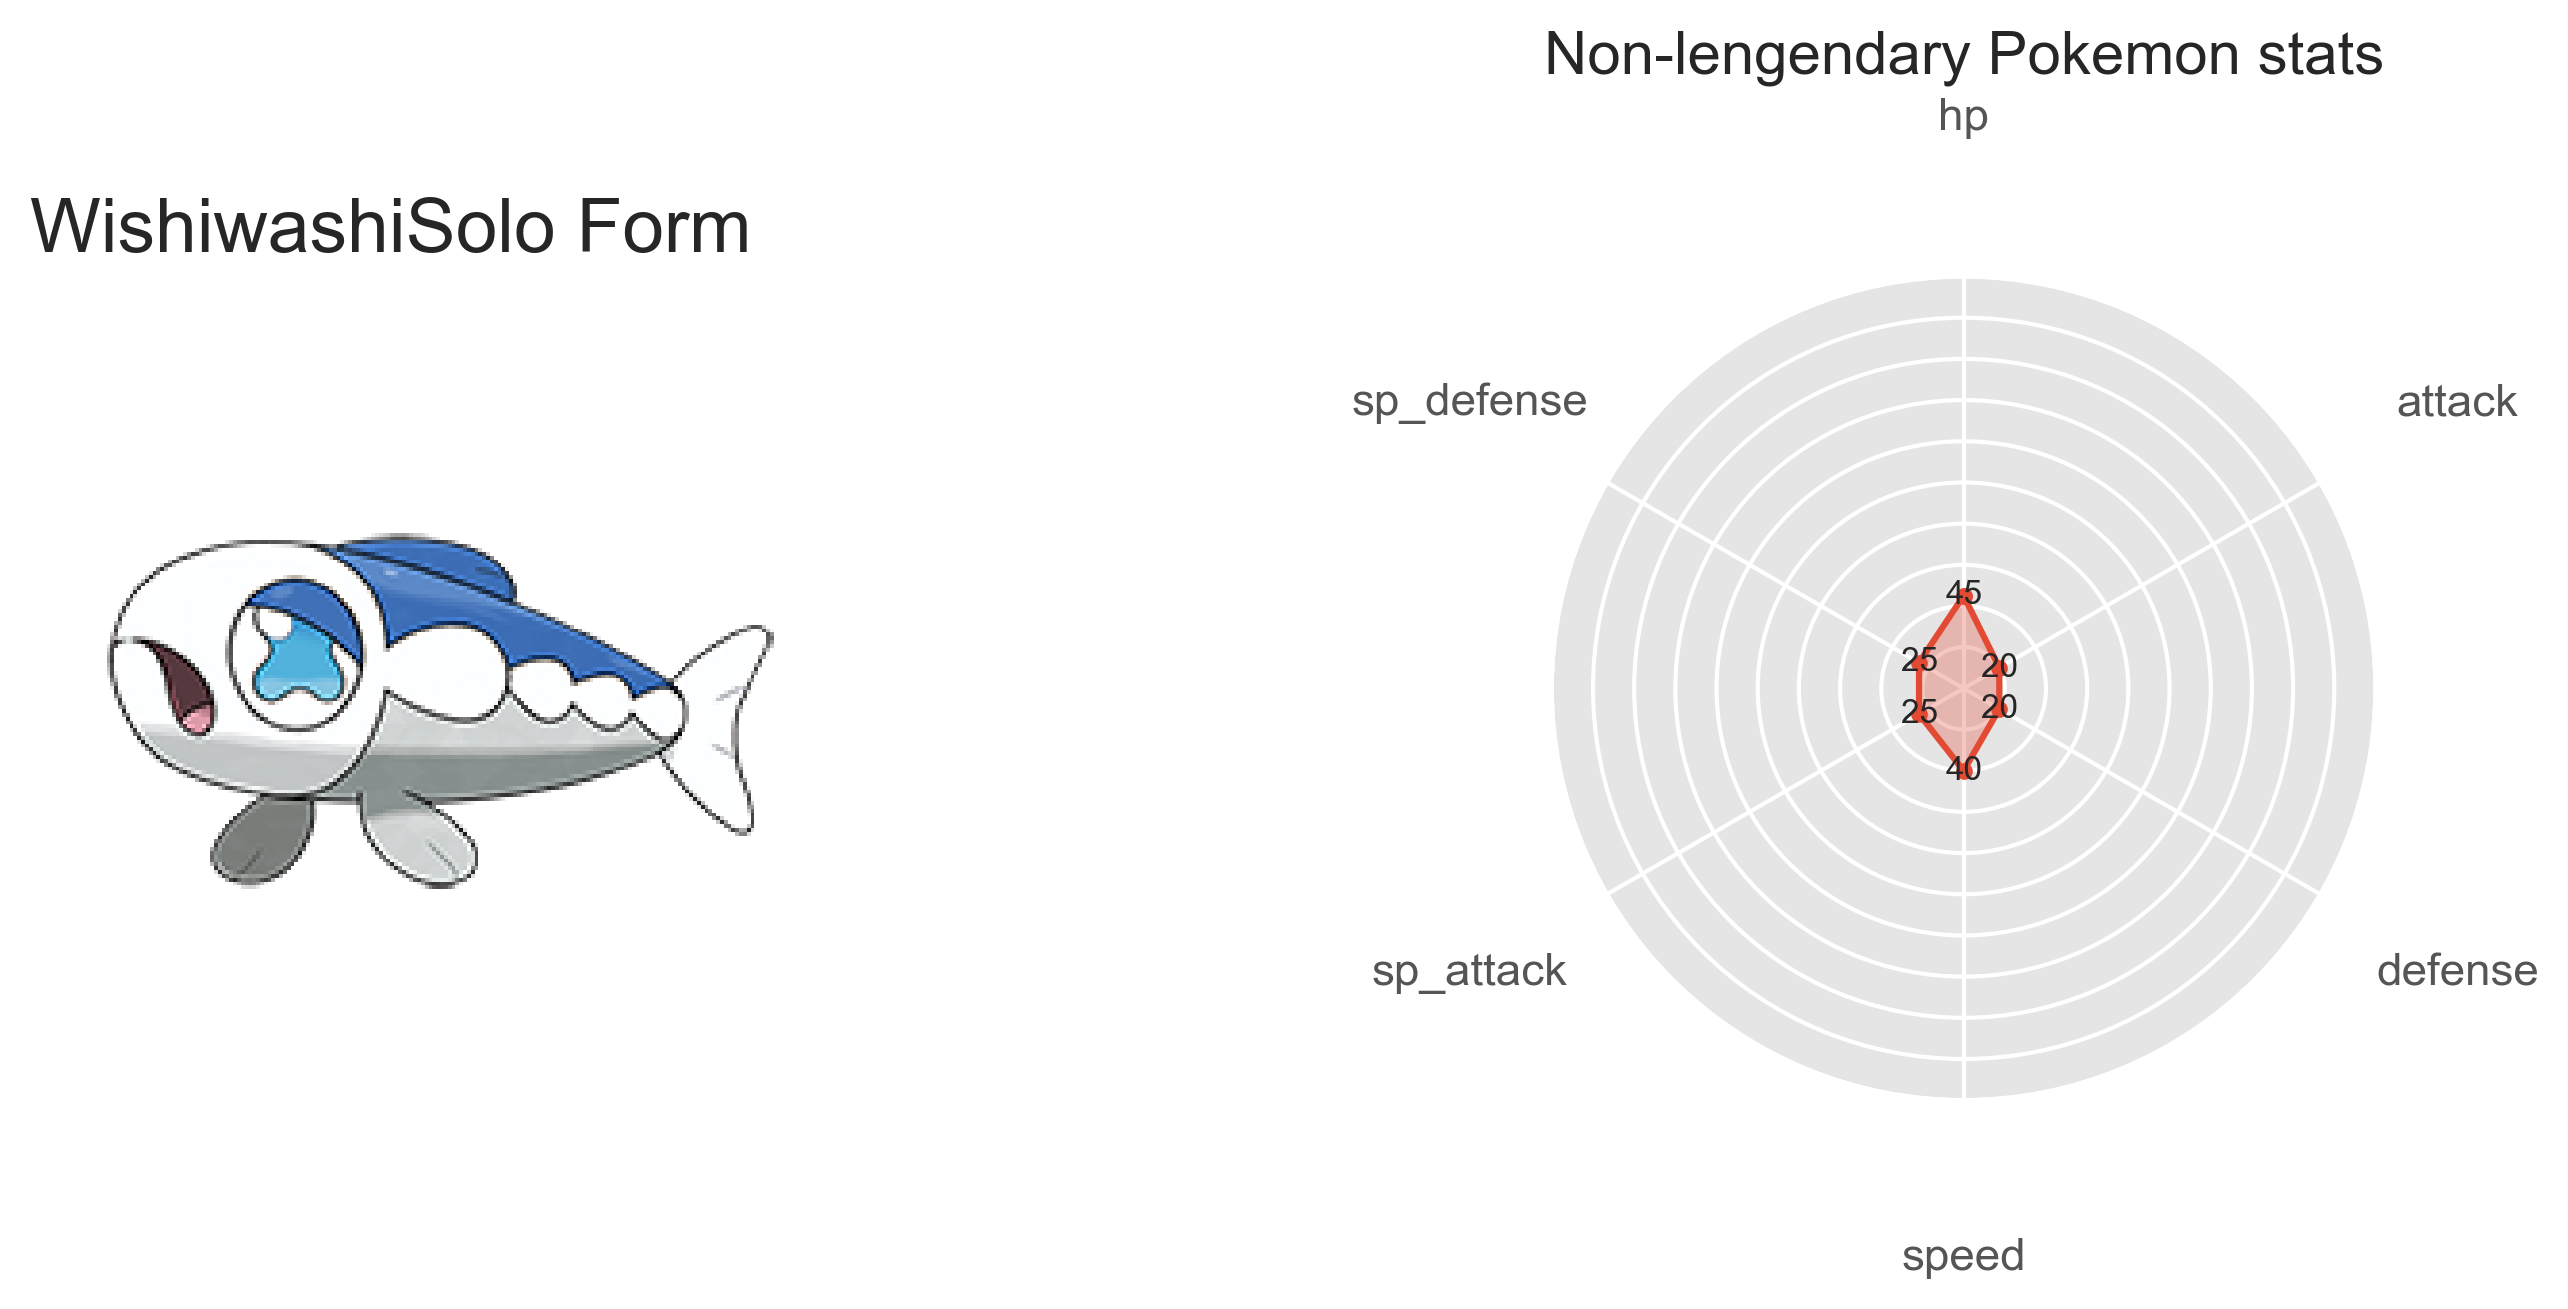

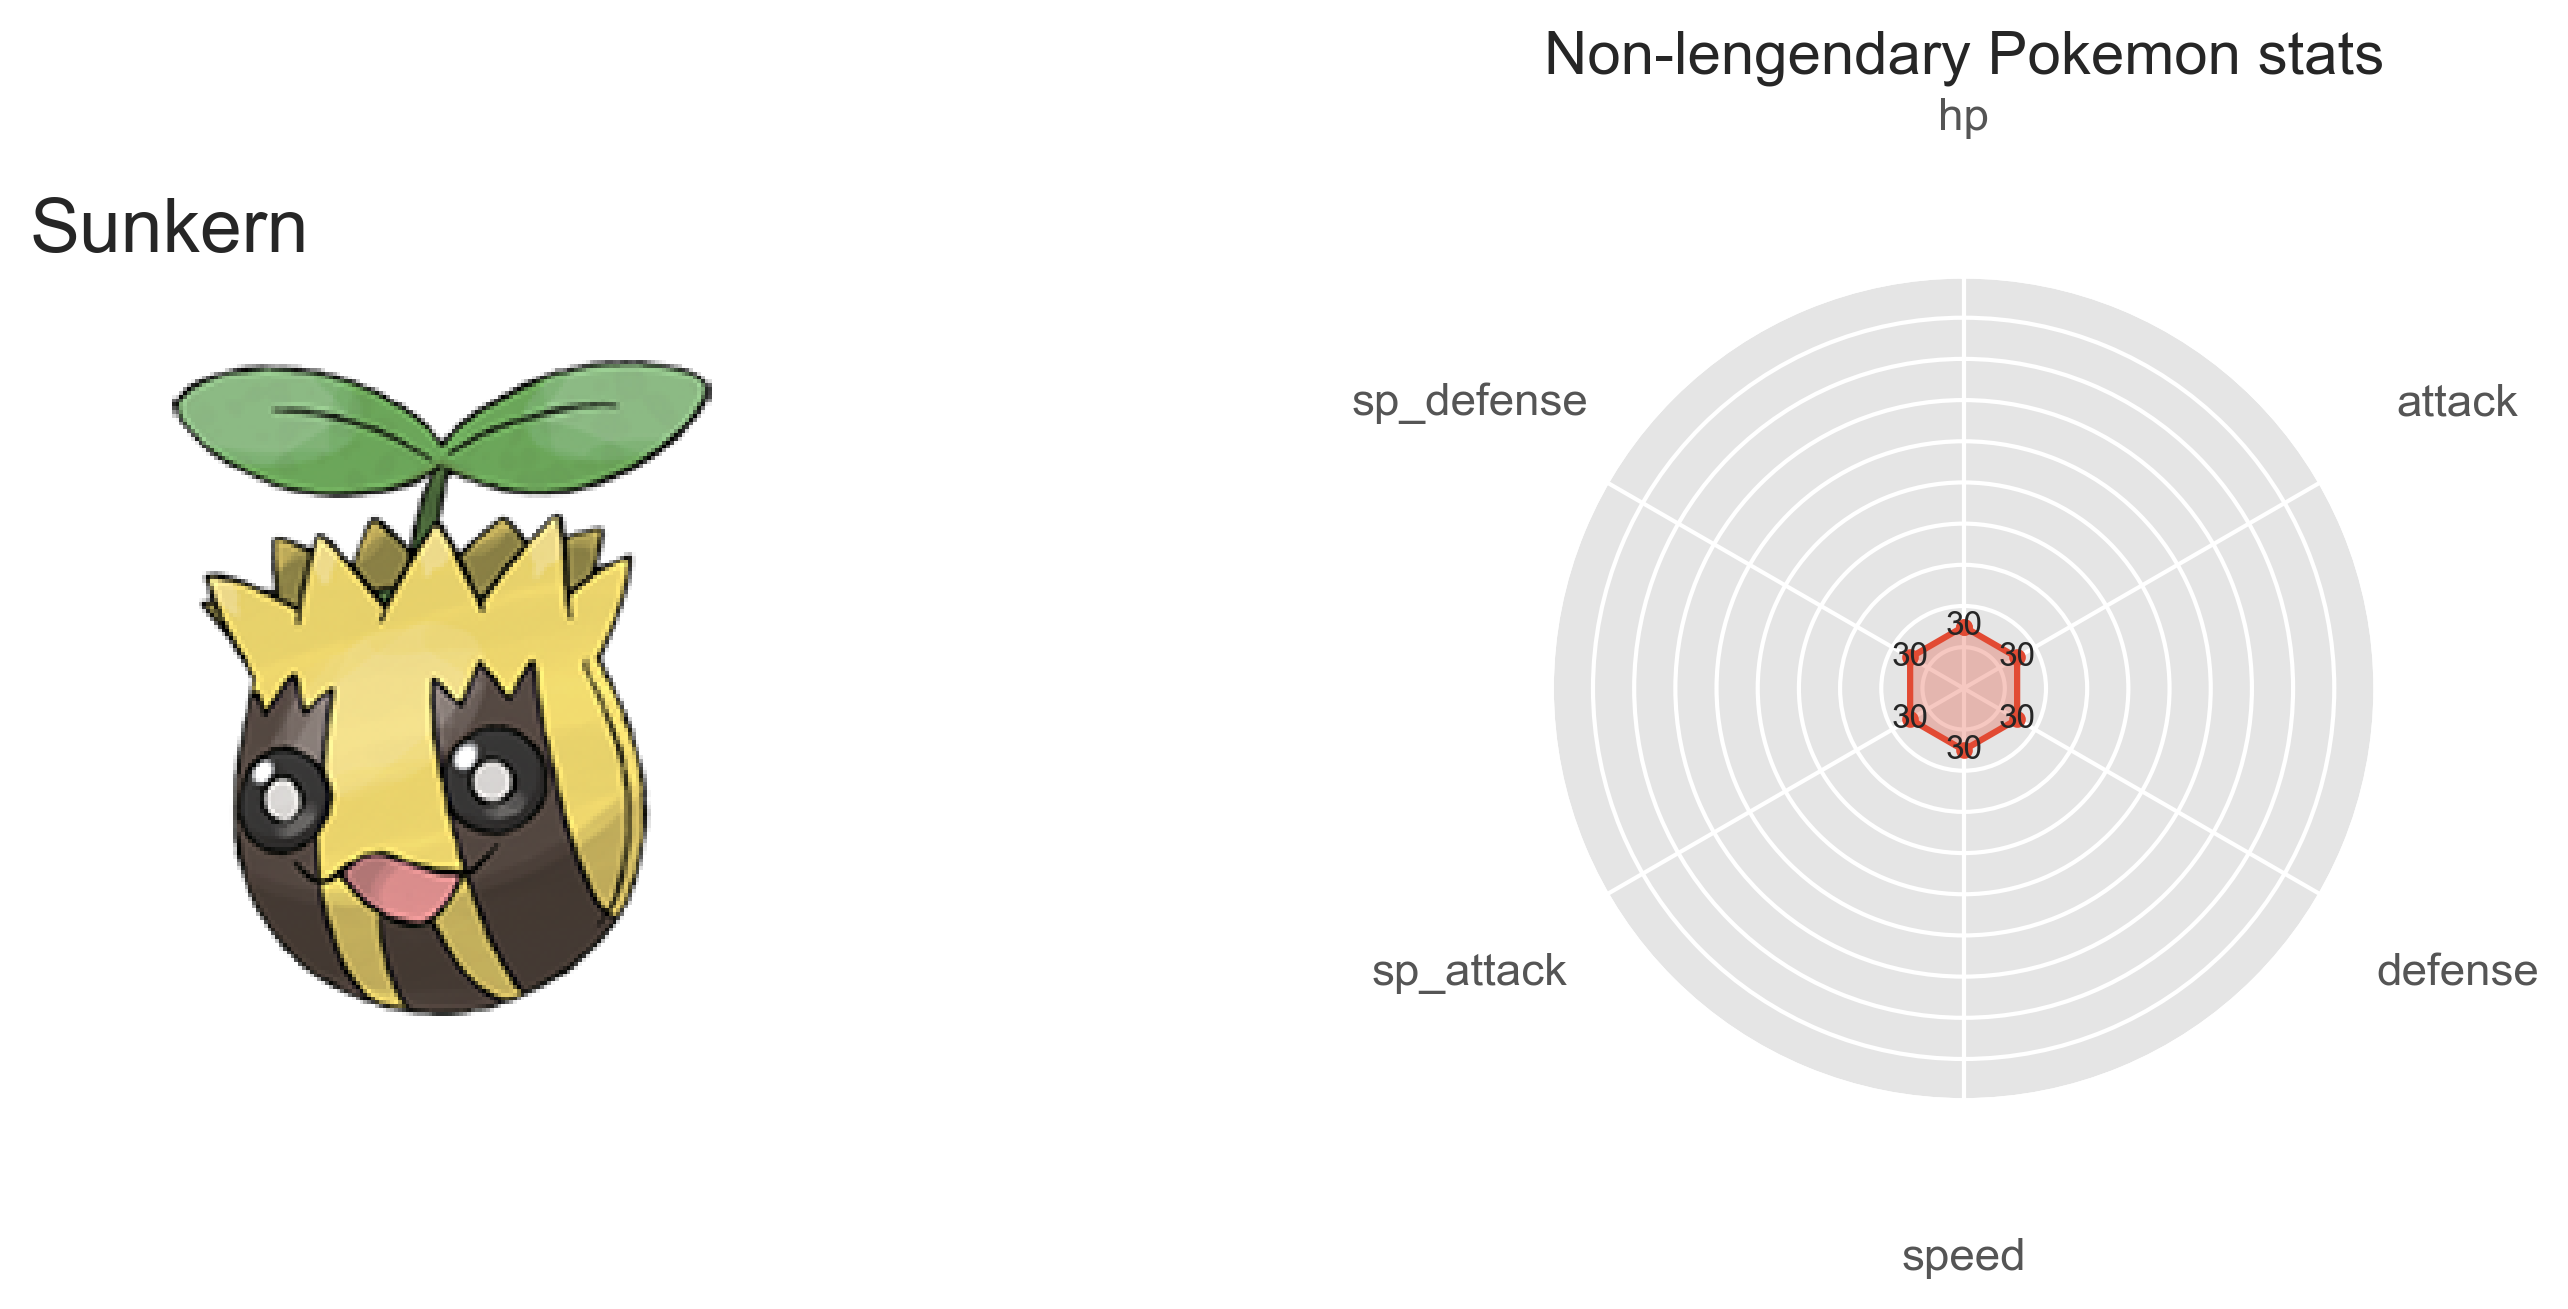

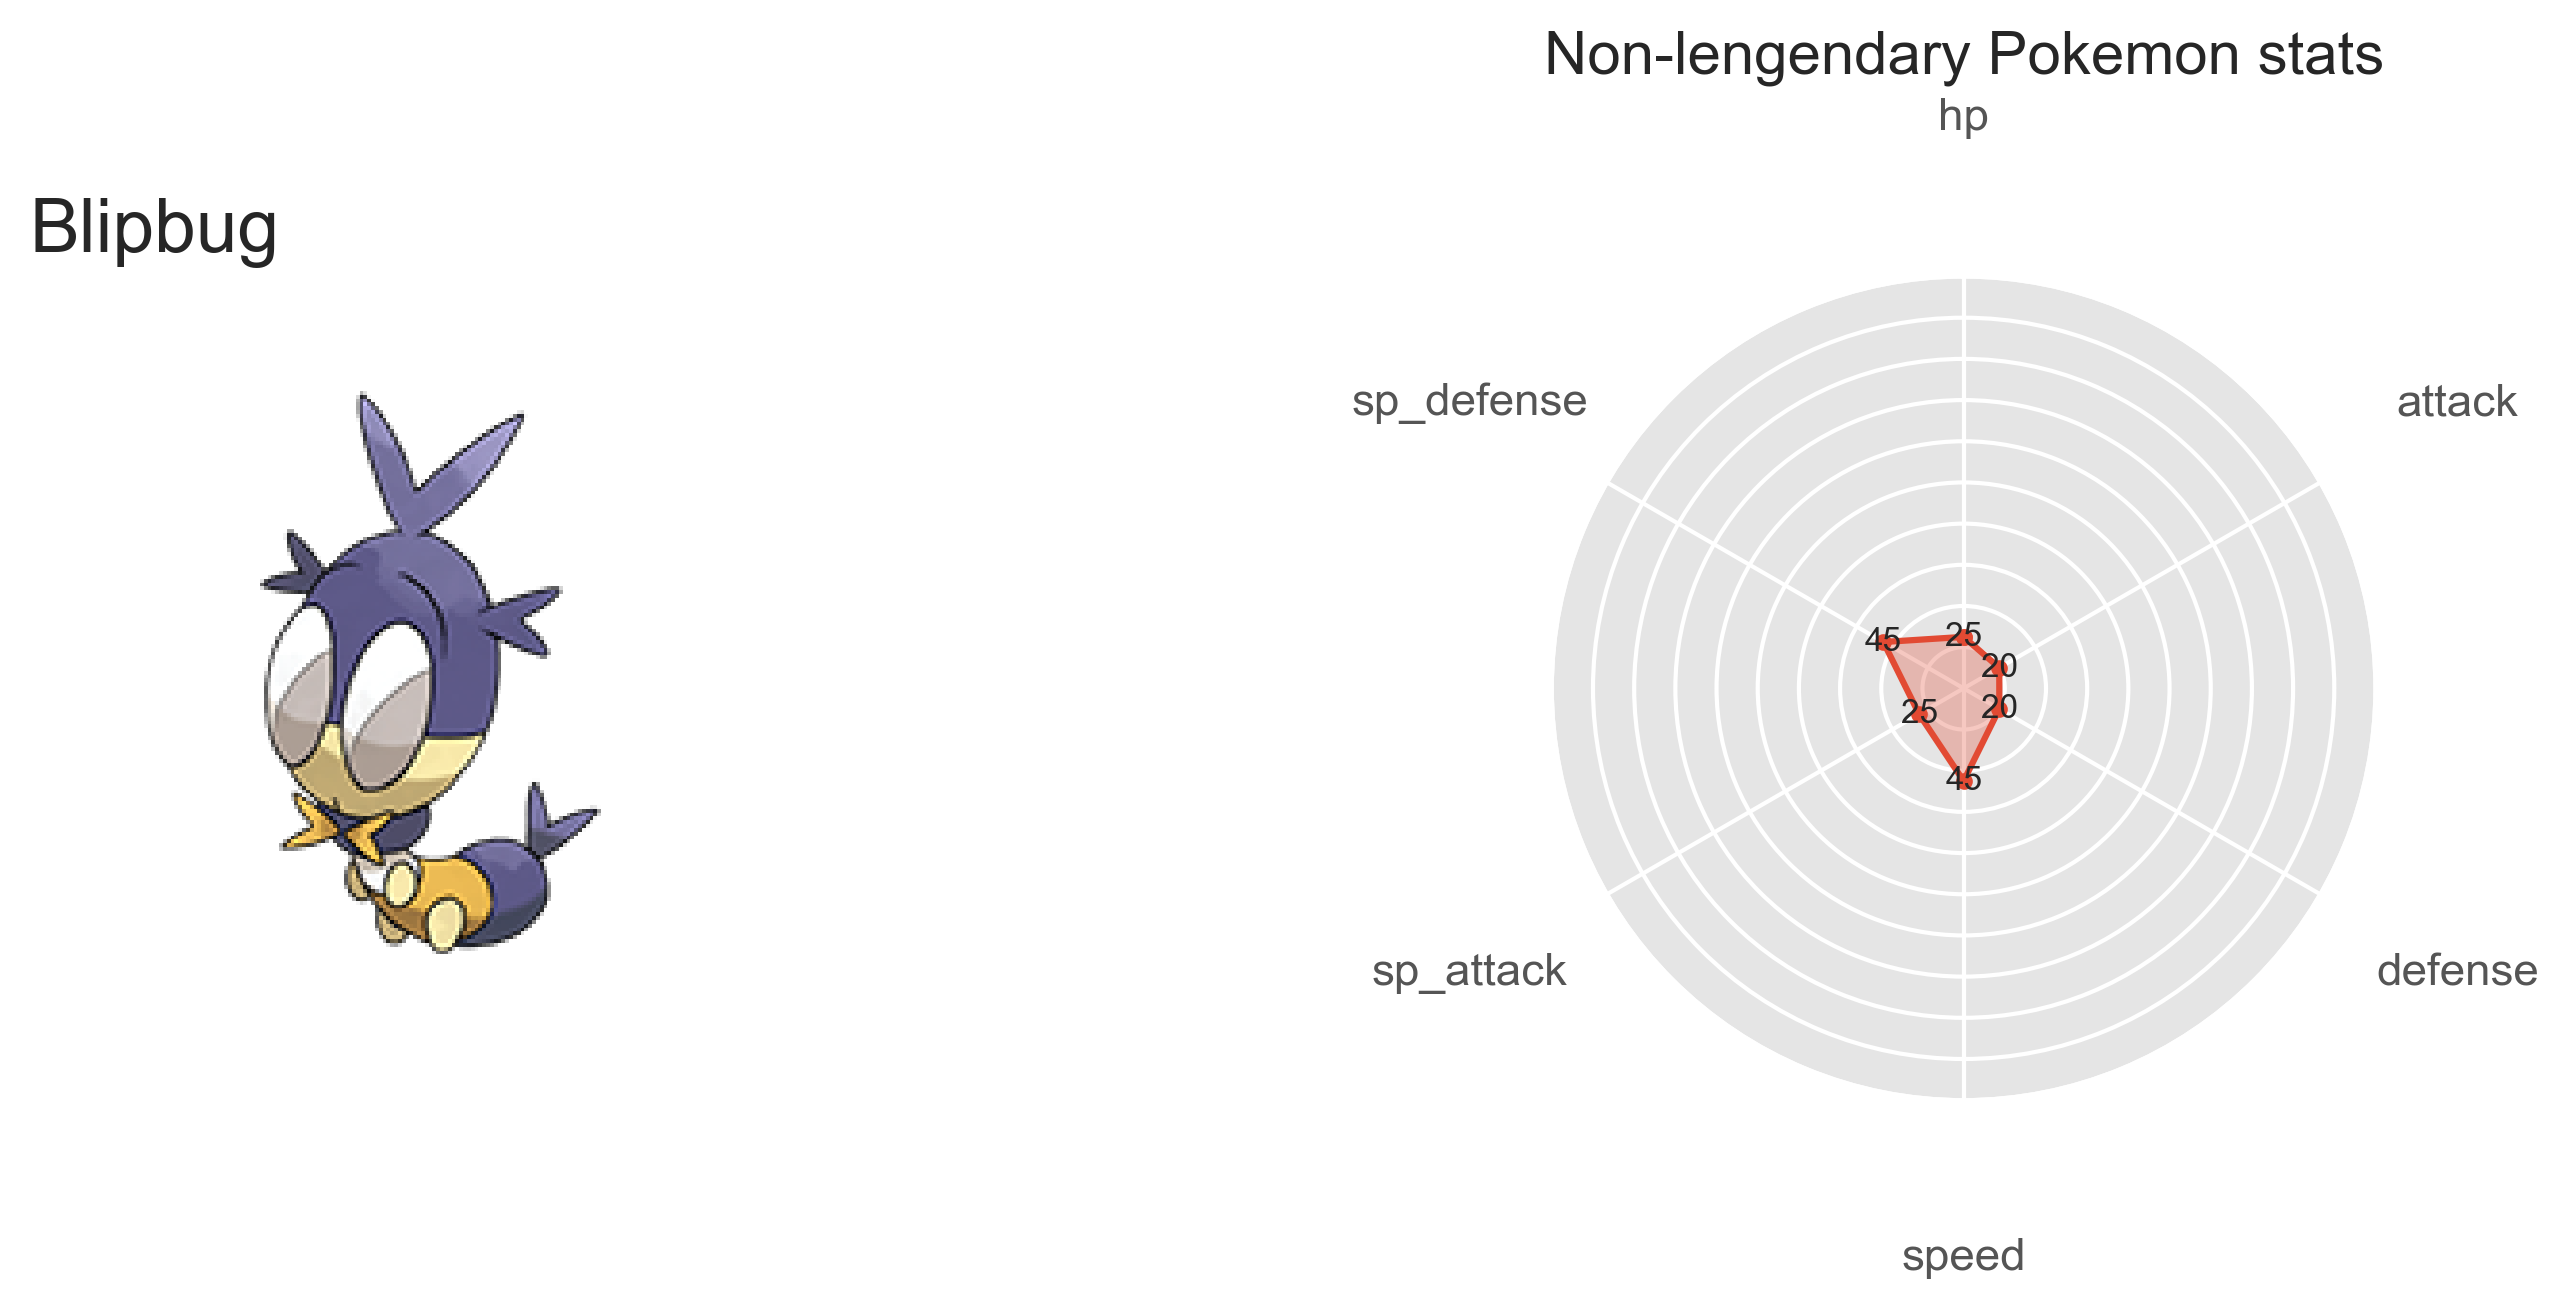

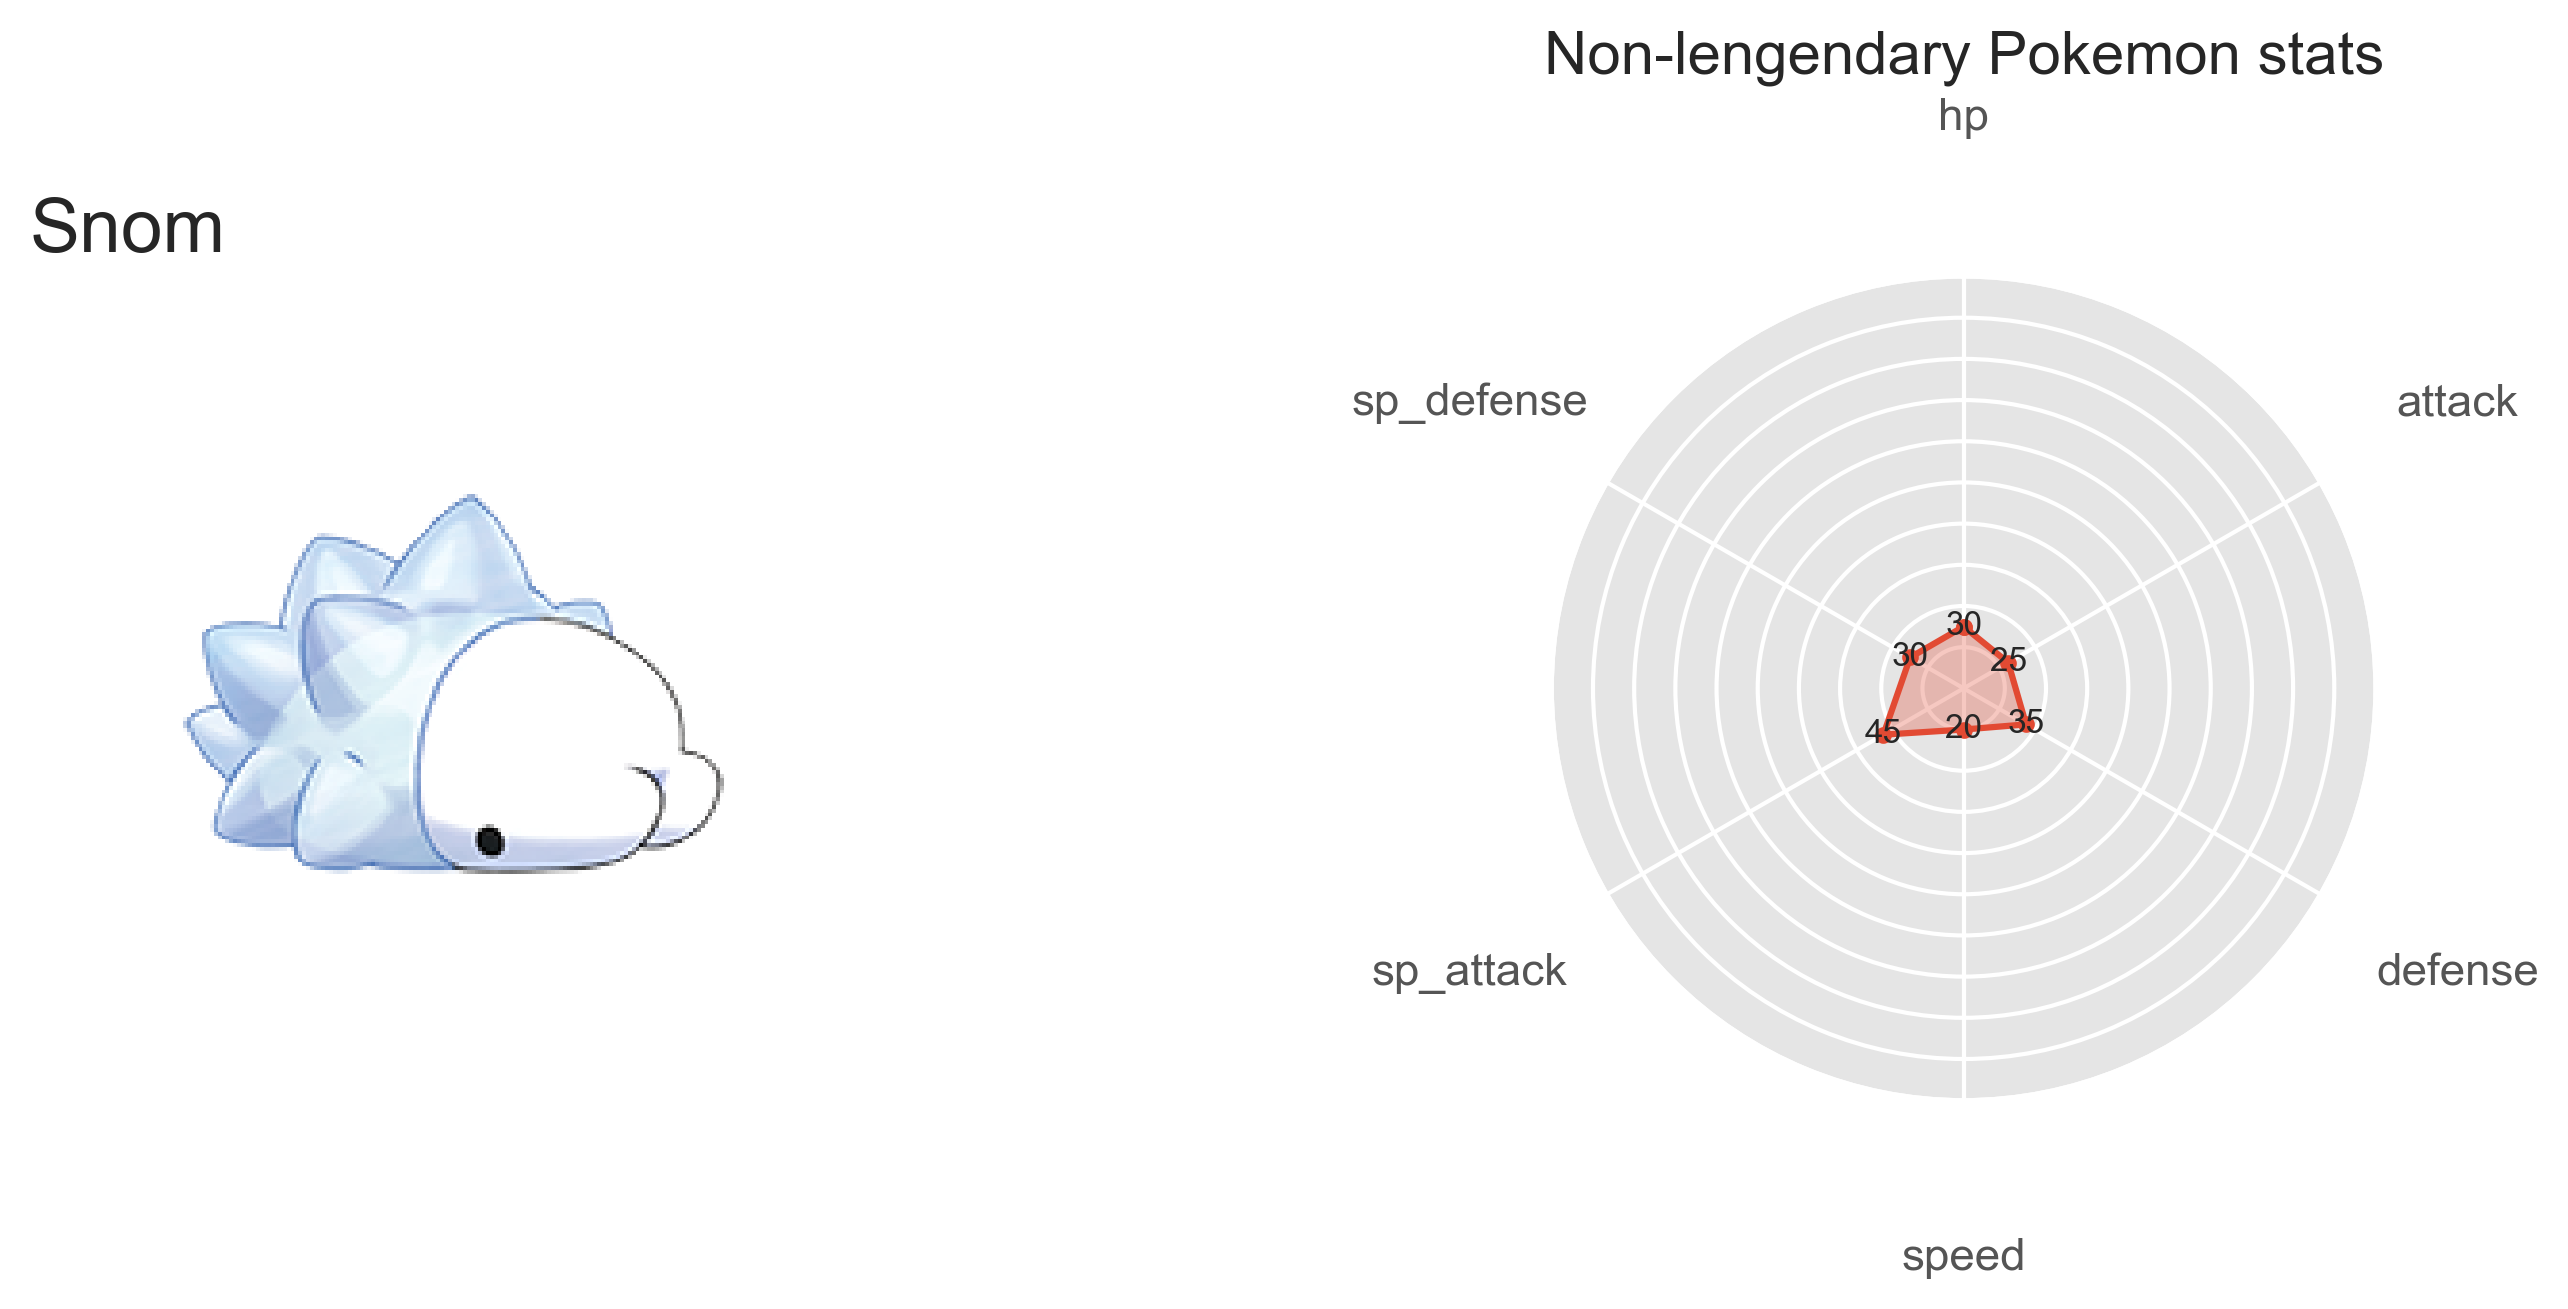

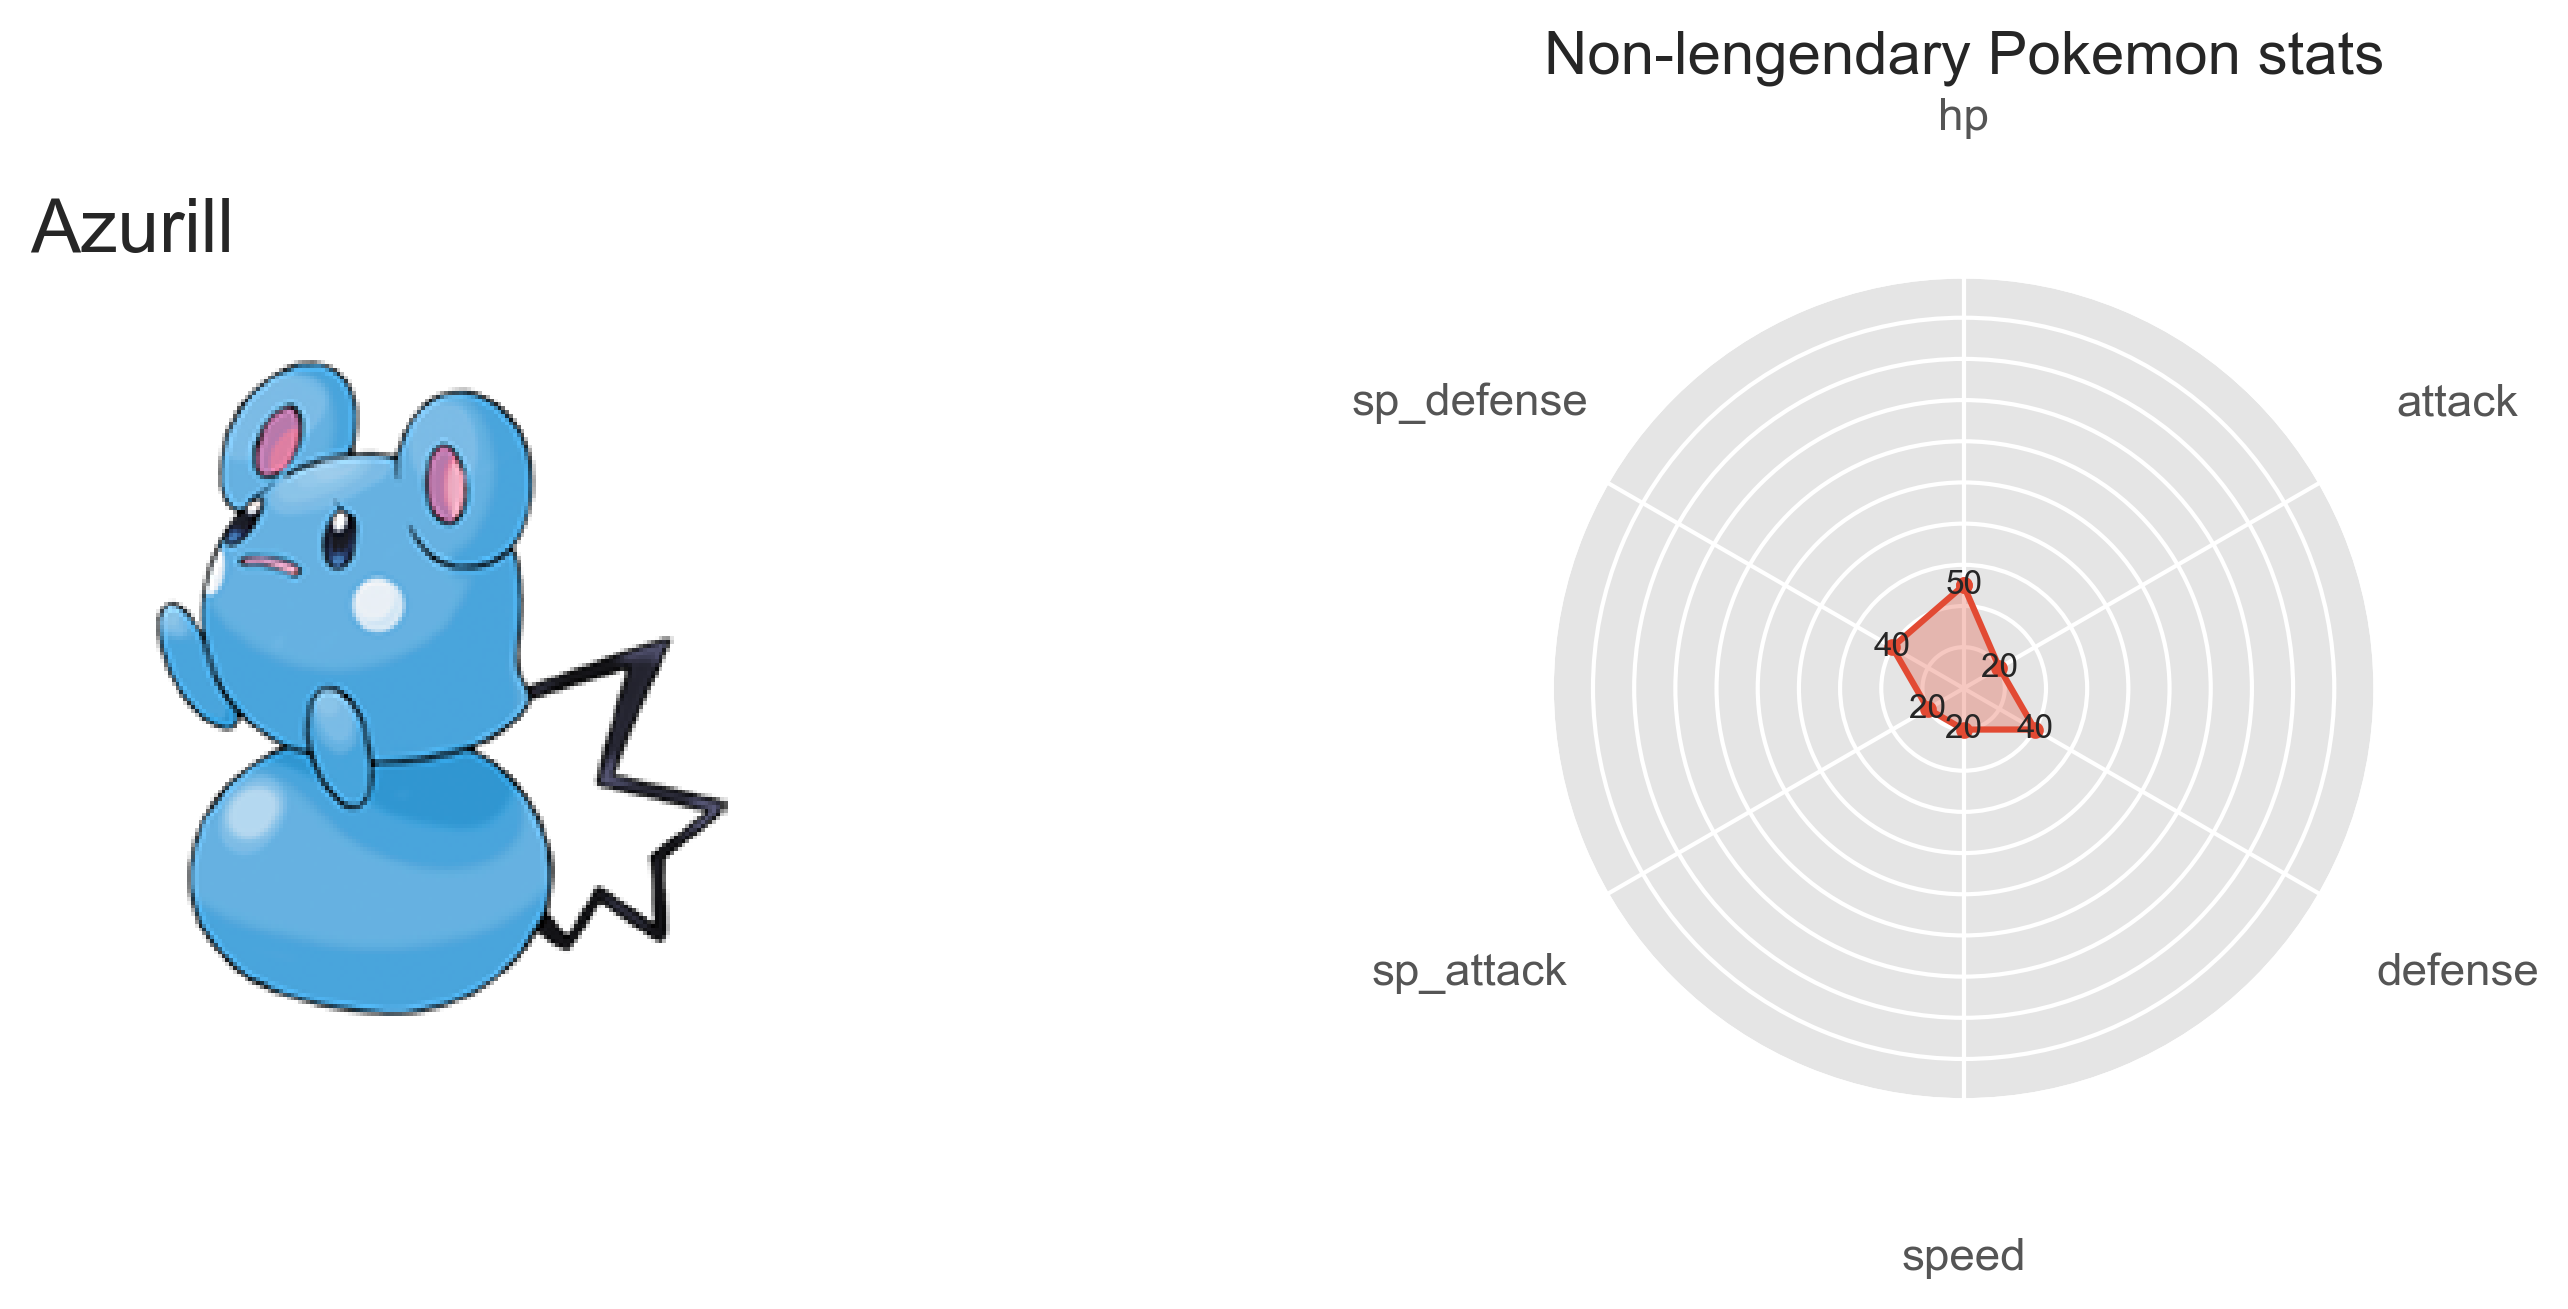

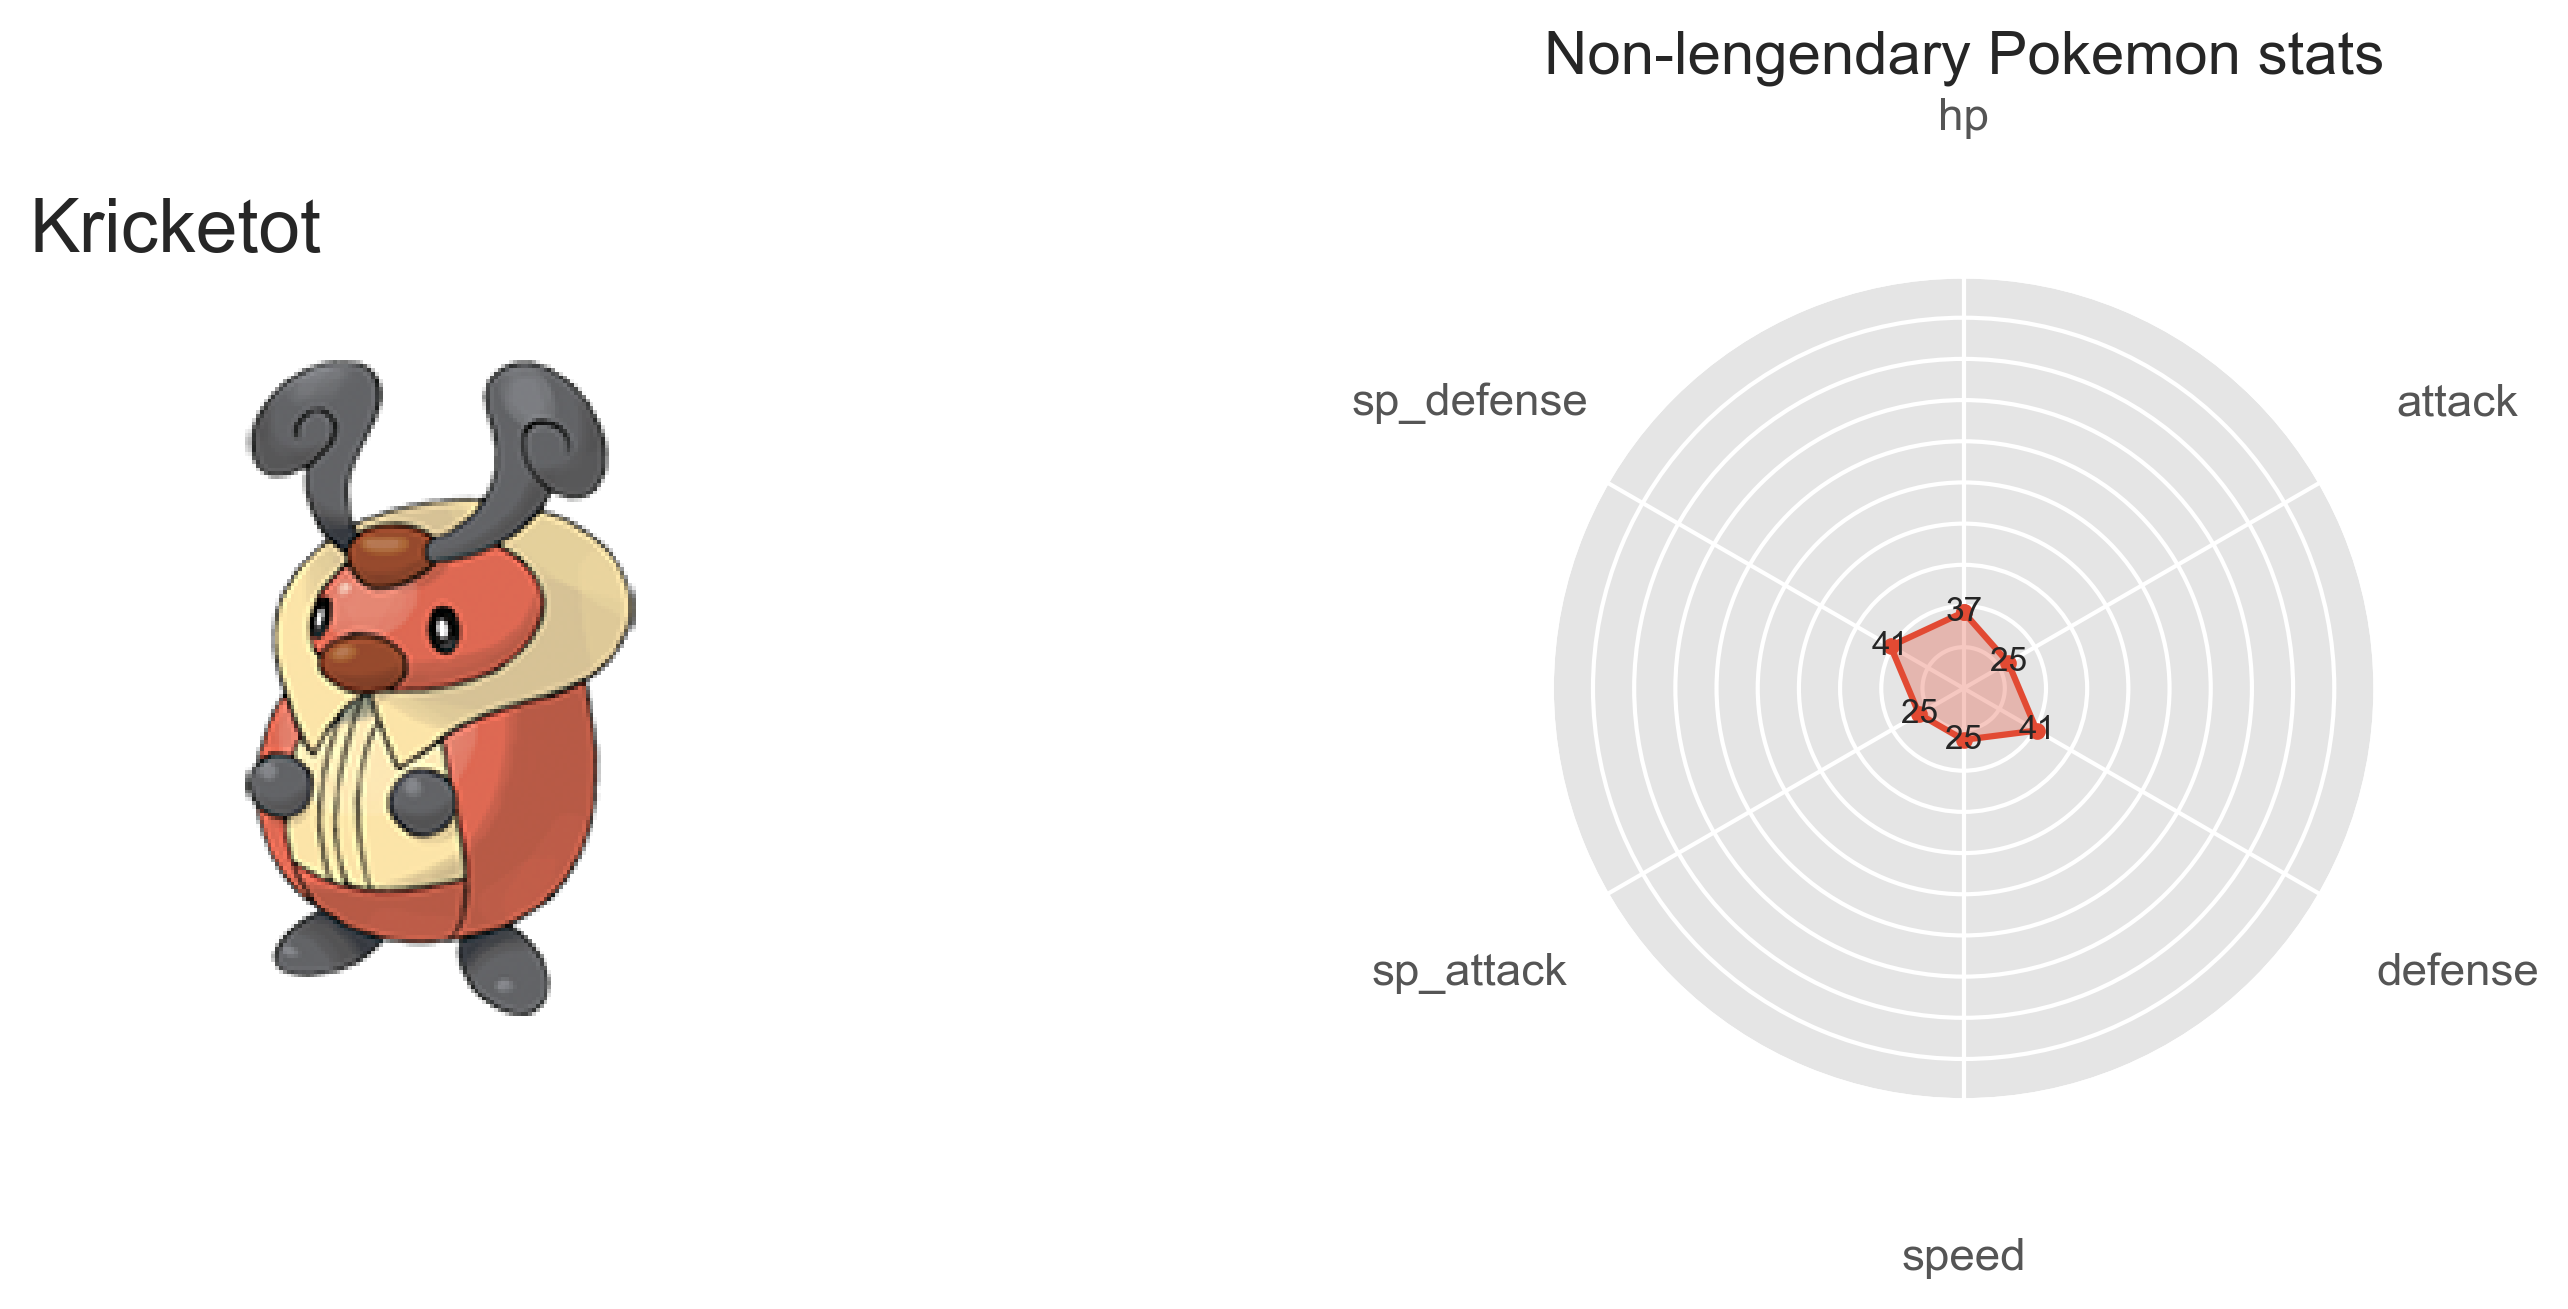

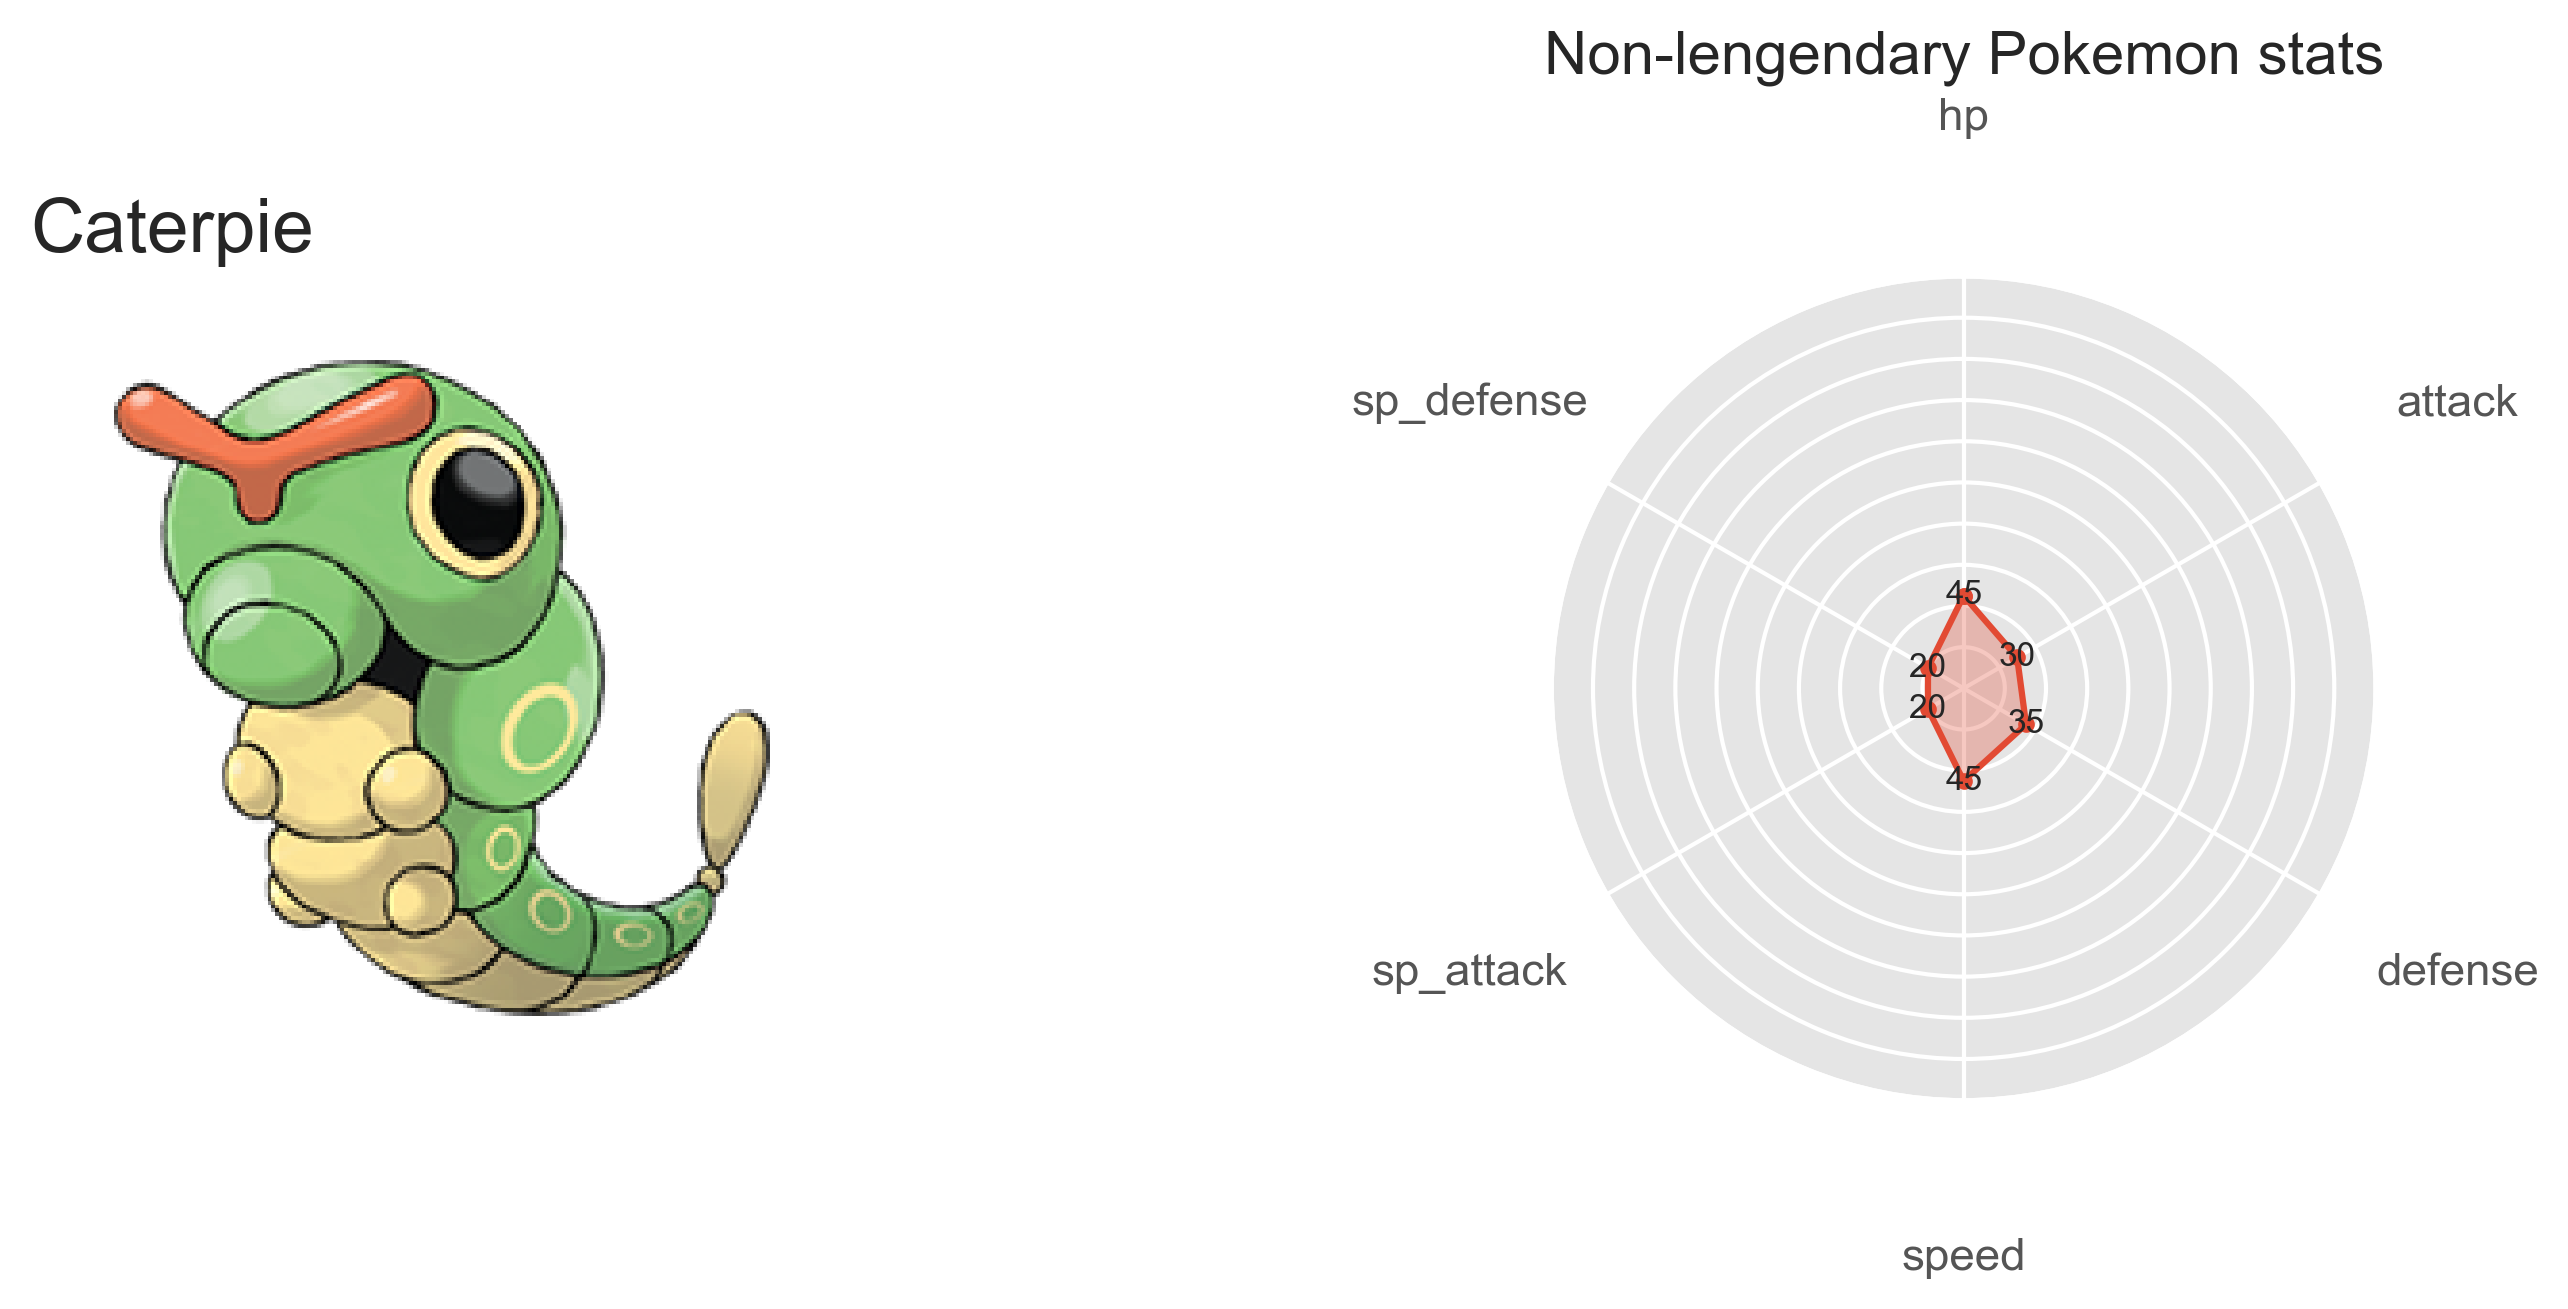

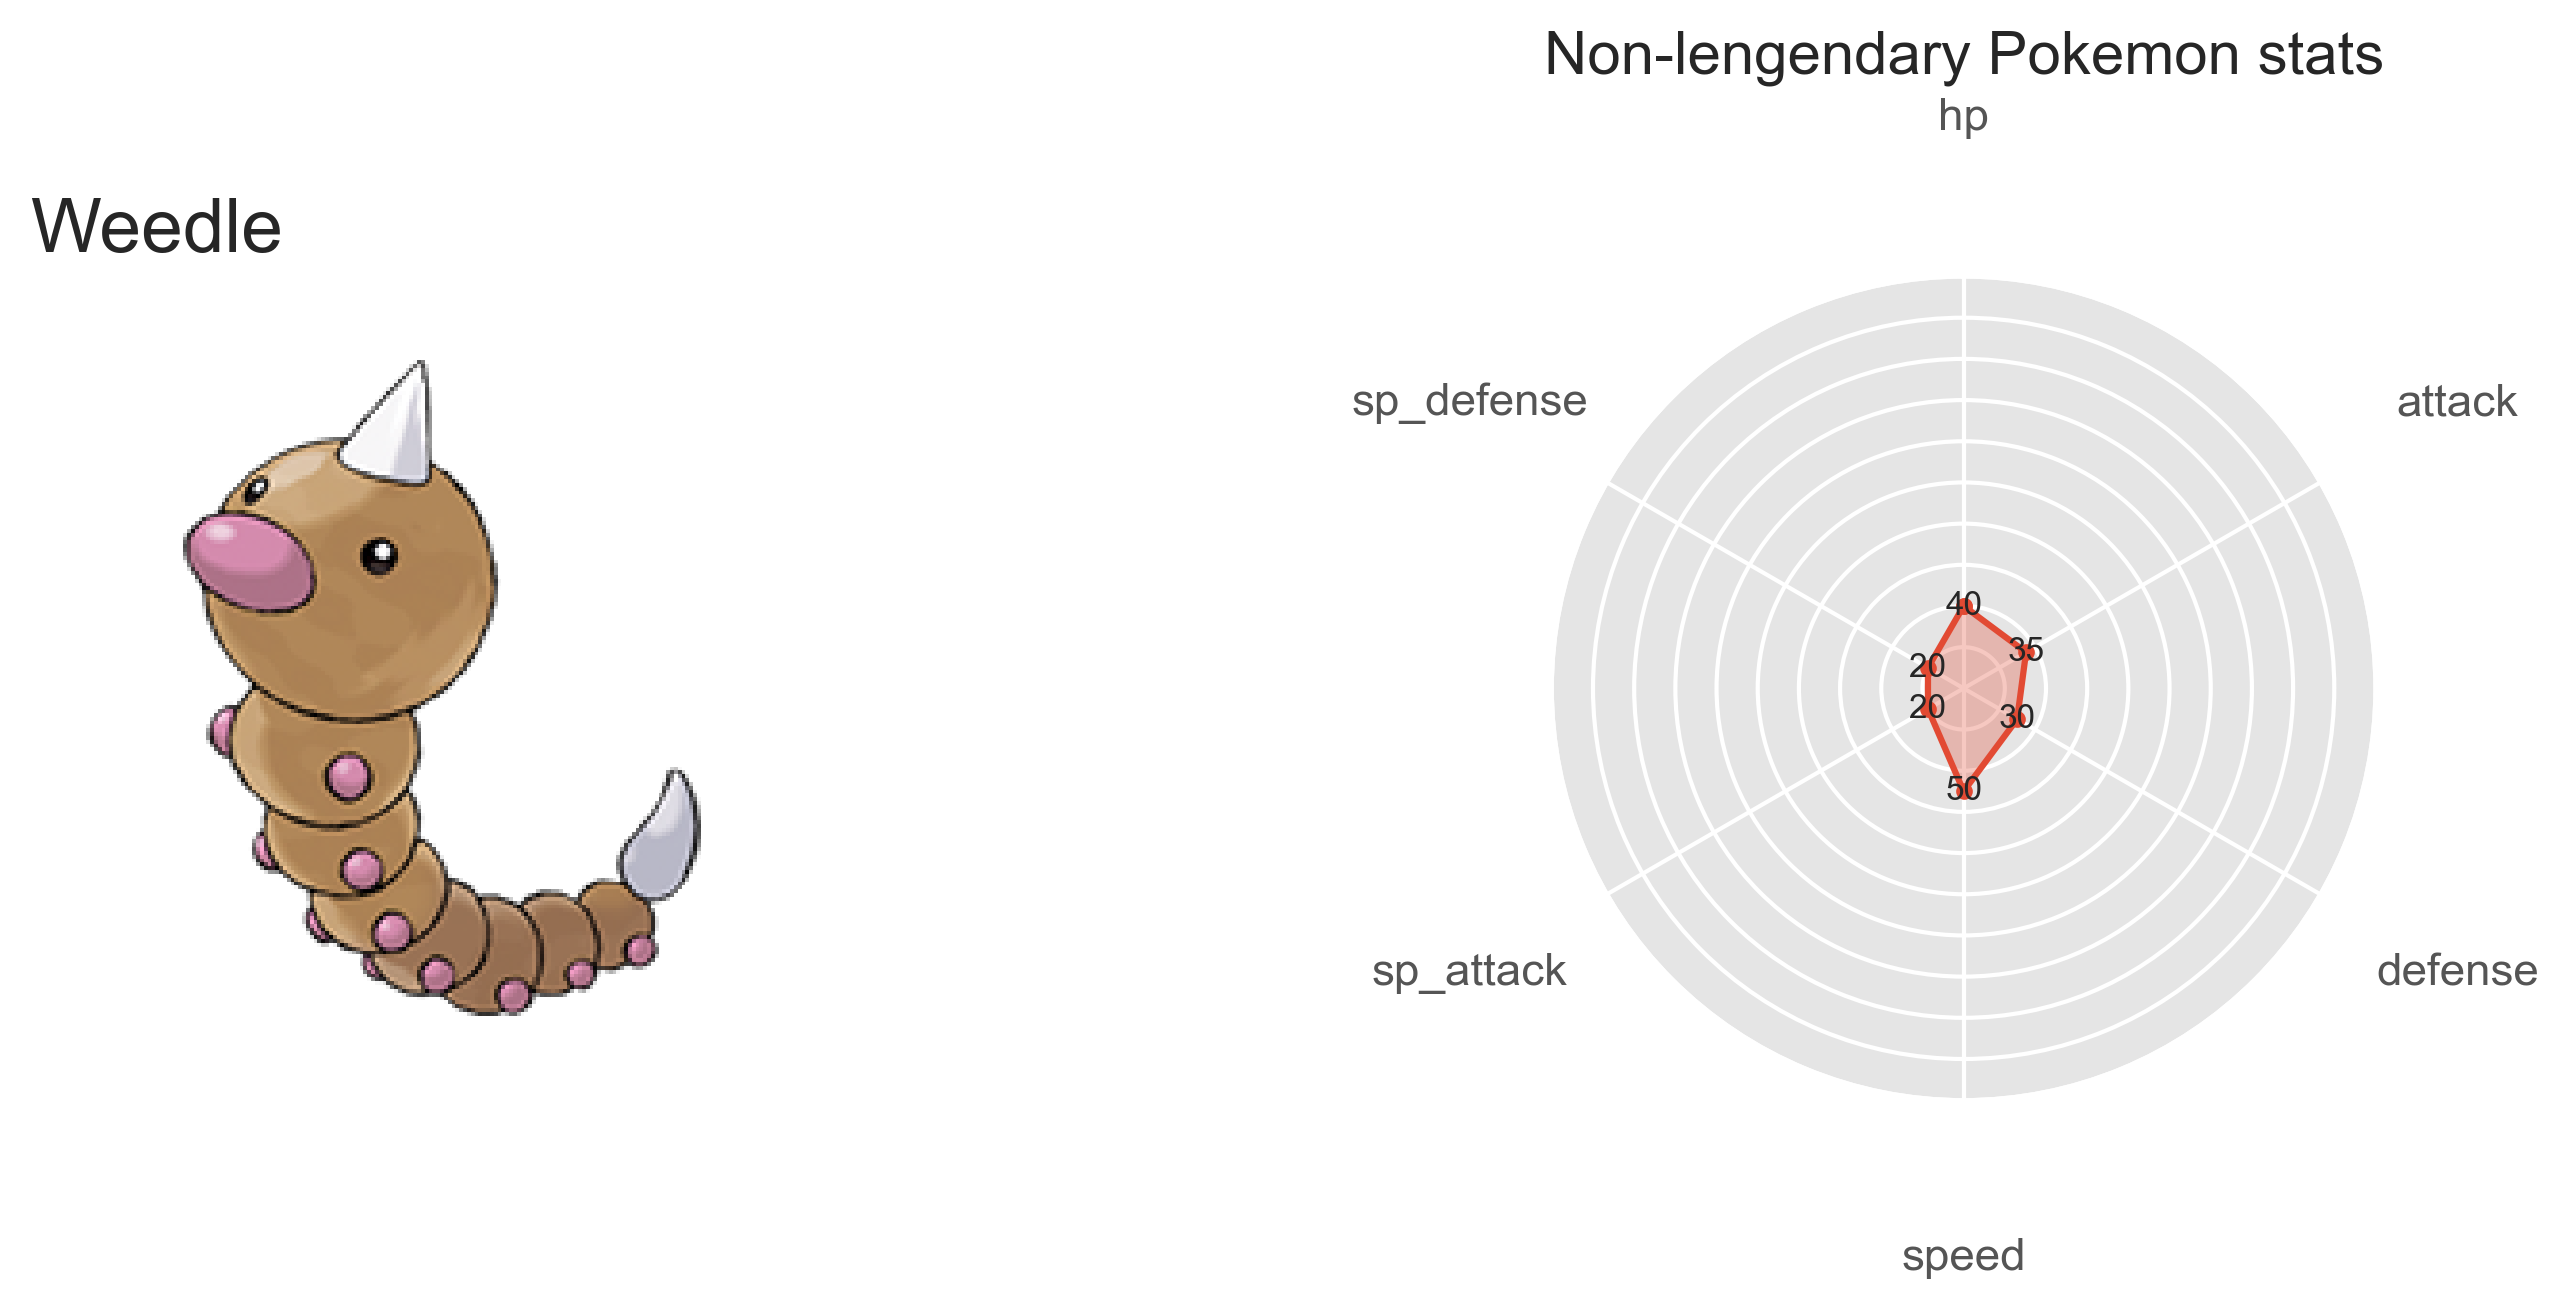

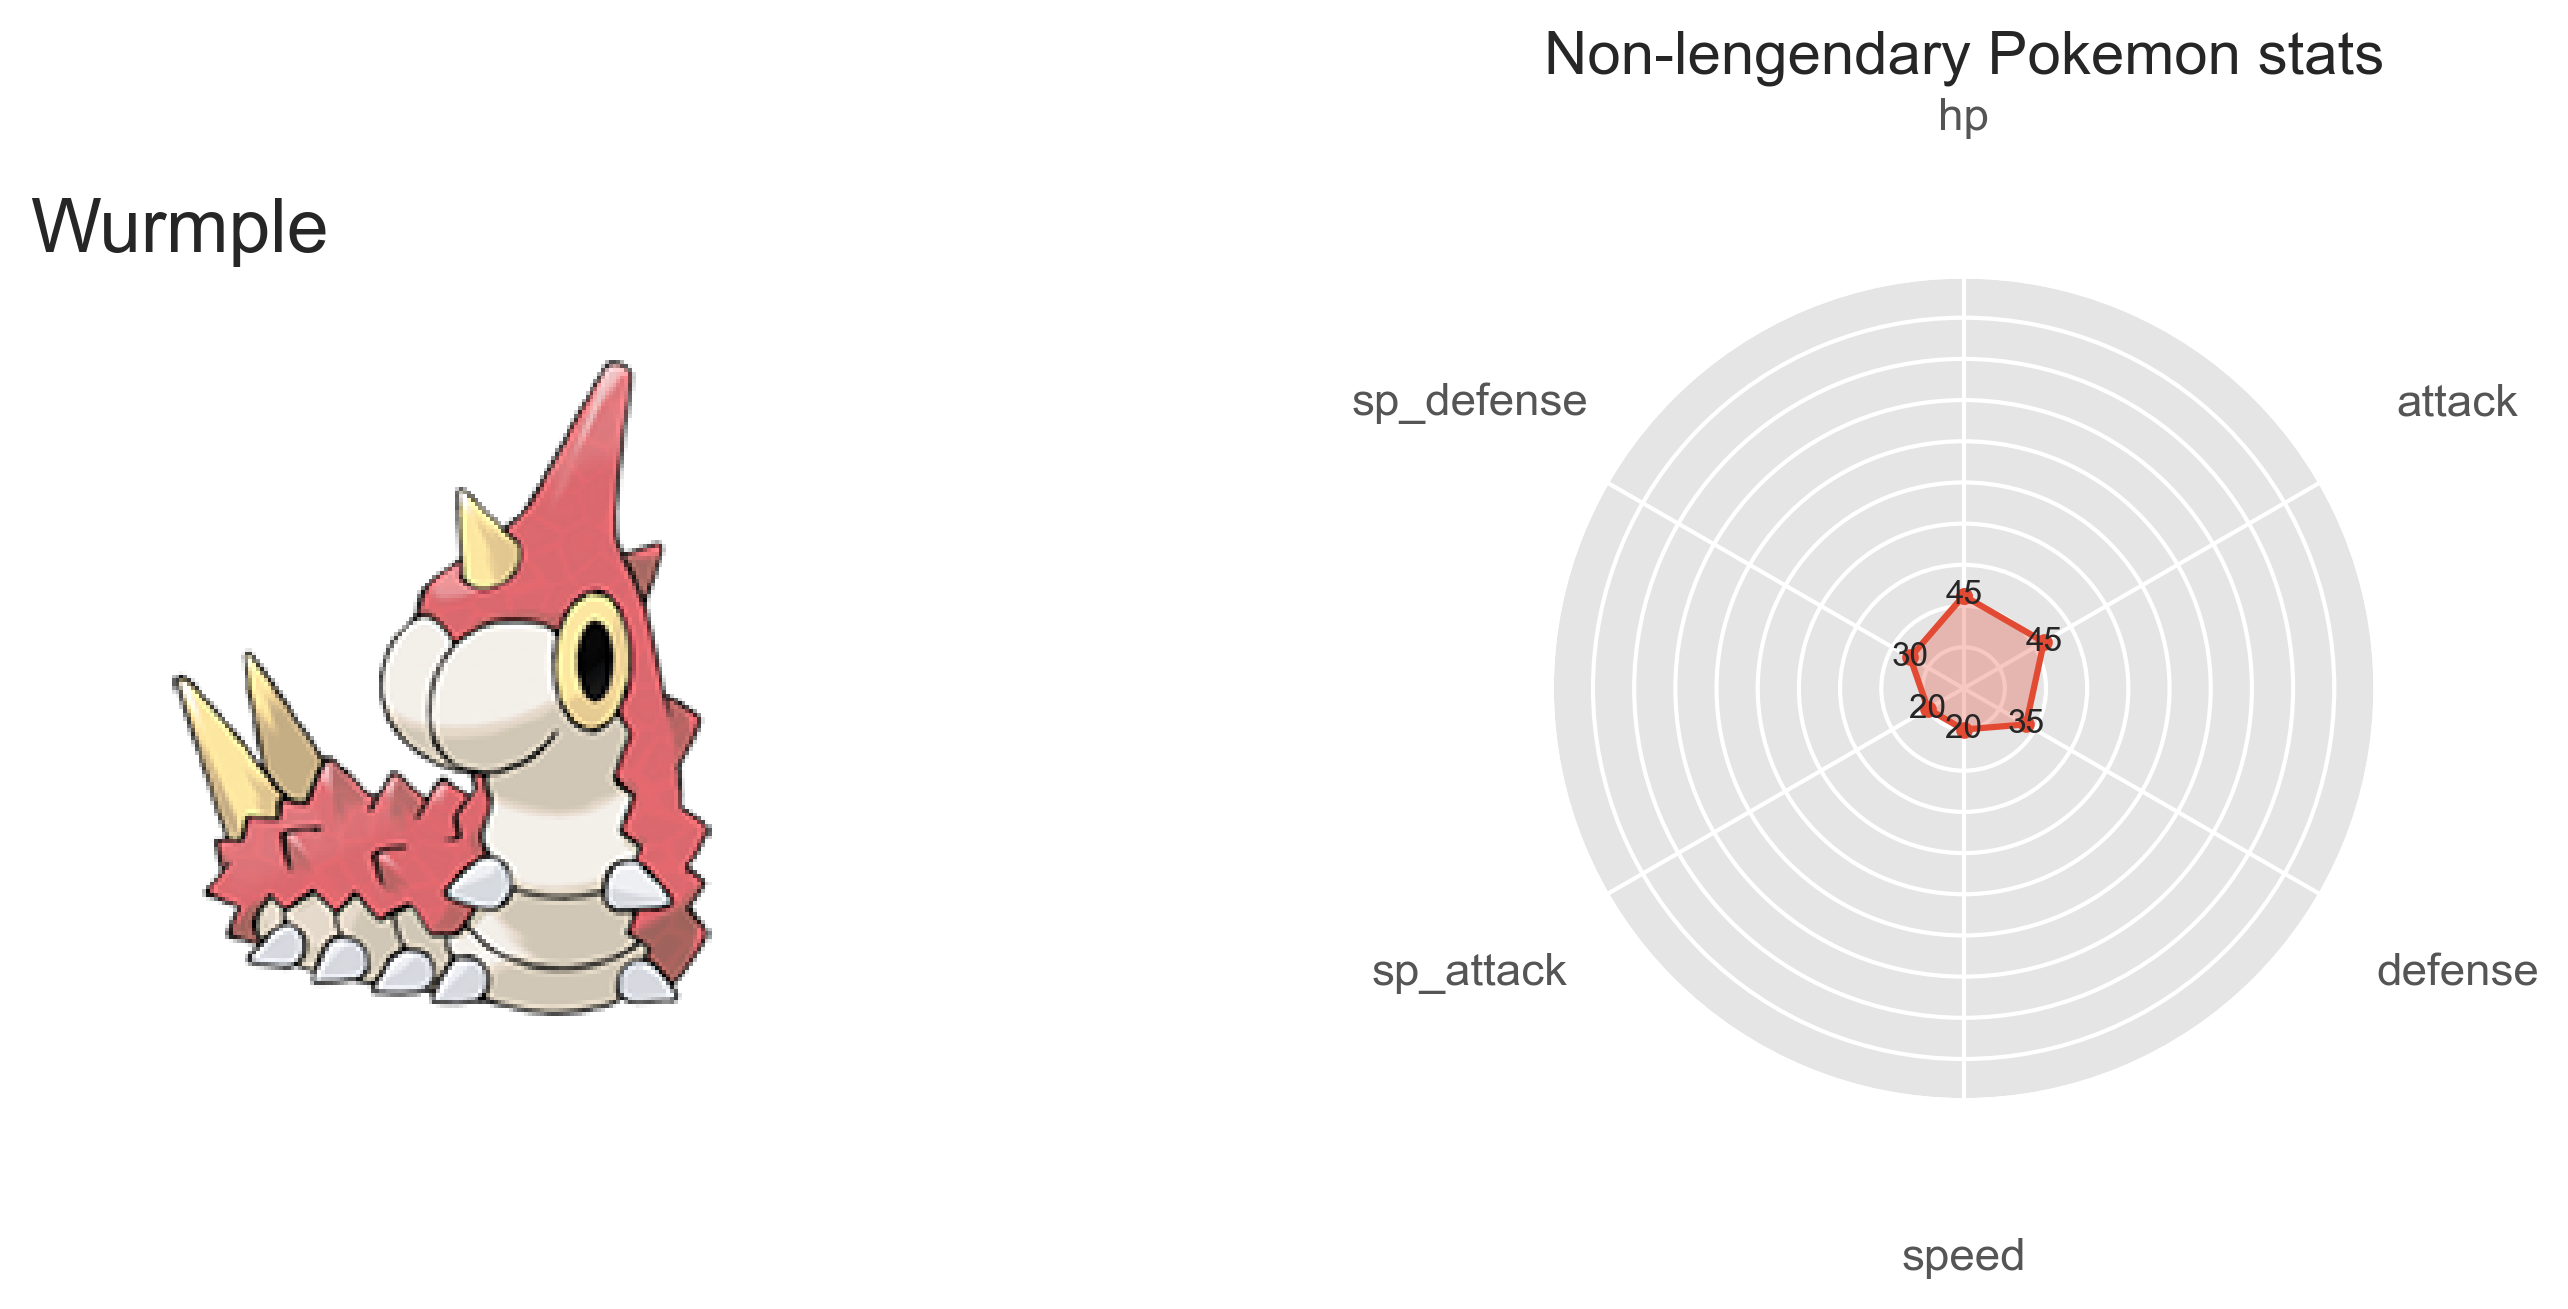

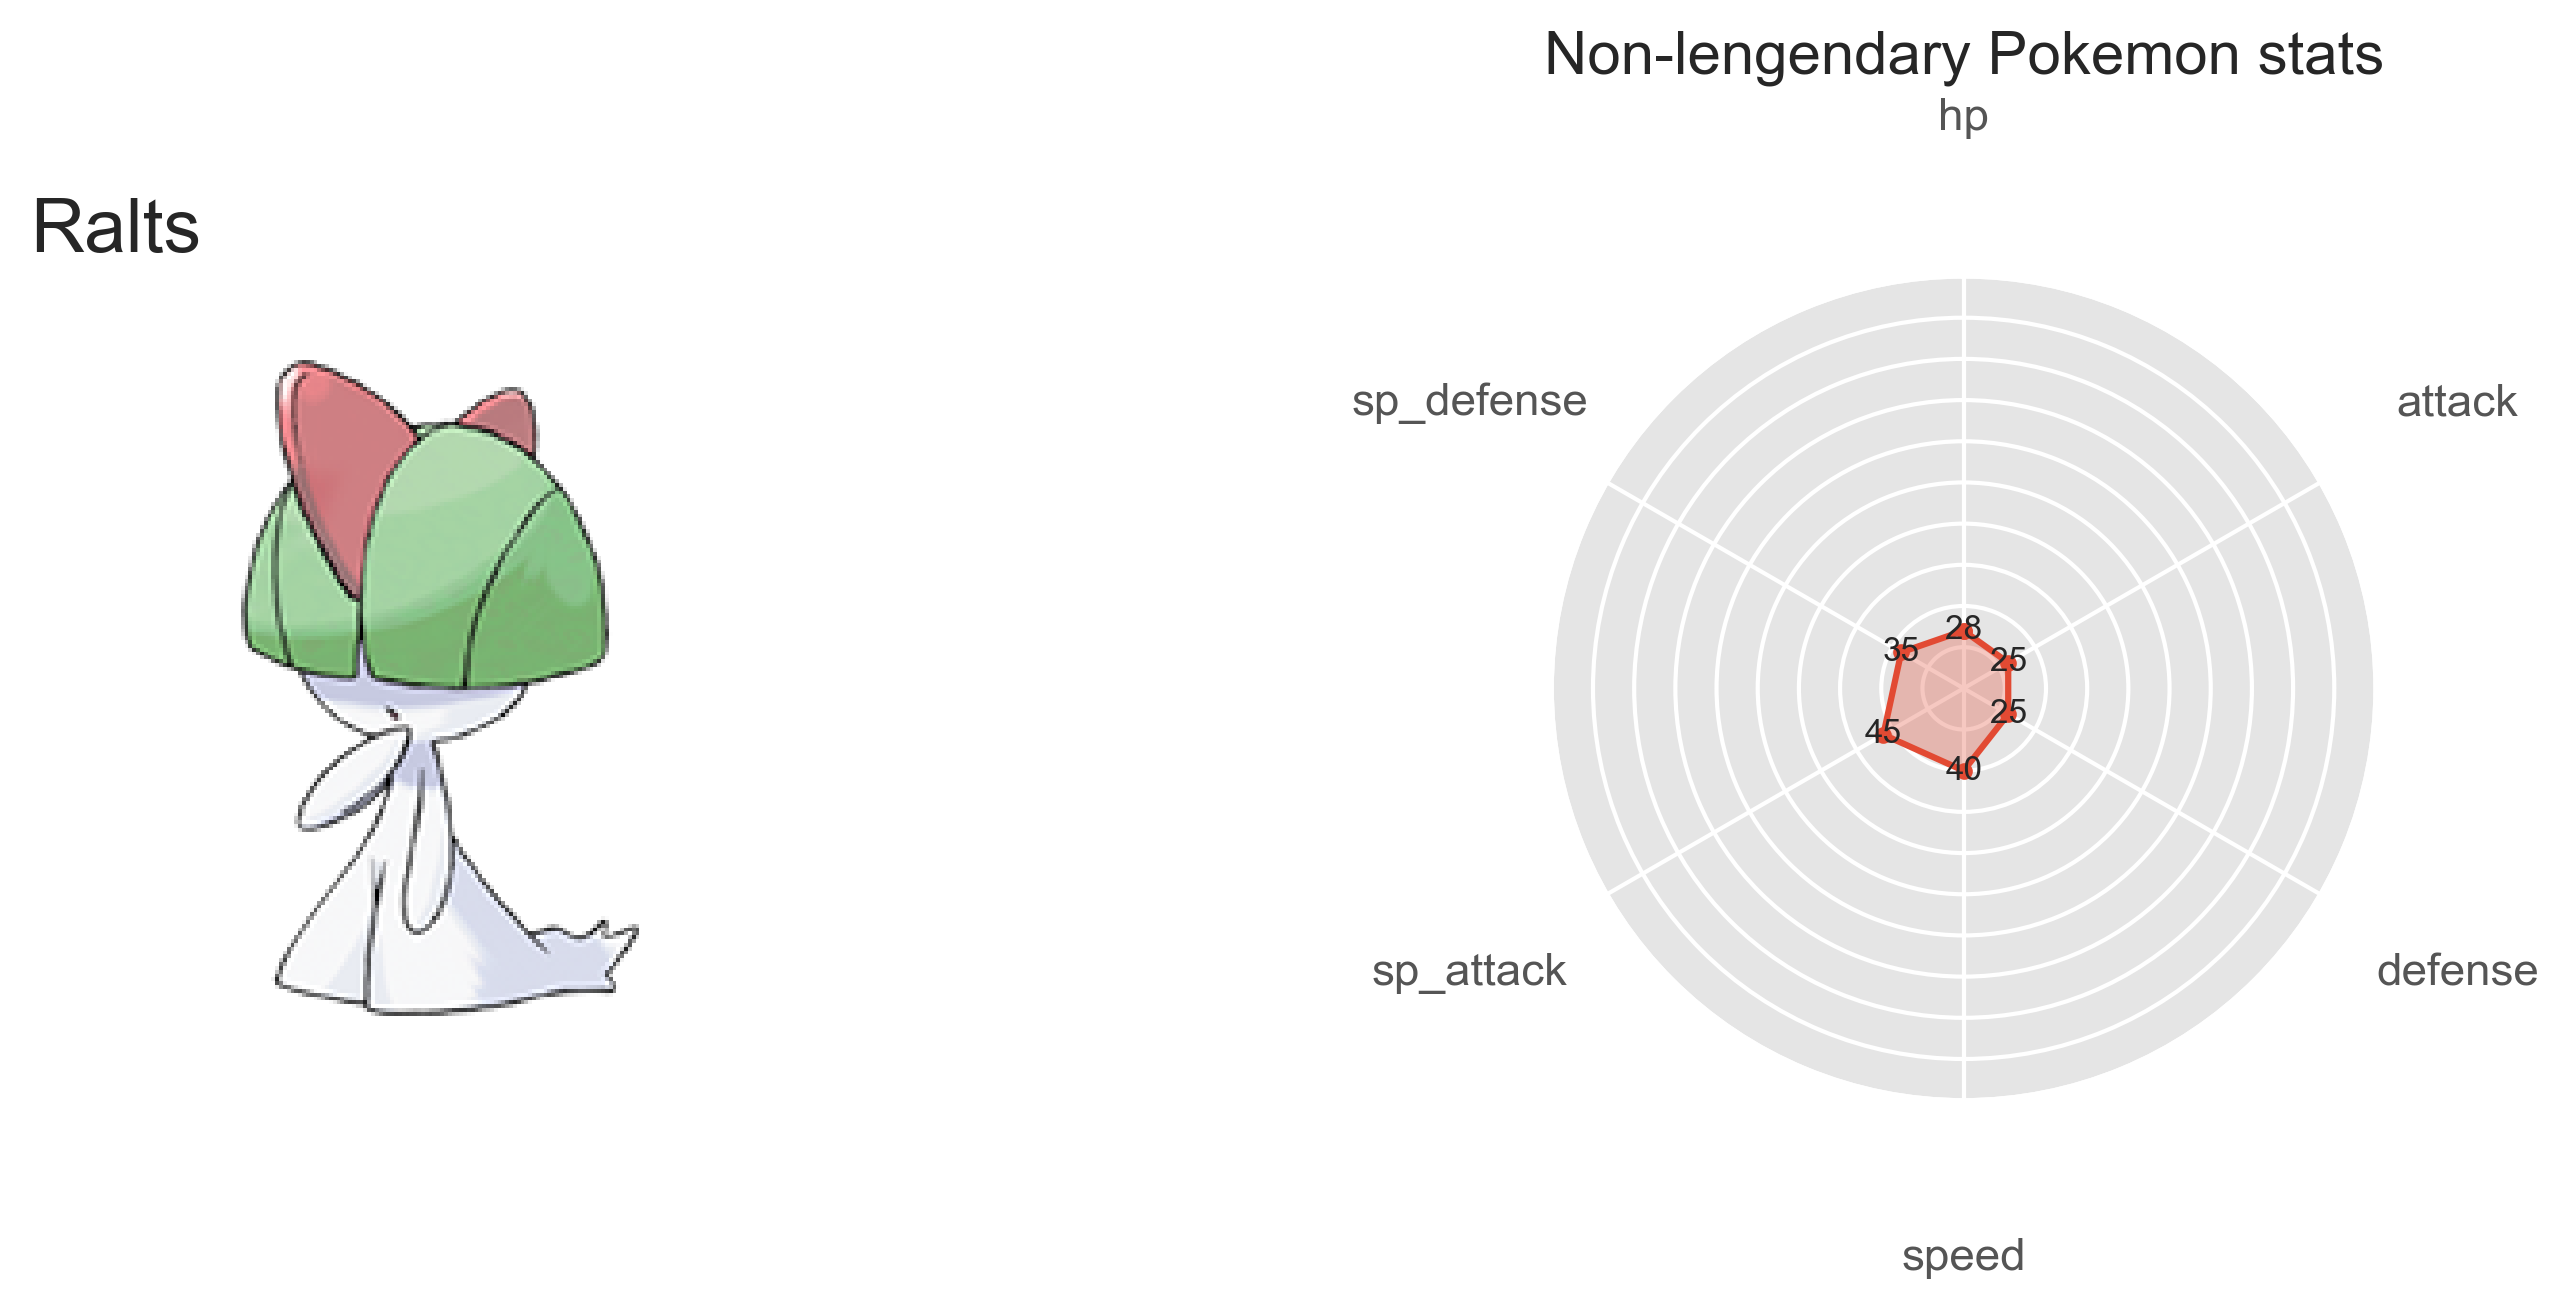

In [158]:
#set "dataframe" from function below to low_stats
dataframe = low_stats
low_stats_new = low_stats[['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]]

#set dataframe new to low_stats_new
dataframe_new = low_stats_new

#for each rows of low_stats, it will plot the corresponding image and radarplot
for idx in range(len(low_stats)):

    low_stats_new = low_stats[['hp', 'attack', 'defense', 'speed', 'sp_attack', "sp_defense"]]
    fig = plt.figure(figsize=(12,8))
    
#plot image 221 = left

    ax = plt.subplot(221)

    plot_img(idx)
    
#plot radar 222 = right


    ax = plt.subplot(222, polar="True")
    plt.title('Non-lengendary Pokemon stats')

    plot_radar(idx)

# Classification with KNN

In [106]:
pokemon_data

pokedex_number                      name  generation  \
pokedex_number                                                        
001             001            Bulbasaur                 1            
002             002            Ivysaur                   1            
003             003            Venusaur                  1            
003             003            Mega Venusaur             1            
004             004            Charmander                1            
...             ...                      ...            ..            
902             902            Basculegion female        8            
903             903            Sneasler                  8            
904             904            Overqwil                  8            
905             905            Enamorus Incarnate Forme  8            
905             905            Enamorus Therian Forme    8            

                      classfication  \
pokedex_number                        
001             Seed Pokemon          
002             Seed Pokemon          
003             Seed Pokemon          
003             Seed Pokemon          
004             Lizard Pokemon        
...                      ...          
902             Big Fish Pokemon      
903             Free Climb Pokemon    
904             Pin Cluster Pokemon   
905             Love-Hate Pokemon     
905             Love-Hate Pokemon     

                                                   abilities  height_m  \
pokedex_number                                                           
001             ['Overgrow', 'Chlorophyll']                  0.70        
002             ['Overgrow', 'Chlorophyll']                  1.00        
003             ['Overgrow', 'Chlorophyll']                  2.00        
003             ['Thick Fat']                                2.40        
004             ['Blaze', 'Solar Power']                     0.60        
...                       ...                                 ...        
902             ['Rattled', 'Adaptability', 'Mold Breaker']  3.00        
903             ['Pressure', 'Poison Touch']                 1.30        
904             ['Poison Point', 'Swift Swim', 'Intimidate'] 2.50        
905             ['Healer', 'Contrary']                       1.60        
905             ['Overcoat']                                 1.60        

                weight_kg   type1     type2  base_total   hp  attack  defense  \
pokedex_number                                                                  
001            6.90        Grass   Poison    318         45   49      49        
002            13.00       Grass   Poison    405         60   62      63        
003            100.00      Grass   Poison    525         80   82      83        
003            155.50      Grass   Poison    625         80   100     123       
004            8.50        Fire    None      309         39   52      43        
...               ...        ...      ...    ...         ..   ...     ...       
902            110.00      Water   Ghost     530         120  92      65        
903            43.00       Poison  Fighting  510         80   130     60        
904            60.50       Dark    Poison    510         85   115     95        
905            48.00       Fairy   Flying    580         74   115     70        
905            48.00       Fairy   Flying    580         74   115     110       

                sp_attack  sp_defense  speed  against_bug  against_dark  \
pokedex_number                                                            
001             65         65          45    1.00         1.00            
002             80         80          60    1.00         1.00            
003             100        100         80    1.00         1.00            
003             122        120         80    1.00         1.00            
004             60         50          65    0.50         1.00            
...             ...        ...         ..

In [105]:
#change category column type to int
pokemon_data["classfication_num"] = pd.factorize(pokemon_data.classfication)[0]
pokemon_data["abilities_num"] = pd.factorize(pokemon_data.abilities)[0]

In [ ]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#choosing column to use in the model

X = pokemon_data[['hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', "classfication_num", "abilities_num"]].values  #.astype(float)
y = pokemon_data['is_legendary'].values

#Nnrmalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


#split dataset in training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#Pick a value for k
k = 2

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

predict = neigh.predict(X_test)

In [ ]:
#calculating the accuracy of the model by KNN numbers


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


#visualize it
import matplotlib.pyplot as plt
Ks = 10

plt.plot(range(1,Ks),mean_acc,'g')


plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print(neigh.score(X_test, y_test))

In [ ]:
accuracy = pd.DataFrame(y_test, columns = ["actual_values"])
accuracy["predicted_values"] = predict

In [ ]:
#calculating the accuracy of the model by KNN numbers


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


#visualize it
import matplotlib.pyplot as plt
Ks = 10

plt.plot(range(1,Ks),mean_acc,'g')


plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
incorrect_prediction = accuracy.loc[~(accuracy['predicted_values'] == accuracy['actual_values'])]
correct_prediction = accuracy.loc[(accuracy['predicted_values'] == accuracy['actual_values'])]

print("How many times did the model failed to predict if the pokemon was legendary or not ? :", len(incorrect_prediction.index))
print("How many times did the model succeeded to predict if the pokemon was legendary or not ? :", len(correct_prediction.index))